#1: Predictive Modeling – Who Will Go on Hold?
Goal: The objective of this problem is to build a predictive model that identifies members who are most likely to place their
membership on hold soon. Anticipating hold behavior allows the YMCA to address potential risks to member engagement and
revenue before they materialize. By detecting early signals of hold intent, the organization can shift from reactive management to
proactive intervention.
Use Cases:
• Proactive Retention Efforts: If the model predicts that a member is at high risk of going on hold, the YMCA can initiate
personalized outreach such as wellness check-ins, flexible program options, or targeted promotions (e.g., discounted addon classes, family passes). This approach fosters loyalty and reduces the likelihood of a hold becoming the first step
toward eventual membership cancellation.
• Tailored Communications: Members with a moderate risk score might benefit from adjusted communication strategies. For
example, highlighting the benefits of maintaining active membership during slower usage periods, offering seasonal
program alternatives, or providing reminders of financial assistance options can reduce unnecessary holds. By segmenting
communication efforts according to predicted risk, the YMCA can maximize engagement while optimizing staff resources.
Features to be Explored:
To make reliable predictions, the model will consider a combination of demographic, historical, and behavioral variables, such as:
• Age & Tenure: Older or long-standing members may behave differently than younger or newer members.
• Hold History: Number of previous holds, frequency of placing holds, and average hold duration often signal future behavior.
• Seasonality Factors: Day of the week, month, or time of year when holds are most common (e.g., summer travel, winter
sports).
• Engagement History: Attendance frequency, participation in group classes, program enrollments, or facility check-ins can
indicate overall commitment to the YMCA community. Members with declining engagement trends may be more likely to
pause.
Modeling Approach:
A variety of supervised machine learning algorithms can be applied to classify whether a member will go on hold within a defined
prediction window (e.g., next 30 or 60 days):
• Logistic Regression: Provides a baseline, interpretable model to highlight the strongest predictive features.
• Random Forest: Handles non-linear interactions and complex feature sets well, offering feature importance rankings.
• XGBoost: Known for high predictive accuracy, especially with structured membership datasets.
3
Outcome:
The final model will generate a risk score for each member, classifying them into categories such as low, medium, or high risk of
going on hold. These insights will empower the YMCA to:
• Focus retention strategies on the right members at the right time.
• Reduce membership churn indirectly by preventing unnecessary holds.
• Strengthen relationships with members by showing proactive care and flexibility

#Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px


# Load dataset

In [ ]:
ymca_data = pd.read_csv('/content/YMCA of Northern Alberta Hold Data(in).csv', encoding='latin-1')

/tmp/ipython-input-78456763.py:1: DtypeWarning: Columns (11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  ymca_data = pd.read_csv('/content/YMCA of Northern Alberta Hold Data(in).csv', encoding='latin-1')


## Show first 10 rows and shape of the dataset

In [ ]:
ymca_data.head(10)

Membership Hold ID Application: CaseSafeID         Membership Location  \
0    a1GOO000003e6BR      a0wI9000000EAwgIAG    Castle Downs Family YMCA   
1    a1GOO000005gNew      a0wOO000000zQs1YAE     Jamie Platz Family YMCA   
2    a1GOO000001M9iP      a0wOO000000RWbhYAG    Castle Downs Family YMCA   
3    a1G5w00000Jfiqm      a0w5w000009STGOAA4    Castle Downs Family YMCA   
4    a1GOO000001oX8H      a0w5w00000ApcrhAAB  William Lutsky Family YMCA   
5    a1GOO000002fZjp      a0wOO000000vf85YAA    Castle Downs Family YMCA   
6    a1G5w00000JfUvI      a0w5w000008Rnj1AAC     Don Wheaton Family YMCA   
7    a1GOO000004X6dp      a0wOO000000zQs1YAE     Jamie Platz Family YMCA   
8    a1GOO000001dftx      a0wOO000000RWbhYAG    Castle Downs Family YMCA   
9    a1GI90000004LY5      a0w5w000009STGOAA4    Castle Downs Family YMCA   

  Application: Package: Category Application: Subscription: Membership Type  \
0        Membership - Continuous                                   Enhanced   
1       Membership Plus - Annual                              Enhanced Plus   
2        Membership - Continuous                                  Essential   
3        Membership - Continuous                                   Enhanced   
4        Membership - Continuous                                   Enhanced   
5        Membership - Continuous                                   Enhanced   
6            Membership - Annual                                   Enhanced   
7       Membership Plus - Annual                              Enhanced Plus   
8        Membership - Continuous                                  Essential   
9        Membership - Continuous                                   Enhanced   

  Application: Subscription: Membership Category  \
0                                        General   
1                                           Plus   
2                                        General   
3                                        General   
4                                        General   
5                                        General   
6                                        General   
7                                           Plus   
8                                        General   
9                                        General   

                 Reason for Hold Other Hold Reason  Start Date    End Date  \
0                 Medical/Health               NaN  12/17/2024   6/16/2025   
1         Program or Service Gap               NaN   6/13/2025    7/5/2025   
2                 Medical/Health               NaN    5/6/2024    5/7/2024   
3                       Vacation               NaN   8/31/2021  10/31/2021   
4  Other Recreation Alternatives               NaN    7/2/2024    1/1/2025   
5       Schedule Conflict (Busy)               NaN    9/3/2024    3/2/2025   
6                       COVID-19               NaN   6/11/2021    9/6/2021   
7                       Vacation               NaN   3/24/2025    4/8/2025   
8                       Vacation               NaN   6/27/2024   7/26/2024   
9                       Vacation               NaN   5/29/2022    9/5/2022   

  Application: Account: CaseSafeID Application: Contact: CaseSafeID  \
0               0015w00002G9VjMAAV               0035w000039TzTWAA0   
1               0015w00002G9ZKaAAN               0035w000039U8XqAAK   
2               0015w00002G9bvoAAB               0035w000039UJ01AAG   
3               0015w00002G9UnjAAF               0035w000039UR1rAAG   
4               0015w00002WAFLtAAP               0035w00003TVcDoAAL   
5               0015w00002U597SAAR               003I9000001qcN1IAI   
6               0015w00002G9Q8GAAV               0035w000039TzTyAAK   
7               0015w00002G9ZKaAAN               0035w000039U8XqAAK   
8               0015w00002G9bvoAAB               0035w000039UJ01AAG   
9               0015w00002G9UnjAAF               0035w000039UR1rAAG   

  Application: Contact: Age Category Application: Contact: Birthdate  \
0        

In [ ]:
ymca_data[['Membership Hold ID','Reason for Hold','Application: Account: CaseSafeID','Application: Contact: CaseSafeID','Application: Contact: Birthdate']].head(3)

Membership Hold ID         Reason for Hold Application: Account: CaseSafeID  \
0    a1GOO000003e6BR          Medical/Health               0015w00002G9VjMAAV   
1    a1GOO000005gNew  Program or Service Gap               0015w00002G9ZKaAAN   
2    a1GOO000001M9iP          Medical/Health               0015w00002G9bvoAAB   

  Application: Contact: CaseSafeID Application: Contact: Birthdate  
0               0035w000039TzTWAA0                      10/25/2013  
1               0035w000039U8XqAAK                        5/2/1940  
2               0035w000039UJ01AAG                       5/24/1990

In [ ]:
ymca_data.shape

(103262, 18)

## Check Datatypes

In [ ]:
ymca_data.dtypes

Membership Hold ID                                object
Application: CaseSafeID                           object
Membership Location                               object
Application: Package: Category                    object
Application: Subscription: Membership Type        object
Application: Subscription: Membership Category    object
Reason for Hold                                   object
Other Hold Reason                                 object
Start Date                                        object
End Date                                          object
Application: Account: CaseSafeID                  object
Application: Contact: CaseSafeID                  object
Application: Contact: Age Category                object
Application: Contact: Birthdate                   object
Application: Contact: Gender                      object
Application: Contact: Mailing Zip/Postal Code     object
Application: Contact: Initial Join Date           object
Created By: User Type                             object
dtype: object

# ---- UNIVARIATE NON-GRAPHICAL EDA ----

## Basic Information

In [ ]:
print("\n=== Dataset Info ===")
print(ymca_data.info())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103262 entries, 0 to 103261
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype 
---  ------                                          --------------   ----- 
 0   Membership Hold ID                              103262 non-null  object
 1   Application: CaseSafeID                         103262 non-null  object
 2   Membership Location                             103262 non-null  object
 3   Application: Package: Category                  103262 non-null  object
 4   Application: Subscription: Membership Type      103262 non-null  object
 5   Application: Subscription: Membership Category  103262 non-null  object
 6   Reason for Hold                                 98177 non-null   object
 7   Other Hold Reason                               11183 non-null   object
 8   Start Date                                      103262 non-null  object
 9   End Date       

## Summary statistics for numerical columns

This step was not performed because the current dataset contains no numerical columns. Numerical features will be created later through feature engineering as the analysis progresses.

## Summary statistics for categorical columns

In [ ]:
print("\n=== Summary Statistics (Categorical) ===")
display(ymca_data.describe(include=['object']))




=== Summary Statistics (Categorical) ===


Membership Hold ID Application: CaseSafeID      Membership Location  \
count              103262                  103262                   103262   
unique             103262                   40787                        5   
top       a1G5w00000JfJvv      a0wI9000000E0ymIAC  Jamie Platz Family YMCA   
freq                    1                      50                    37920   

       Application: Package: Category  \
count                          103262   
unique                              5   
top           Membership - Continuous   
freq                            76783   

       Application: Subscription: Membership Type  \
count                                      103262   
unique                                          8   
top                                      Enhanced   
freq                                        79542   

       Application: Subscription: Membership Category Reason for Hold  \
count                                          103262           98177   
unique                                              2               7   
top                                           General        COVID-19   
freq                                            88330           30575   

                      Other Hold Reason Start Date   End Date  \
count                             11183     103262     103262   
unique                             2137       2054       2118   
top     December 2020 COVID-19 Shutdown  4/19/2021  6/16/2021   
freq                               5977       4820       6655   

       Application: Account: CaseSafeID Application: Contact: CaseSafeID  \
count                            103262                            70085   
unique                            22091                            23273   
top                  0015w00002G9bfYAAR               0035w000039UJ9dAAG   
freq                                160                               66   

       Application: Contact: Age Category Application: Contact: Birthdate  \
count                               70085                           70085   
unique                                  6                           14866   
top                   Adult (25-64 years)                       6/28/1970   
freq                                24485                              66   

       Application: Contact: Gender  \
count                         67948   
unique                            3   
top                          Female   
freq                          34482   

       Application: Contact: Mailing Zip/Postal Code  \
count                                          68599   
unique                                          8271   
top                                          T5T 0H5   
freq                                             206   

       Application: Contact: Initial Join Date Created By: User Type  
count                                    70077                103262  
unique                                    4481                     2  
top                                 11/17/2020              Standard  
freq                                      2594                 84435

## Count unique values for each column

In [ ]:
print("\n=== Unique Values per Column ===")
print(ymca_data.nunique())


=== Unique Values per Column ===
Membership Hold ID                                103262
Application: CaseSafeID                            40787
Membership Location                                    5
Application: Package: Category                         5
Application: Subscription: Membership Type             8
Application: Subscription: Membership Category         2
Reason for Hold                                        7
Other Hold Reason                                   2137
Start Date                                          2054
End Date                                            2118
Application: Account: CaseSafeID                   22091
Application: Contact: CaseSafeID                   23273
Application: Contact: Age Category                     6
Application: Contact: Birthdate                    14866
Application: Contact: Gender                           3
Application: Contact: Mailing Zip/Postal Code       8271
Application: Contact: Initial Join Date             44

# Frequency counts for categorical variable

In [ ]:
# Creating a summary DataFrame
summary = pd.DataFrame({
    'Unique Values': [ymca_data[col].nunique() for col in ymca_data.columns],
    'Most Frequent Value': [ymca_data[col].mode()[0] if not ymca_data[col].mode().empty else None for col in ymca_data.columns],
    'Frequency': [ymca_data[col].value_counts().iloc[0] if not ymca_data[col].value_counts().empty else 0 for col in ymca_data.columns]
}, index=ymca_data.columns)

# Sort by number of unique values
summary = summary.sort_values(by='Unique Values', ascending=False)

# Display
print("=== Categorical Feature Summary ===")
display(summary)

=== Categorical Feature Summary ===


Unique Values  \
Membership Hold ID                                     103262   
Application: CaseSafeID                                 40787   
Application: Contact: CaseSafeID                        23273   
Application: Account: CaseSafeID                        22091   
Application: Contact: Birthdate                         14866   
Application: Contact: Mailing Zip/Postal Code            8271   
Application: Contact: Initial Join Date                  4481   
Other Hold Reason                                        2137   
End Date                                                 2118   
Start Date                                               2054   
Application: Subscription: Membership Type                  8   
Reason for Hold                                             7   
Application: Contact: Age Category                          6   
Membership Location                                         5   
Application: Package: Category                              5   
Application: Contact: Gender                                3   
Application: Subscription: Membership Category              2   
Created By: User Type                                       2   

                                                            Most Frequent Value  \
Membership Hold ID                                              a1G5w00000J49SM   
Application: CaseSafeID                                      a0wI9000000B5EsIAK   
Application: Contact: CaseSafeID                             0035w000039UJ9dAAG   
Application: Account: CaseSafeID                             0015w00002G9bfYAAR   
Application: Contact: Birthdate                                       6/28/1970   
Application: Contact: Mailing Zip/Postal Code                           T5T 0H5   
Application: Contact: Initial Join Date                              11/17/2020   
Other Hold Reason                               December 2020 COVID-19 Shutdown   
End Date                                                              6/16/2021   
Start Date                                                            4/19/2021   
Application: Subscription: Membership Type                             Enhanced   
Reason for Hold                                                        COVID-19   
Application: Contact: Age Category                          Adult (25-64 years)   
Membership Location                                     Jamie Platz Family YMCA   
Application: Package: Category                          Membership - Continuous   
Application: Contact: Gender                                             Female   
Application: Subscription: Membership Category                          General   
Created By: User Type                                                  Standard   

                                                Frequency  
Membership Hold ID                                      1  
Application: CaseSafeID                                50  
Application: Contact: CaseSafeID                       66  
Application: Account: CaseSafeID                      160  
Application: Contact: Birthdate                        66  
Application: Contact: Mailing Zip/Postal Code         206  
Application: Contact: Initial Join Date              2594  
Other Hold Reason                                    5977  
End Date                                             6655  
Start Date                                           4820  
Application: Subscription: Membership Type          79542  
Reason for Hold                                     30575  
Application: Contact: Age Category                  24485  
Membership Location                                 37920  
Application: Package: Category                      76783  
Application: Contact: Gender                        34482  
Application: Subscription: Membership Category      88330  
Created By: User Type                               84435

In [ ]:
categorical_cols = [
    'Membership Hold ID', 'Application: CaseSafeID', 'Membership Location',
    'Application: Package: Category', 'Application: Subscription: Membership Type',
    'Application: Subscription: Membership Category', 'Reason for Hold',
    'Other Hold Reason', 'Start Date', 'End Date', 'Application: Account: CaseSafeID',
    'Application: Contact: CaseSafeID', 'Application: Contact: Age Category',
    'Application: Contact: Birthdate', 'Application: Contact: Gender',
    'Application: Contact: Mailing Zip/Postal Code', 'Application: Contact: Initial Join Date',
    'Created By: User Type'
]

for col in categorical_cols:
    print(f"Column: {col}")
    print(ymca_data[col].value_counts(dropna=False).head(10))  # top 10 for readability
    print("\n")


Column: Membership Hold ID
Membership Hold ID
a1G5w00000JfJvv    1
a1GOO000003e6BR    1
a1GOO000005gNew    1
a1GOO000001M9iP    1
a1G5w00000Jfiqm    1
a1GOO000001oX8H    1
a1GOO000002fZjp    1
a1G5w00000JfUvI    1
a1GOO000004X6dp    1
a1GOO000001dftx    1
Name: count, dtype: int64


Column: Application: CaseSafeID
Application: CaseSafeID
a0wI9000000E0ymIAC    50
a0wI9000000B5EsIAK    50
a0wI9000000HZH5IAO    37
a0w5w000008RnaGAAS    35
a0wI9000000ASUwIAO    29
a0w5w000008Rnk2AAC    28
a0w5w000009StyvAAC    28
a0w5w00000BrZPTAA3    26
a0wI9000000F5YoIAK    25
a0wI9000000A4tvIAC    25
Name: count, dtype: int64


Column: Membership Location
Membership Location
Jamie Platz Family YMCA       37920
William Lutsky Family YMCA    34954
Castle Downs Family YMCA      19151
Don Wheaton Family YMCA       11215
YMCA Association Services        22
Name: count, dtype: int64


Column: Application: Package: Category
Application: Package: Category
Membership - Continuous             76783
Membership - A

## Measure of central tendency and spread(TODO)

At this stage of the analysis, no numerical columns were found. Numerical features will be created later through feature engineering as the analysis progresses, at which point these summary statistics will be calculated.

## Check for missing values

In [ ]:
ymca_data.isnull().sum()

Membership Hold ID                                    0
Application: CaseSafeID                               0
Membership Location                                   0
Application: Package: Category                        0
Application: Subscription: Membership Type            0
Application: Subscription: Membership Category        0
Reason for Hold                                    5085
Other Hold Reason                                 92079
Start Date                                            0
End Date                                              0
Application: Account: CaseSafeID                      0
Application: Contact: CaseSafeID                  33177
Application: Contact: Age Category                33177
Application: Contact: Birthdate                   33177
Application: Contact: Gender                      35314
Application: Contact: Mailing Zip/Postal Code     34663
Application: Contact: Initial Join Date           33185
Created By: User Type                                 0
dtype: int64

##Data Visualization for Categorical Variables(Raw data)

###Visualization For Low-Cardinality Categorical Columns

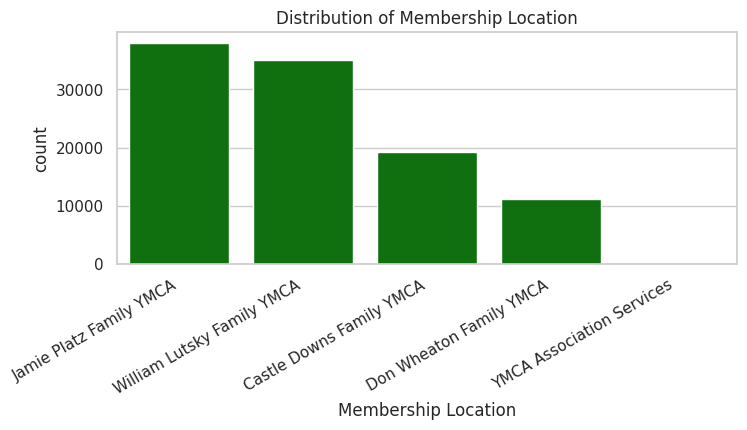

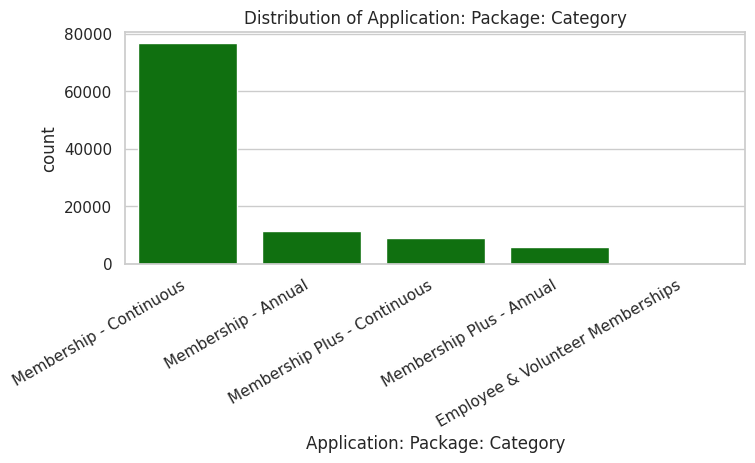

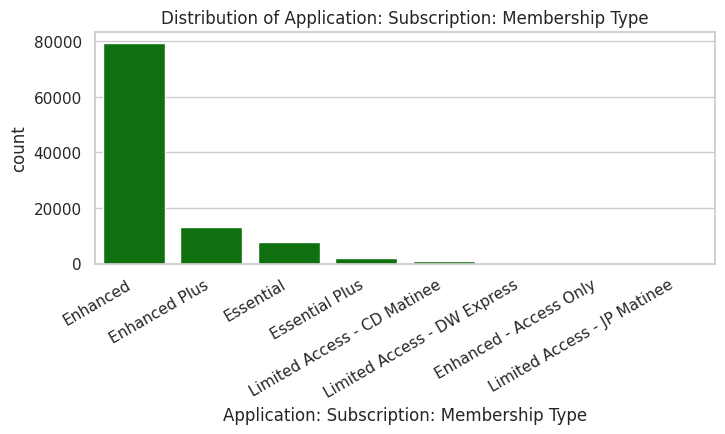

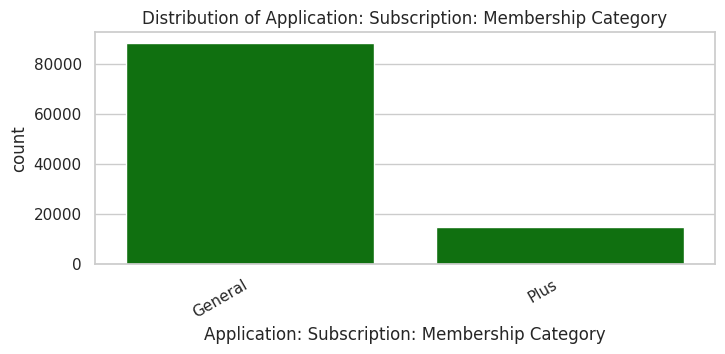

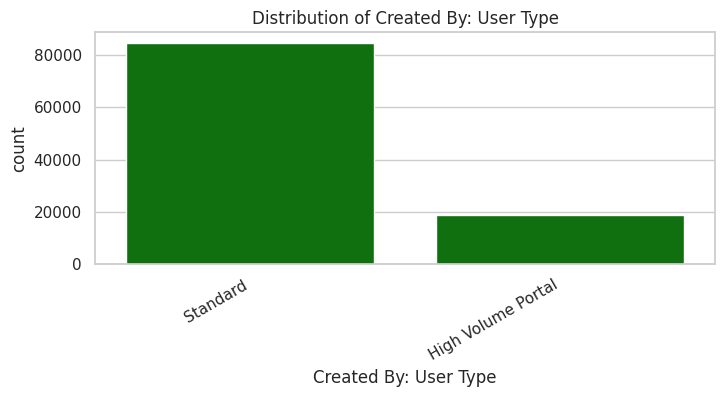

In [ ]:
low_card_cols = [
    'Membership Location', 'Application: Package: Category',
    'Application: Subscription: Membership Type',
    'Application: Subscription: Membership Category', 'Created By: User Type'
]

for col in low_card_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=ymca_data, x=col,color='green',order=ymca_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30, ha = 'right')
    plt.subplots_adjust(bottom=0.3) # Adjusts the bottom margin
    plt.show()

###Visualising Columns with Missing Values

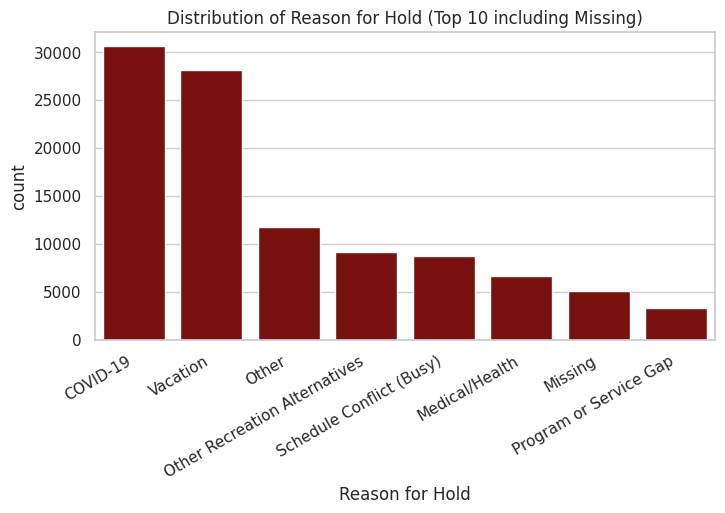

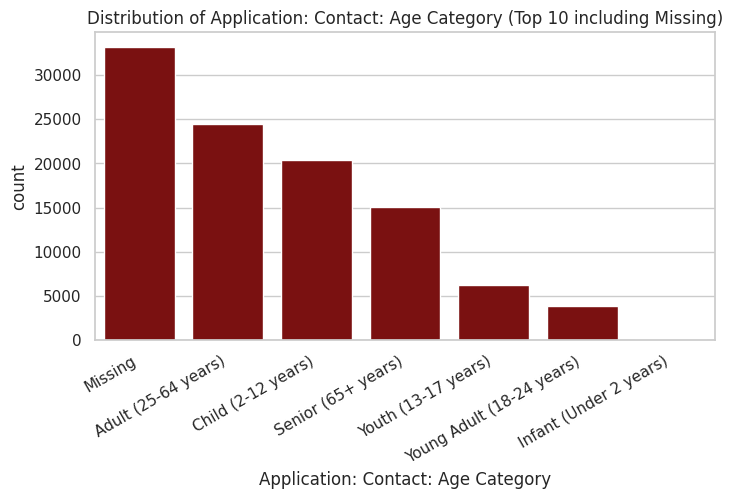

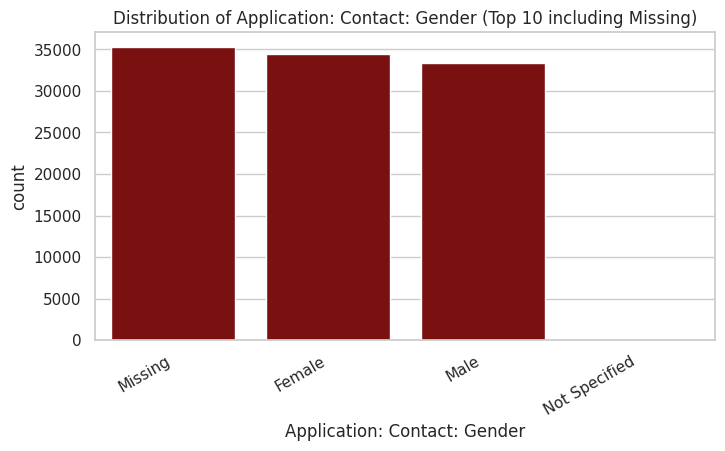

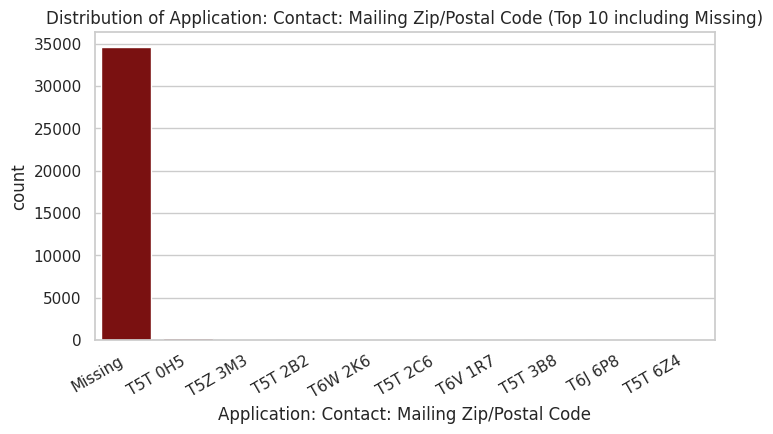

In [ ]:
cols_with_nan = ['Reason for Hold', 'Application: Contact: Age Category',
                 'Application: Contact: Gender', 'Application: Contact: Mailing Zip/Postal Code']

for col in cols_with_nan:
    plt.figure(figsize=(8,4))
    sns.countplot(data=ymca_data, x=ymca_data[col].fillna('Missing'), color = 'darkred',
                  order=ymca_data[col].fillna('Missing').value_counts().head(10).index)
    plt.title(f'Distribution of {col} (Top 10 including Missing)')
    plt.xticks(rotation=30, ha = 'right')
    plt.show()

## Visualization Of Date Columns

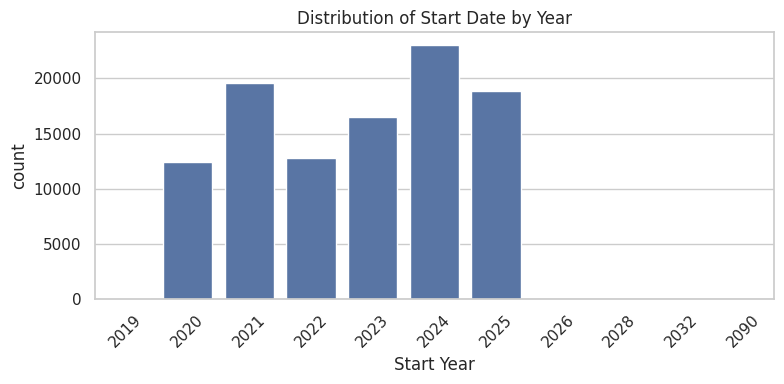

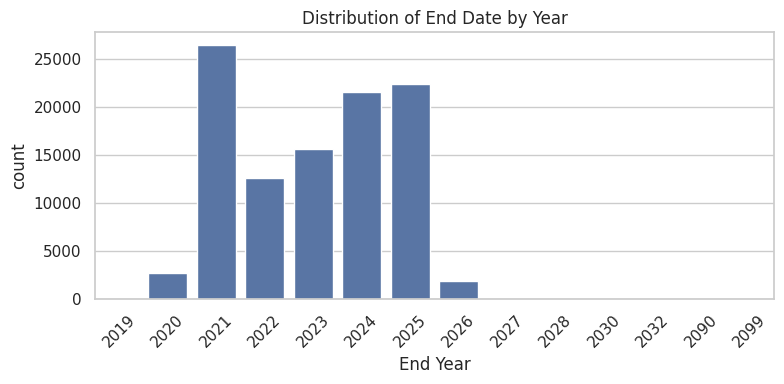

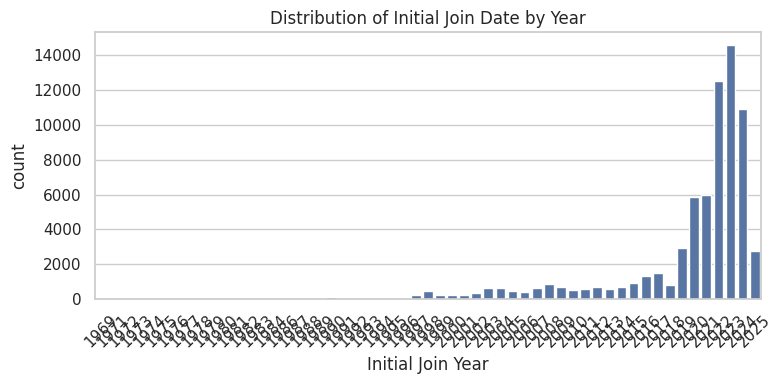

In [ ]:
# Convert date columns to datetime with errors='coerce' to convert invalid dates to NaT instead of throwing an error

ymca_data['Start Date'] = pd.to_datetime(ymca_data['Start Date'], errors='coerce')
ymca_data['End Date'] = pd.to_datetime(ymca_data['End Date'], errors='coerce')
ymca_data['Application: Contact: Initial Join Date'] = pd.to_datetime(
    ymca_data['Application: Contact: Initial Join Date'], errors='coerce'
)

# Extracting year as integer with Int64 to preserve missing values
ymca_data['Start Year'] = ymca_data['Start Date'].dt.year.astype('Int64')
ymca_data['End Year'] = ymca_data['End Date'].dt.year.astype('Int64')
ymca_data['Initial Join Year'] = ymca_data['Application: Contact: Initial Join Date'].dt.year.astype('Int64')

# Function to plot count by year
def plot_year_distribution(column, title):
    plt.figure(figsize=(8,4))
    # Sort years for x-axis, ignoring missing values
    order = ymca_data[column].dropna().value_counts().sort_index().index
    sns.countplot(x=column, data=ymca_data, order=order)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot distributions
plot_year_distribution('Start Year', 'Distribution of Start Date by Year')
plot_year_distribution('End Year', 'Distribution of End Date by Year')
plot_year_distribution('Initial Join Year', 'Distribution of Initial Join Date by Year')


### Birth Decade Analysis

In this step, we:
- Convert the `Application: Contact: Birthdate` column to datetime format.
- Extract the birth year and group it into decades (e.g., 1980s, 1990s, 2010s).
- Visualize the distribution of members by birth decade.

**Important Context:**
- This dataset only includes members who have gone on hold.
- A spike in the 2010s decade does not mean most holds are from children; it means many members who went on hold are children (likely due to family accounts).
- The Age Category chart shows predefined age buckets (Adult, Child, etc.), while this chart uses raw birth years.
- Missing or inconsistent Age Category values can make the two charts look different.
- Birth Decade counts represent *members*, not *frequency of holds per member*. Adults may have fewer members but more holds per person.



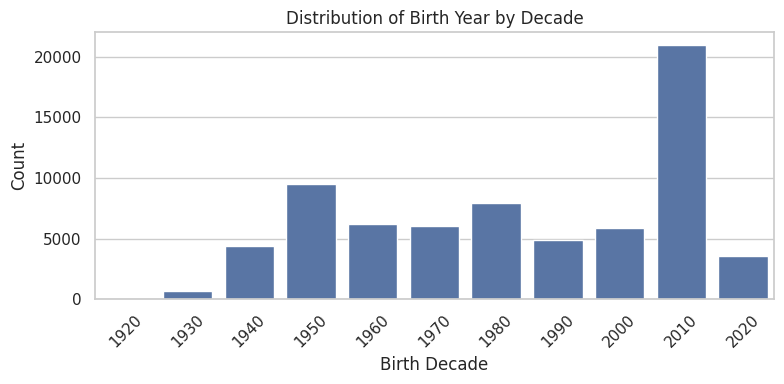

In [ ]:
# Convert 'Application: Contact: Birthdate' to datetime, coercing errors
ymca_data['Application: Contact: Birthdate'] = pd.to_datetime(ymca_data['Application: Contact: Birthdate'], errors='coerce')

# Extract Birth Year from the datetime column, using Int64 to handle NaT values
ymca_data['Birth Year'] = ymca_data['Application: Contact: Birthdate'].dt.year.astype('Int64')

# Created decade bins, handling potential NaT values
ymca_data['Birth Decade'] = (ymca_data['Birth Year'] // 10 * 10).astype('Int64')

plt.figure(figsize=(8,4))
decade_order = ymca_data['Birth Decade'].dropna().sort_values().unique()
sns.countplot(x='Birth Decade', data=ymca_data, order=decade_order)
plt.title('Distribution of Birth Year by Decade')
plt.xlabel('Birth Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

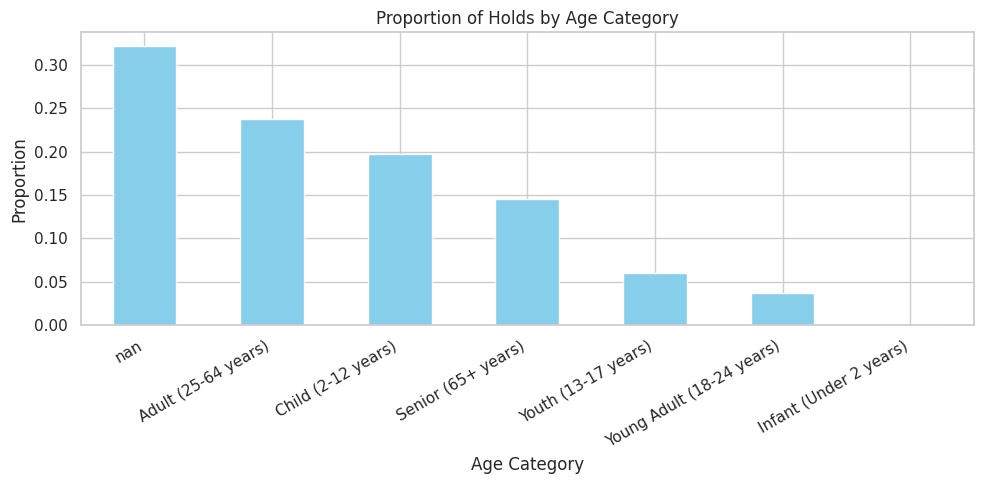

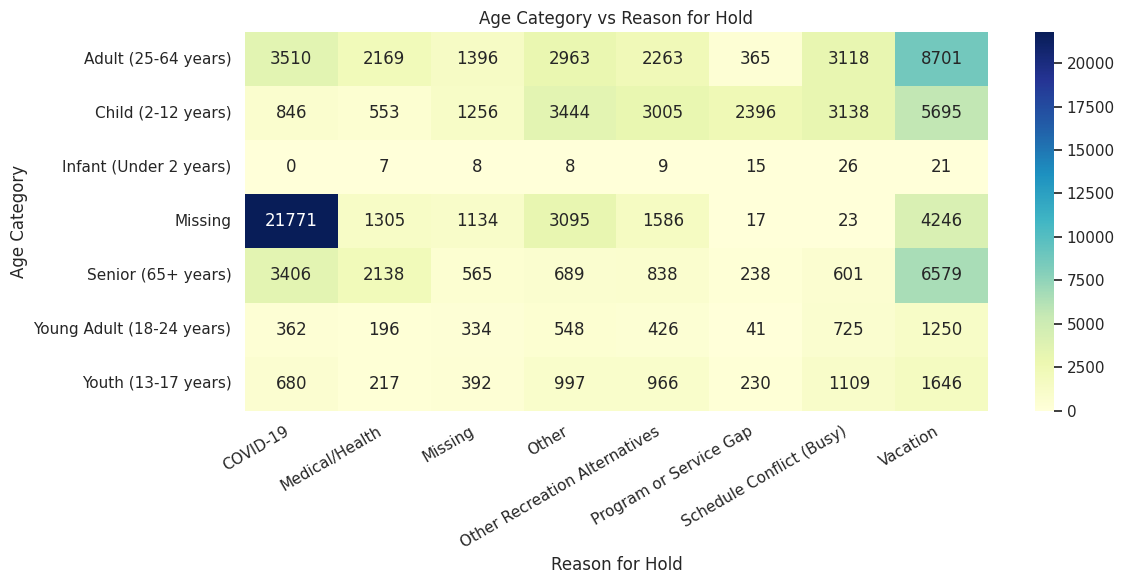

In [ ]:
# 1. Proportion of Holds by Age Category
age_counts = ymca_data['Application: Contact: Age Category'].value_counts(dropna=False)
age_proportions = age_counts / age_counts.sum()

plt.figure(figsize=(10, 5))
age_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Holds by Age Category')
plt.ylabel('Proportion')
plt.xlabel('Age Category')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# 2. Heatmap: Age Category vs Reason for Hold
crosstab = pd.crosstab(
    ymca_data['Application: Contact: Age Category'].fillna('Missing'),
    ymca_data['Reason for Hold'].fillna('Missing')
)

plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Age Category vs Reason for Hold')
plt.ylabel('Age Category')
plt.xlabel('Reason for Hold')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

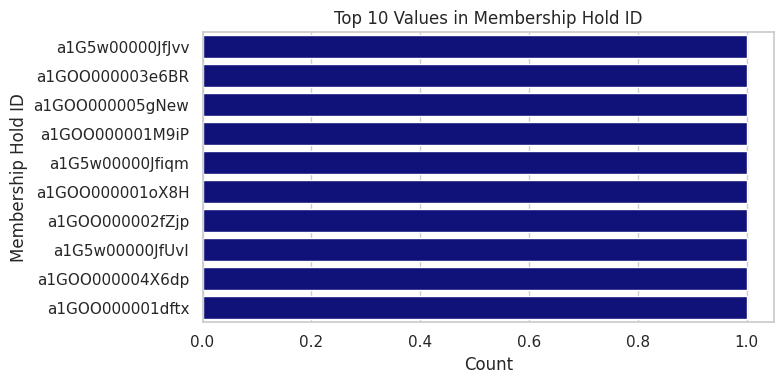

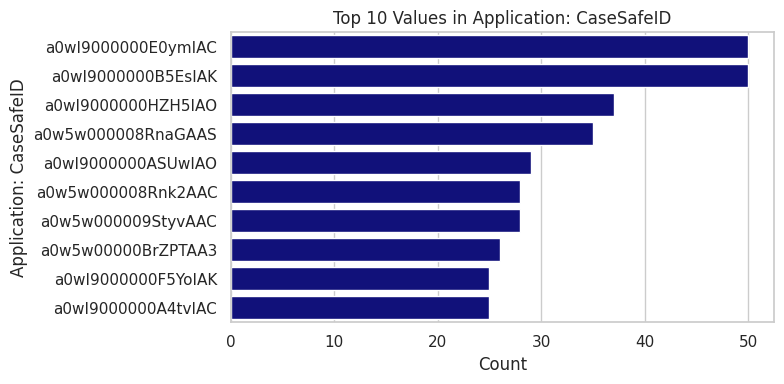

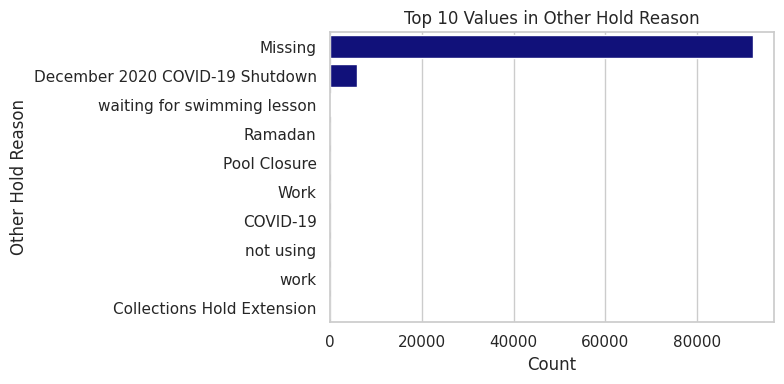

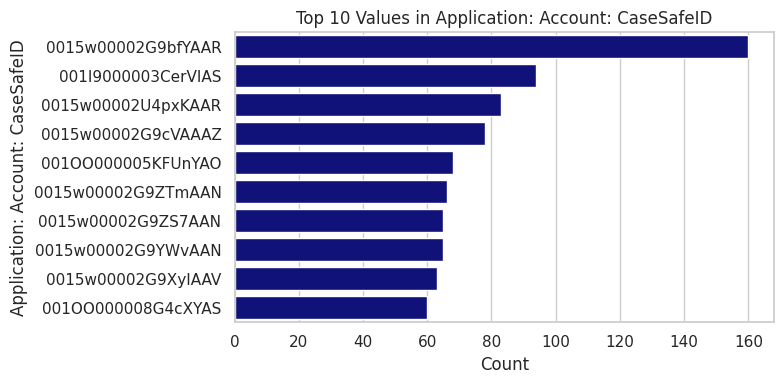

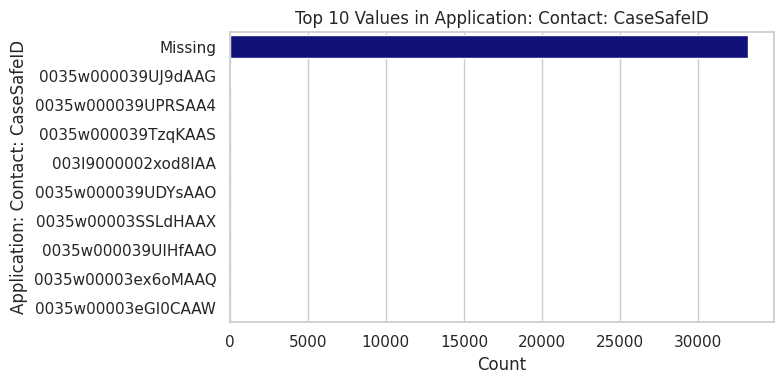

In [ ]:

high_card_cols = [
    'Membership Hold ID',
    'Application: CaseSafeID',
    'Other Hold Reason',
    'Application: Account: CaseSafeID',
    'Application: Contact: CaseSafeID'
]

top_n = 10

for col in high_card_cols:
    plt.figure(figsize=(8,4))
    top_values = ymca_data[col].fillna('Missing').value_counts().head(top_n)
    sns.barplot(x=top_values.values, color = 'darkblue',y=top_values.index)
    plt.title(f'Top {top_n} Values in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


#Multivariate nongraphical Analysis

In [ ]:
# Cross-tabulation between two categorical variables
#  Gender vs Reason for Hold
print("\n=== Crosstab: Gender vs Reason for Hold ===")
print(pd.crosstab(
    ymca_data['Application: Contact: Gender'],
    ymca_data['Reason for Hold'],
    margins=True
))

#  Membership Type vs Reason for Hold
print("\n=== Crosstab: Membership Type vs Reason for Hold ===")
print(pd.crosstab(
    ymca_data['Application: Subscription: Membership Type'],
    ymca_data['Reason for Hold'],
    margins=True
))

#  Membership Location vs Created By: User Type
print("\n=== Crosstab: Membership Location vs Created By: User Type ===")
print(pd.crosstab(
    ymca_data['Membership Location'],
    ymca_data['Created By: User Type'],
    margins=True
))




=== Crosstab: Gender vs Reason for Hold ===
Reason for Hold               COVID-19  Medical/Health  Other  \
Application: Contact: Gender                                    
Female                            4240            3156   4122   
Male                              4554            2022   4146   
Not Specified                        2               7     21   
All                               8796            5185   8289   

Reason for Hold               Other Recreation Alternatives  \
Application: Contact: Gender                                  
Female                                                 3551   
Male                                                   3629   
Not Specified                                            13   
All                                                    7193   

Reason for Hold               Program or Service Gap  \
Application: Contact: Gender                           
Female                                          1617   
Male             

#Multivariate graphical anlysis


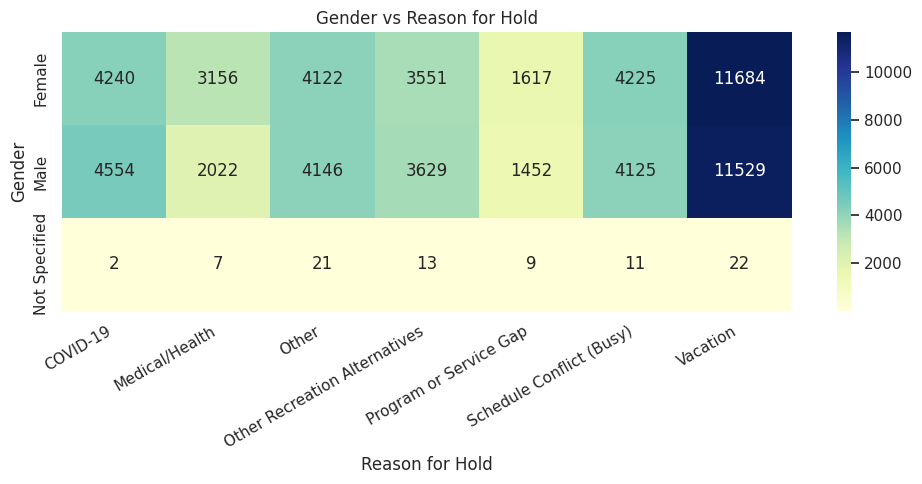

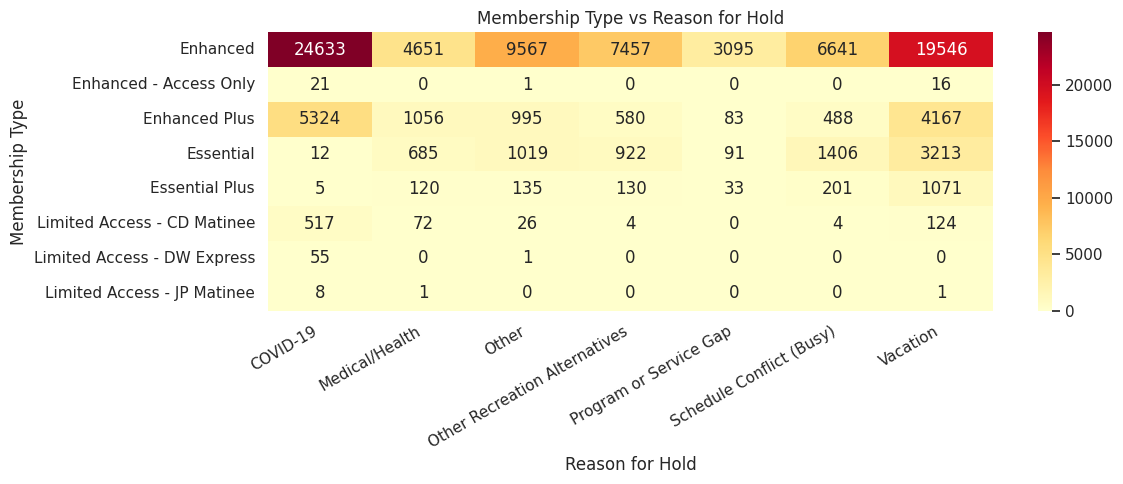

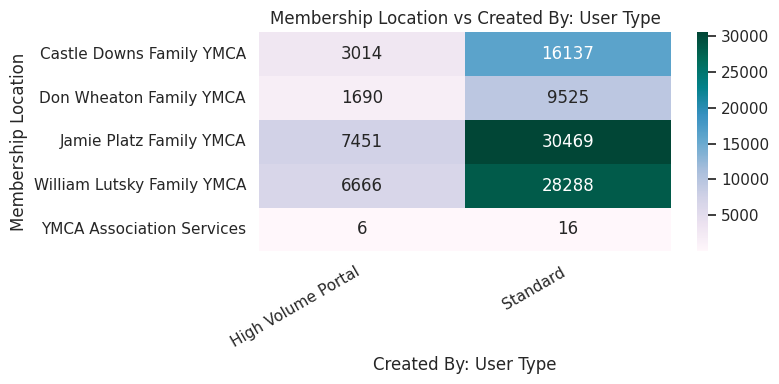

In [ ]:
# Gender vs Reason for Hold
gender_reason = pd.crosstab(
    ymca_data['Application: Contact: Gender'],
    ymca_data['Reason for Hold']
)

plt.figure(figsize=(10,5))
sns.heatmap(gender_reason, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Gender vs Reason for Hold')
plt.ylabel('Gender')
plt.xlabel('Reason for Hold')
plt.xticks(rotation=30, ha = 'right')
plt.tight_layout()
plt.show()

# Membership Type vs Reason for Hold
membership_reason = pd.crosstab(
    ymca_data['Application: Subscription: Membership Type'],
    ymca_data['Reason for Hold']
)

plt.figure(figsize=(12,5))
sns.heatmap(membership_reason, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Membership Type vs Reason for Hold')
plt.ylabel('Membership Type')
plt.xlabel('Reason for Hold')
plt.xticks(rotation=30, ha = 'right')
plt.tight_layout()
plt.show()

# Membership Location vs Created By: User Type
location_user = pd.crosstab(
    ymca_data['Membership Location'],
    ymca_data['Created By: User Type']
)

plt.figure(figsize=(8,4))
sns.heatmap(location_user, annot=True, fmt='d', cmap='PuBuGn')
plt.title('Membership Location vs Created By: User Type')
plt.ylabel('Membership Location')
plt.xlabel('Created By: User Type')
plt.xticks(rotation=30, ha = 'right')
plt.tight_layout()
plt.show()


#Checking For Duplicates in the ID columns

Observation: Family accounts are likely dominant in terms of total activity (holds, memberships). It's important to note that individual members may still be part of family accounts, meaning a high duplication in Contact CaseSafeID does not contradict the potential for family-heavy usage and is a valid aspect to consider while analyzing membership prevalence.

In [ ]:
id_columns = [
    'Membership Hold ID',
    'Application: CaseSafeID',
    'Application: Account: CaseSafeID',
    'Application: Contact: CaseSafeID'
]

for col in id_columns:
    dup_count = ymca_data[col].duplicated().sum()
    print(f"\nColumn '{col}' has {dup_count} duplicate values")

    # Show the duplicated values and how many times each occurs
    dup_values = ymca_data[col][ymca_data[col].duplicated(keep=False)]  # keep=False shows all occurrences
    if not dup_values.empty:
        print(f"Sample duplicated values in '{col}':")
        print(dup_values.value_counts().head(10))  # top 10 duplicated IDs
    else:
        print(f"No duplicates found in '{col}'")


Column 'Membership Hold ID' has 0 duplicate values
No duplicates found in 'Membership Hold ID'

Column 'Application: CaseSafeID' has 62475 duplicate values
Sample duplicated values in 'Application: CaseSafeID':
Application: CaseSafeID
a0wI9000000E0ymIAC    50
a0wI9000000B5EsIAK    50
a0wI9000000HZH5IAO    37
a0w5w000008RnaGAAS    35
a0wI9000000ASUwIAO    29
a0w5w000008Rnk2AAC    28
a0w5w000009StyvAAC    28
a0w5w00000BrZPTAA3    26
a0wI9000000A4tvIAC    25
a0wI9000000F5YoIAK    25
Name: count, dtype: int64

Column 'Application: Account: CaseSafeID' has 81171 duplicate values
Sample duplicated values in 'Application: Account: CaseSafeID':
Application: Account: CaseSafeID
0015w00002G9bfYAAR    160
001I9000003CerVIAS     94
0015w00002U4pxKAAR     83
0015w00002G9cVAAAZ     78
001OO000005KFUnYAO     68
0015w00002G9ZTmAAN     66
0015w00002G9ZS7AAN     65
0015w00002G9YWvAAN     65
0015w00002G9XyIAAV     63
001OO000008G4cXYAS     60
Name: count, dtype: int64

Column 'Application: Contact: Case

##Visual Represntation of Family  Accounts vs Individual Accounts

Quantify how many unique family accounts exist vs. individual-only accounts? Visualize the distribution of holds per account or per contact?

In [ ]:
import plotly.express as px

# Count how many unique contacts are associated with each account
account_contact_counts = ymca_data.groupby('Application: Account: CaseSafeID')['Application: Contact: CaseSafeID'].nunique()

# Define family accounts as those with more than one unique contact
family_accounts = account_contact_counts[account_contact_counts > 1]
individual_accounts = account_contact_counts[account_contact_counts == 1]

# Quantify
num_family_accounts = len(family_accounts)
num_individual_accounts = len(individual_accounts)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Account Type': ['Family', 'Individual'],
    'Count': [num_family_accounts, num_individual_accounts]
})

# Bar chart: Family vs Individual accounts
fig1 = px.bar(summary_df, x='Account Type', y='Count',
              title='Distribution of Account Types in YMCA Dataset',
              text='Count')
fig1.update_traces(textposition='outside')
fig1.update_layout(yaxis_title='Number of Accounts', xaxis_title='Account Type')
fig1.show()

# Histogram: Number of holds per account
holds_per_account = ymca_data['Application: Account: CaseSafeID'].value_counts().reset_index()
holds_per_account.columns = ['Account ID', 'Hold Count']

fig2 = px.histogram(holds_per_account, x='Hold Count', nbins=30,
                    title='Distribution of Membership Holds per Account')
fig2.update_layout(xaxis_title='Number of Holds', yaxis_title='Number of Accounts')
fig2.show()

In summary, the analysis reveals that individual accounts are more numerous than family accounts. The distribution of holds per account is heavily skewed, with a large number of accounts having only a few holds, while a smaller number of accounts have placed multiple holds.

##Relationship Between Membership Type and Package Category

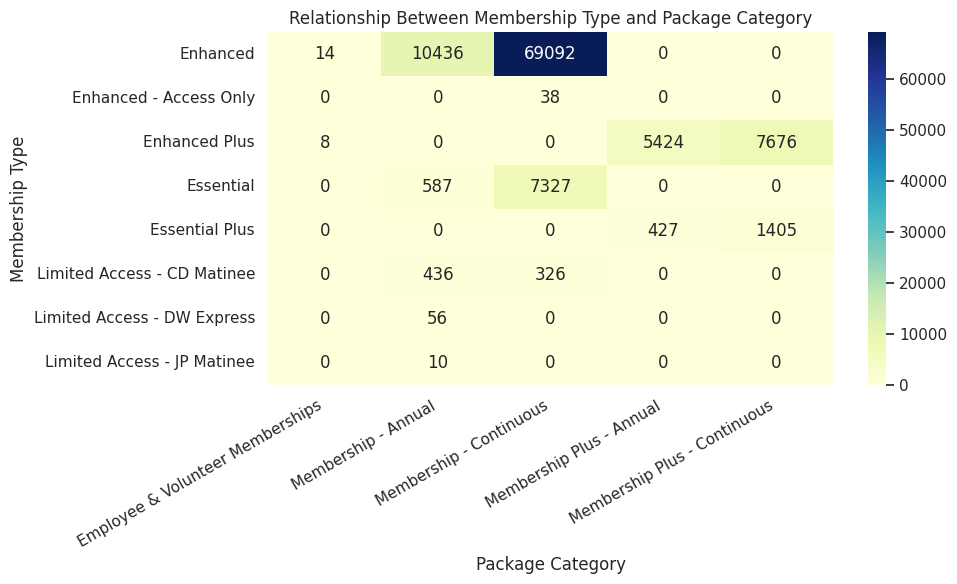

In [ ]:
#Showing a correlation between these, application :Package:Category and applictaion :Subscription :Membership Type

import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your actual DataFrame variable name
df = ymca_data

# Create a cross-tab to see the relationship between Membership Type and Package Category
cross_tab = pd.crosstab(
    df['Application: Subscription: Membership Type'],
    df['Application: Package: Category']
)

# Plot a heatmap of the relationship
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relationship Between Membership Type and Package Category')
plt.xlabel('Package Category')
plt.ylabel('Membership Type')
plt.xticks(rotation=30, ha = 'right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

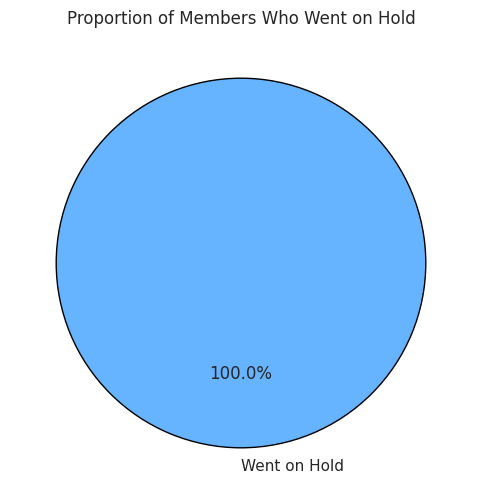

In [ ]:

import matplotlib.pyplot as plt

# Check how many people have ever gone on hold
hold_counts = ymca_data['Membership Hold ID'].notnull().value_counts()

# Create labels
labels = ['Went on Hold', 'No Hold']

# Adjust values
plt.figure(figsize=(6,6))
plt.pie(
    hold_counts,
    labels=labels[:len(hold_counts)],
    autopct='%1.1f%%',
    colors=['#66b3ff','#99ff99'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Members Who Went on Hold')
plt.show()


#Data Cleaning

##Copy Dataset before cleaning

In [ ]:
ymca_cleaned = ymca_data.copy()

In [ ]:
ymca_cleaned.shape

(103262, 23)

##Remove Covid from reasons For Hold

In [ ]:
# Remove any row where "Reason for Hold" contains the word COVID
mask_reason = ymca_cleaned['Reason for Hold'].astype(str).str.contains('covid', case=False, na=False)

# Remove any row where "Other Hold Reason" contains the word COVID
mask_other = ymca_cleaned['Other Hold Reason'].astype(str).str.contains('covid', case=False, na=False)

# Combine both masks (rows to remove)
covid_mask = mask_reason | mask_other

# Show how many are being removed
print("Rows containing COVID in either Reason column:", covid_mask.sum())

# Remove those rows
ymca_cleaned = ymca_cleaned[~covid_mask].reset_index(drop=True)

print("Rows remaining after removing all COVID-related holds:", ymca_cleaned.shape[0])


Rows containing COVID in either Reason column: 30624
Rows remaining after removing all COVID-related holds: 72638


In [ ]:
ymca_cleaned.dtypes

Membership Hold ID                                        object
Application: CaseSafeID                                   object
Membership Location                                       object
Application: Package: Category                            object
Application: Subscription: Membership Type                object
Application: Subscription: Membership Category            object
Reason for Hold                                           object
Other Hold Reason                                         object
Start Date                                        datetime64[ns]
End Date                                          datetime64[ns]
Application: Account: CaseSafeID                          object
Application: Contact: CaseSafeID                          object
Application: Contact: Age Category                        object
Application: Contact: Birthdate                   datetime64[ns]
Application: Contact: Gender                              object
Application: Contact: Mailing Zip/Postal Code             object
Application: Contact: Initial Join Date           datetime64[ns]
Created By: User Type                                     object
Start Year                                                 Int64
End Year                                                   Int64
Initial Join Year                                          Int64
Birth Year                                                 Int64
Birth Decade                                               Int64
dtype: object

#Feature Engineering Columns For Analysis

##Calculate Age at Hold Start

In [ ]:
# Ensure datetime
ymca_cleaned['Start Date'] = pd.to_datetime(ymca_cleaned['Start Date'], errors='coerce')
ymca_cleaned['Application: Contact: Birthdate'] = pd.to_datetime(
    ymca_cleaned['Application: Contact: Birthdate'], errors='coerce'
)

# Calculate age in whole years
ymca_cleaned['Age'] = ((ymca_cleaned['Start Date'] - ymca_cleaned['Application: Contact: Birthdate']).dt.days // 365).astype('Int64')

# Remove negative ages if any
ymca_cleaned['Age'] = ymca_cleaned['Age'].where(ymca_cleaned['Age'] >= 0)

# Quick check
print(ymca_cleaned['Age'].head())

0    11
1    85
2    33
3    63
4    11
Name: Age, dtype: Int64


##Calculate Hold Duration

In [ ]:
# Calculate Hold Duration in days
# Using the original 'Start Date' and 'End Date' columns
ymca_cleaned['Hold Duration (days)'] = (ymca_cleaned['End Date'] - ymca_cleaned['Start Date']).dt.days.astype('Int64')
print(ymca_cleaned['Hold Duration (days)'].head())

0    181
1     22
2      1
3     61
4    183
Name: Hold Duration (days), dtype: Int64


##Average Hold Duration per Member

In [ ]:
# Calculate Hold Duration in days using the correct column names
ymca_cleaned['Hold Duration'] = (ymca_cleaned['End Date'] - ymca_cleaned['Start Date']).dt.days

# Calculate the average hold duration per member using the correct column name for grouping
avg_hold_duration = ymca_cleaned.groupby('Application: Contact: CaseSafeID')['Hold Duration'].mean().reset_index()
avg_hold_duration.rename(columns={'Hold Duration': 'Avg_Hold_Duration'}, inplace=True)

# Display the result
print("\n=== Average Hold Duration per Member ===")
display(avg_hold_duration.head())


=== Average Hold Duration per Member ===


Application: Contact: CaseSafeID  Avg_Hold_Duration
0               0035w000039TzTWAA0             181.00
1               0035w000039TzUNAA0              21.80
2               0035w000039TzUTAA0              22.75
3               0035w000039TzV3AAK              26.80
4               0035w000039TzV8AAK              28.00

##Count Members With Average Hold Duration = 0

In [ ]:
# Sort the average hold duration in ascending order
avg_hold_duration_sorted = avg_hold_duration.sort_values(by='Avg_Hold_Duration', ascending=True)

# Display the top rows
display(avg_hold_duration_sorted.head())


Application: Contact: CaseSafeID  Avg_Hold_Duration
2607                0035w000039UEFWAA4                0.0
18009               003OO00000DBRwiYAH                0.0
18007               003OO00000DBFnUYAX                0.0
12995               003I9000004n0QlIAI                0.0
18901               003OO00000JvKVKYA3                0.0

In [ ]:
# ===============================
# Check how many members have Avg Hold Duration = 0
# ===============================

zero_avg_duration = avg_hold_duration[avg_hold_duration['Avg_Hold_Duration'] == 0]

num_zero_avg_members = zero_avg_duration.shape[0]

print("=========================================")
print(f"Members with Avg_Hold_Duration = 0: {num_zero_avg_members}")
print("=========================================")

# Optional: display some examples
display(zero_avg_duration.head())


Members with Avg_Hold_Duration = 0: 268


Application: Contact: CaseSafeID  Avg_Hold_Duration
159               0035w000039U0FyAAK                0.0
333               0035w000039U1HEAA0                0.0
371               0035w000039U1U2AAK                0.0
436               0035w000039U1rxAAC                0.0
463               0035w000039U25DAAS                0.0

In [ ]:
ymca_cleaned[ymca_cleaned['Application: Contact: CaseSafeID'] == '0035w00003TUJnQAAX'][['Start Date','End Date','Hold Duration']]


Start Date   End Date  Hold Duration
39486 2025-03-04 2025-03-04            0.0

##Remove members with AVG Hold Duration = 0

In [ ]:
# =========================================
# Remove members with Avg_Hold_Duration = 0
# =========================================

# 1. Get the list of members with zero average hold duration
zero_avg_contact_ids = zero_avg_duration['Application: Contact: CaseSafeID'].unique()

print(f"Members to remove (Avg_Hold_Duration = 0): {len(zero_avg_contact_ids)}")

# 2. Remove them from ymca_cleaned
before_rows = ymca_cleaned.shape[0]

ymca_cleaned = ymca_cleaned[
    ~ymca_cleaned['Application: Contact: CaseSafeID'].isin(zero_avg_contact_ids)
].reset_index(drop=True)

after_rows = ymca_cleaned.shape[0]

print("============================================")
print(f"Rows BEFORE removal: {before_rows}")
print(f"Rows AFTER removal:  {after_rows}")
print(f"Total rows removed:  {before_rows - after_rows}")
print("============================================")


Members to remove (Avg_Hold_Duration = 0): 268
Rows BEFORE removal: 72638
Rows AFTER removal:  72353
Total rows removed:  285


WHAT THIS DOES

Removes all rows belonging to members whose
Avg_Hold_Duration = 0

This is important because one member can have multiple rows.So, the 285 rows represent the sum of all individual hold events that belonged to those 268 members. This implies that some of the 268 members had more than one hold record, each with a 0-day duration.

Ensures your dataset contains only meaningful behavioral patterns
Makes risk logic far more stable

Your thresholds (Low, Medium, High) won’t be distorted by noise.




##Recalculate Average Hold Duration

In [ ]:
# 1) Recompute per-row hold duration to be safe (days, float)
ymca_cleaned['Hold Duration'] = (ymca_cleaned['End Date'] - ymca_cleaned['Start Date']).dt.days.astype('float')

# 2) Compute average hold duration per member (contact_id)
avg_hold_duration = (
    ymca_cleaned
    .groupby('Application: Contact: CaseSafeID', dropna=True)['Hold Duration']
    .mean()
    .reset_index()
    .rename(columns={'Hold Duration': 'Avg_Hold_Duration'})
)

# 3) Quick checks & diagnostics
total_members = avg_hold_duration.shape[0]
zero_avg_count = int((avg_hold_duration['Avg_Hold_Duration'] == 0).sum())
print("Recalculated Avg_Hold_Duration for members:", total_members)
print("Members with Avg_Hold_Duration == 0 (should be 0):", zero_avg_count)
print("\nSample of recalculated averages:")
display(avg_hold_duration.head())

# 4) Merge the Avg_Hold_Duration back into the main dataframe for convenience
#    (This will attach the same Avg_Hold_Duration value to every row for that member)
ymca_cleaned = ymca_cleaned.merge(
    avg_hold_duration,
    on='Application: Contact: CaseSafeID',
    how='left'
)

print("\nMerged Avg_Hold_Duration into ymca_cleaned.")
print("ymca_cleaned shape:", ymca_cleaned.shape)
print("Any NA in Avg_Hold_Duration column?:", ymca_cleaned['Avg_Hold_Duration'].isna().any())

# 5) Optional: show a few members where Avg_Hold_Duration is small (sanity)
print("\nFew members with smallest Avg_Hold_Duration:")
display(avg_hold_duration.nsmallest(10, 'Avg_Hold_Duration'))


Recalculated Avg_Hold_Duration for members: 21420
Members with Avg_Hold_Duration == 0 (should be 0): 0

Sample of recalculated averages:


Application: Contact: CaseSafeID  Avg_Hold_Duration
0               0035w000039TzTWAA0             181.00
1               0035w000039TzUNAA0              21.80
2               0035w000039TzUTAA0              22.75
3               0035w000039TzV3AAK              26.80
4               0035w000039TzV8AAK              28.00


Merged Avg_Hold_Duration into ymca_cleaned.
ymca_cleaned shape: (72353, 27)
Any NA in Avg_Hold_Duration column?: True

Few members with smallest Avg_Hold_Duration:


Application: Contact: CaseSafeID  Avg_Hold_Duration
1198                0035w000039U51vAAC                0.5
1253                0035w000039U5LwAAK                0.5
10768               003I90000034XwNIAU                0.5
17920               003OO00000Dtu7CYAR                0.5
9                   0035w000039TzWiAAK                1.0
174                 0035w000039U0LjAAK                1.0
231                 0035w000039U0fjAAC                1.0
273                 0035w000039U0vFAAS                1.0
3025                0035w000039UGz1AAG                1.0
4081                0035w000039UN5NAAW                1.0

**Recalculate average hold duration**

After removing members whose average hold duration was 0, we recomputed per-row hold duration and recalculated the average hold duration per member (Avg_Hold_Duration). This ensures downstream features and risk logic use updated, clean behavioral averages.

In [ ]:
ymca_cleaned[ymca_cleaned['Application: Contact: CaseSafeID'] == '0035w000039U51vAAC'][['Start Date','End Date','Hold Duration']]

Start Date   End Date  Hold Duration
28012 2022-10-13 2022-10-14            1.0
28018 2022-10-13 2022-10-13            0.0

In [ ]:
contact_col = 'Application: Contact: CaseSafeID'
hold_duration_col = 'Hold Duration' # This column already exists and is float
new_avg_duration_col = 'Avg_Hold_Duration_Computed'

print("\n=== Re-computing Average Hold Duration per Member ===")

# Compute average hold duration per member
avg_hold_duration_recomputed = (
    ymca_cleaned.groupby(contact_col)[hold_duration_col]
    .mean()
    .reset_index(name=new_avg_duration_col)
)

# Display the result
print("Unique members:", avg_hold_duration_recomputed[contact_col].nunique())
print("Min average hold duration:", avg_hold_duration_recomputed[new_avg_duration_col].min())
print("Max average hold duration:", avg_hold_duration_recomputed[new_avg_duration_col].max())
display(avg_hold_duration_recomputed.head(10))




=== Re-computing Average Hold Duration per Member ===
Unique members: 21420
Min average hold duration: 0.5
Max average hold duration: 2131.0


Application: Contact: CaseSafeID  Avg_Hold_Duration_Computed
0               0035w000039TzTWAA0                      181.00
1               0035w000039TzUNAA0                       21.80
2               0035w000039TzUTAA0                       22.75
3               0035w000039TzV3AAK                       26.80
4               0035w000039TzV8AAK                       28.00
5               0035w000039TzVwAAK                      186.00
6               0035w000039TzW8AAK                       87.50
7               0035w000039TzWDAA0                       95.00
8               0035w000039TzWEAA0                       89.00
9               0035w000039TzWiAAK                        1.00

##Check how much no holds we have and for shorter hold durations. Check how they they went on hold and the reason for hold.

Total number of short holds (<= 7 days): 6499


/tmp/ipython-input-1524226780.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




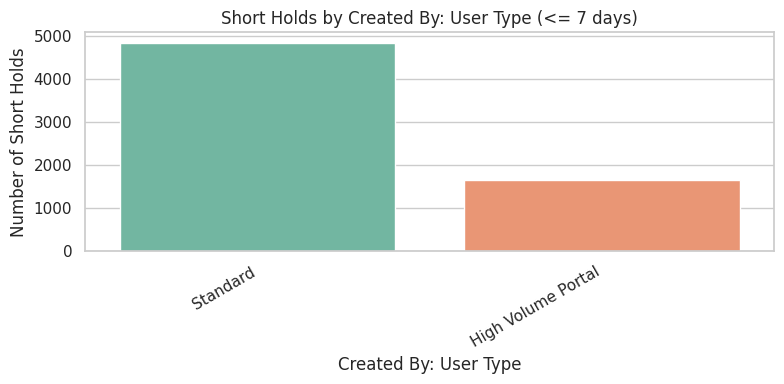

/tmp/ipython-input-1524226780.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




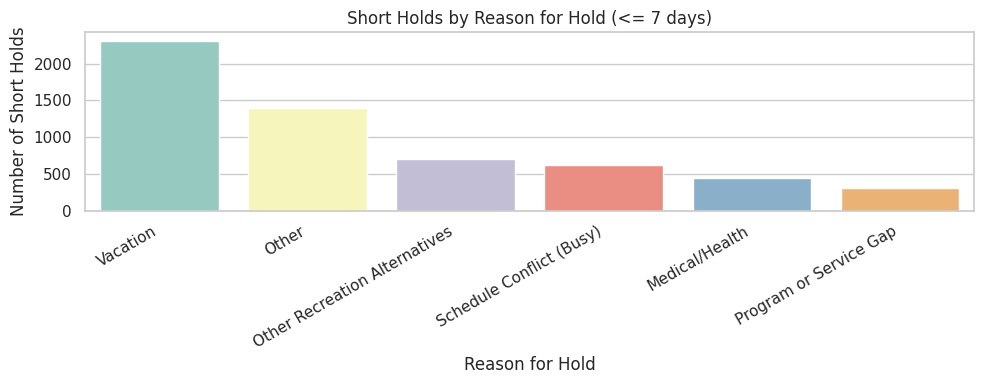

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set threshold for short holds (e.g., 7 days)
short_hold_threshold = 7

# Filter short holds
short_holds = ymca_cleaned[ymca_cleaned['Hold Duration'] <= short_hold_threshold]

# Count number of short holds
num_short_holds = len(short_holds)
print(f"Total number of short holds (<= {short_hold_threshold} days): {num_short_holds}")

# Distribution by Created By: User Type
plt.figure(figsize=(8,4))
sns.countplot(data=short_holds, x='Created By: User Type', order=short_holds['Created By: User Type'].value_counts().index, palette='Set2')
plt.title(f'Short Holds by Created By: User Type (<= {short_hold_threshold} days)')
plt.ylabel('Number of Short Holds')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Distribution by Reason for Hold
plt.figure(figsize=(10,4))
sns.countplot(data=short_holds, x='Reason for Hold', order=short_holds['Reason for Hold'].value_counts().index, palette='Set3')
plt.title(f'Short Holds by Reason for Hold (<= {short_hold_threshold} days)')
plt.ylabel('Number of Short Holds')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

##Hold Frequency per Member

In [ ]:
# --- Compute Hold Frequency (after dropping missing contact IDs) ---

contact_col = 'Application: Contact: CaseSafeID'
count_col = 'Start Date'
hf_col = 'Hold_Frequency'

# 1. Drop rows with missing contact_id first
before = ymca_cleaned.shape[0]
ymca_cleaned = ymca_cleaned.dropna(subset=[contact_col]).reset_index(drop=True)
after = ymca_cleaned.shape[0]

print(f"Dropped {before-after} rows with missing contact_id.")
print("Dataset shape now:", ymca_cleaned.shape)

# 2. Compute hold frequency per member
hold_frequency = (
    ymca_cleaned.groupby(contact_col)[count_col]
    .count()
    .reset_index(name=hf_col)
)

# 3. Merge back into main DataFrame
ymca_cleaned = ymca_cleaned.merge(hold_frequency, on=contact_col, how='left')

# 4. Sanity check
print("\n=== Hold Frequency Added ===")
print("Unique members:", hold_frequency[contact_col].nunique())
print("Min frequency:", hold_frequency[hf_col].min())
print("Max frequency:", hold_frequency[hf_col].max())
display(ymca_cleaned[[contact_col, hf_col]].head(10))


Dropped 11371 rows with missing contact_id.
Dataset shape now: (60982, 27)

=== Hold Frequency Added ===
Unique members: 21420
Min frequency: 1
Max frequency: 62


Application: Contact: CaseSafeID  Hold_Frequency
0               0035w000039TzTWAA0               1
1               0035w000039U8XqAAK              11
2               0035w000039UJ01AAG               3
3               0035w000039UR1rAAG               8
4               0035w00003TVcDoAAL               8
5               003I9000001qcN1IAI               2
6               0035w000039U8XqAAK              11
7               0035w000039UJ01AAG               3
8               0035w000039UR1rAAG               8
9               0035w00003TVcDoAAL               8

In [ ]:
# Sort ascending to see lowest frequency first
hold_frequency_sorted = hold_frequency.sort_values(by='Hold_Frequency', ascending=True)
display(hold_frequency_sorted.head())  # lowest frequency
display(hold_frequency_sorted.tail())  # highest frequency


Application: Contact: CaseSafeID  Hold_Frequency
18                 0035w000039TzYxAAK               1
17                 0035w000039TzYuAAK               1
13                 0035w000039TzXPAA0               1
9                  0035w000039TzWiAAK               1
8085               0035w00003bObBUAA0               1

Application: Contact: CaseSafeID  Hold_Frequency
2478                0035w000039UDYsAAO              30
10649               003I9000002xod8IAA              34
69                  0035w000039TzqKAAS              34
4646                0035w000039UPRSAA4              51
3351                0035w000039UJ9dAAG              62

##Handling Other Reason For Hold

In [ ]:
# Calculate the number of missing values in the original 'Other Hold Reason' column
missing_other_reason_count = ymca_data['Other Hold Reason'].isnull().sum()

# Calculate the total number of rows
total_rows = len(ymca_data)

# Calculate the percentage of missing values
percentage_missing_other_reason = (missing_other_reason_count / total_rows) * 100

print(f"Number of missing values in 'Other Hold Reason': {missing_other_reason_count}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of missing values in 'Other Hold Reason': {percentage_missing_other_reason:.2f}%")

Number of missing values in 'Other Hold Reason': 92079
Total number of rows: 103262
Percentage of missing values in 'Other Hold Reason': 89.17%


## Final_Hold_Reason Logic

#Handling Other reason for hold
The intention here is to consolidate this coulmn with the 'Reasons For Hold column' since this column is mostly empty

Grouped Hold Reason = cleaned version of Other Hold Reason

Final Hold Reason = best available reason, combining both Grouped Hold Reason and Reason for Hold, while prioritizing Reasons For hold


In [ ]:
def group_hold_reason(reason):
    if pd.isnull(reason):
        return 'Unknown'
    reason = reason.lower()

    if 'covid' in reason or 'shutdown' in reason:
        return 'COVID-19'
    elif 'financial' in reason or 'unpaid' in reason or 'declined' in reason or 'payment' in reason or 'collection hold extension' in reason or 'collections hold extension' in reason:
        return 'Financial'
    elif 'work' in reason or 'working' in reason:
        return 'Work-related'
    elif 'come in' in reason or 'not able to come' in reason or 'resides in europe' in reason or 'moving' in reason or 'not using' in reason or 'out of town' in reason:
        return 'Unable to come in'
    elif 'swimming' in reason or 'lesson' in reason or 'swim' in reason:
        return 'Swimming lesson'
    elif 'vacation' in reason or 'summer' in reason:
        return 'Vacation'
    elif 'ramadan' in reason:
        return 'Religious observance'
    elif 'school' in reason or 'busy' in reason or 'taking a break' in reason:
        return 'Schedule conflict'
    elif 'policy' in reason:
        return 'Policy-related'
    elif reason == 'na':
        return 'Unknown'
    else:
        return 'Other'


In [ ]:
import numpy as np

# Step 1: Bring back original reason columns
original_reasons = ymca_data[['Membership Hold ID', 'Reason for Hold', 'Other Hold Reason']].copy()

# Remove any old versions of these columns
ymca_cleaned = ymca_cleaned.drop(columns=['Reason for Hold', 'Other Hold Reason'], errors='ignore')

# Merge original reasons into cleaned dataset
ymca_cleaned = ymca_cleaned.merge(
    original_reasons,
    on='Membership Hold ID',
    how='left'
)

# Step 2: Apply grouping logic to 'Other Hold Reason'
ymca_cleaned['Grouped Hold Reason'] = ymca_cleaned['Other Hold Reason'].apply(group_hold_reason)

# Step 3: Identify ANY row that contains COVID-related text
mask_reason = ymca_cleaned['Reason for Hold'].astype(str).str.contains('covid', case=False, na=False)
mask_grouped = ymca_cleaned['Grouped Hold Reason'].astype(str).str.contains('covid', case=False, na=False)

covid_mask = mask_reason | mask_grouped

# PRINT: total COVID rows found
print("==============================================")
print(f"COVID-related rows detected BEFORE removal: {covid_mask.sum()}")
print("==============================================")

# Remove COVID rows
ymca_cleaned = ymca_cleaned[~covid_mask].reset_index(drop=True)

# PRINT: rows remaining
print(f"Rows remaining AFTER removing COVID-related rows: {ymca_cleaned.shape[0]}")
print("==============================================")

# Step 4: Build Final_Hold_Reason
ymca_cleaned['Final_Hold_Reason'] = np.where(
    ymca_cleaned['Reason for Hold'].notna(),
    ymca_cleaned['Reason for Hold'],
    ymca_cleaned['Grouped Hold Reason']
)

# Step 5: Handle missing values
ymca_cleaned['Final_Hold_Reason'] = ymca_cleaned['Final_Hold_Reason'].fillna('Unknown')

# Step 6: Convert to category
ymca_cleaned['Final_Hold_Reason'] = ymca_cleaned['Final_Hold_Reason'].astype('category')

# Step 7: Drop temporary columns
ymca_cleaned.drop(columns=['Reason for Hold', 'Other Hold Reason', 'Grouped Hold Reason'], inplace=True, errors='ignore')

print("Final_Hold_Reason column created successfully.")
print("Remaining Final_Hold_Reason categories:")
print(ymca_cleaned['Final_Hold_Reason'].value_counts())


COVID-related rows detected BEFORE removal: 20
Rows remaining AFTER removing COVID-related rows: 60962
Final_Hold_Reason column created successfully.
Remaining Final_Hold_Reason categories:
Final_Hold_Reason
Vacation                         23835
Schedule Conflict (Busy)          8668
Other                             8533
Other Recreation Alternatives     7469
Medical/Health                    5270
Unknown                           3921
Program or Service Gap            3266
Name: count, dtype: int64



=== Reasons for Hold for Members with Hold_Frequency = 1 ===
(Using the refined 'Final_Hold_Reason')


Final_Hold_Reason
Vacation                         2804
Schedule Conflict (Busy)         1339
Other                            1201
Other Recreation Alternatives    1056
Medical/Health                    580
Program or Service Gap            552
Unknown                           545
Name: count, dtype: int64

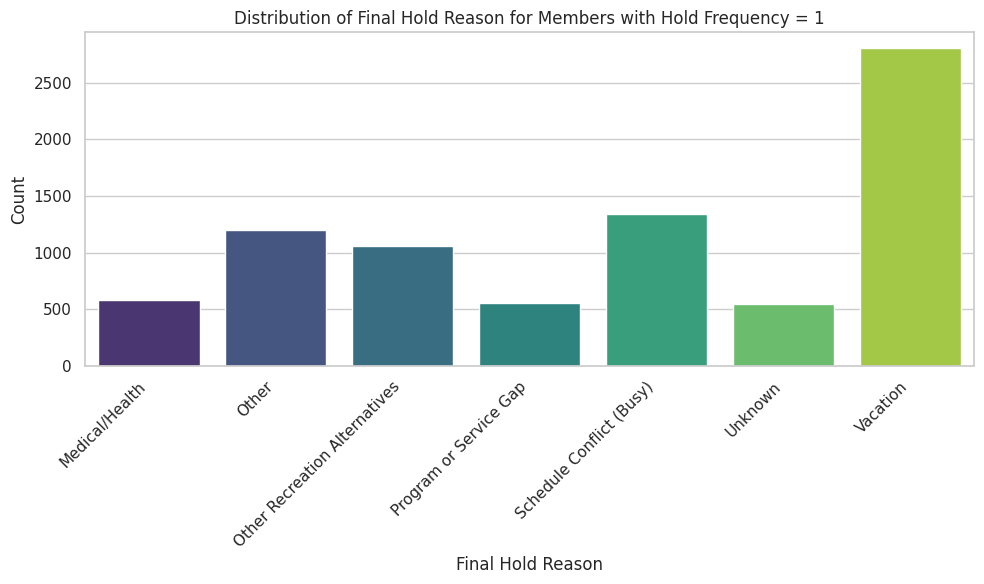

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for members with a Hold_Frequency of 1
single_hold_members = ymca_cleaned[ymca_cleaned['Hold_Frequency'] == 1].copy() # Use .copy() to avoid SettingWithCopyWarning

# Get the value counts for the 'Final_Hold_Reason' for these members
reasons_for_single_hold = single_hold_members['Final_Hold_Reason'].value_counts()

print("\n=== Reasons for Hold for Members with Hold_Frequency = 1 ===\n(Using the refined 'Final_Hold_Reason')")
display(reasons_for_single_hold)

# Visualize the distribution
plt.figure(figsize=(10, 6))
# Addressing the FutureWarning: Passing `palette` without assigning `hue` is deprecated.
sns.barplot(x=reasons_for_single_hold.index, y=reasons_for_single_hold.values, palette='viridis', hue=reasons_for_single_hold.index, legend=False)
plt.title('Distribution of Final Hold Reason for Members with Hold Frequency = 1')
plt.xlabel('Final Hold Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Summary:
For members with a Hold_Frequency of 1, the most prominent reasons for holds are 'Vacation' (2,804 members), followed by 'Schedule Conflict (Busy)' (1,339 members), and 'Other' (1,201 members). This pattern largely mirrors the overall distribution of Final_Hold_Reason across all members.

Data Analysis Key Findings
Refinement of Final_Hold_Reason: The Final_Hold_Reason column was successfully refined by re-merging original reason columns, applying a group_hold_reason function, and then filtering out 20 COVID-related entries from the dataset.
Dataset Size After COVID Filtering: After removing COVID-related holds, the ymca_cleaned dataset was reduced to 60,962 rows.
Hierarchical Reason Assignment: The Final_Hold_Reason was created hierarchically, prioritizing 'Reason for Hold' and falling back to 'Grouped Hold Reason' if the former was null, with any remaining NaN values filled as 'Unknown'.
Overall Top Hold Reasons (Before Frequency Filter): Across the entire cleaned dataset, the most frequent final hold reasons were 'Vacation' (23,835 entries), 'Schedule Conflict (Busy)' (8,668 entries), and 'Other' (8,533 entries).
Top Hold Reasons for Single-Hold Members: For members with a Hold_Frequency of 1, the leading reasons were 'Vacation' (2,804 members), 'Schedule Conflict (Busy)' (1,339 members), and 'Other' (1,201 members).
Insights or Next Steps
The high frequency of 'Vacation' as a hold reason, both overall and for single-hold members, suggests that members are actively using the hold feature for planned breaks. This could be an opportunity to offer flexible membership options or vacation-specific benefits.
The 'Other' category remains significant for single-hold members

In [ ]:
ymca_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60962 entries, 0 to 60961
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Membership Hold ID                              60962 non-null  object        
 1   Application: CaseSafeID                         60962 non-null  object        
 2   Membership Location                             60962 non-null  object        
 3   Application: Package: Category                  60962 non-null  object        
 4   Application: Subscription: Membership Type      60962 non-null  object        
 5   Application: Subscription: Membership Category  60962 non-null  object        
 6   Start Date                                      60962 non-null  datetime64[ns]
 7   End Date                                        60960 non-null  datetime64[ns]
 8   Application: Account: CaseSafeID              

In [ ]:
ymca_cleaned[['Final_Hold_Reason']].isnull().sum()

Final_Hold_Reason    0
dtype: int64

##Visualizing Final Reasons For Hold

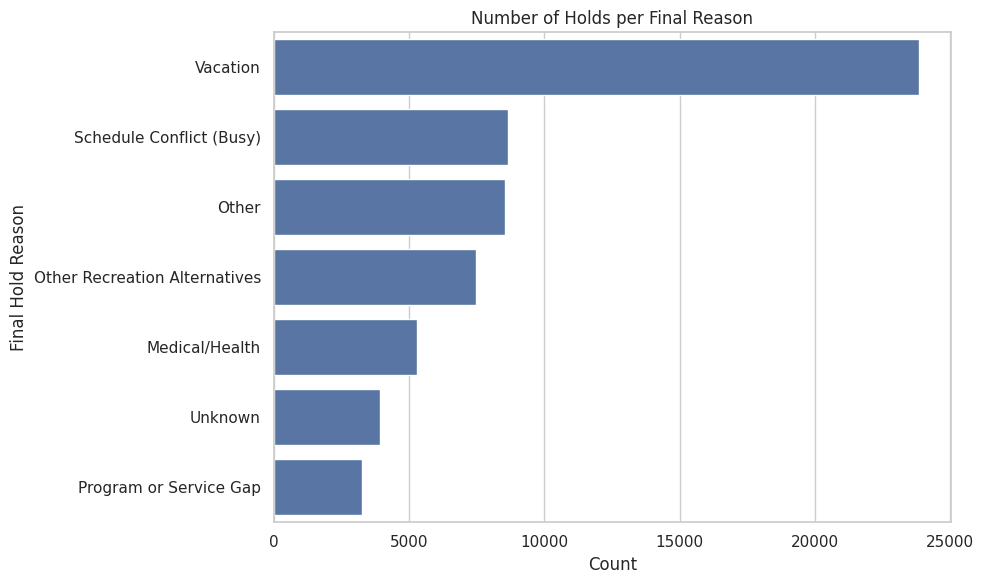

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=ymca_cleaned,
    y='Final_Hold_Reason',
    order=ymca_cleaned['Final_Hold_Reason'].value_counts().index
)
plt.title('Number of Holds per Final Reason')
plt.xlabel('Count')
plt.ylabel('Final Hold Reason')
plt.tight_layout()
plt.show()


##Time Between Holds (Gap Between Holds)


To understand member behavior across multiple hold events, we computed Time Between Holds (TBH), which measures the number of days between the end of one hold and the start of the next hold for each member.

Steps performed:

Sorted each member’s hold history chronologically

Calculated the difference between the end date of one hold and the start of the next

Cleaned unrealistic values (negatives)

Applied a log transformation (log1p) to reduce skew

TBH helps identify behavioral patterns:

Shorter TBH → frequent holds → higher risk

Longer TBH → infrequent holds → lower risk

TBH is a strong behavioral indicator and complements hold duration and hold frequency in predicting risk level.

In [ ]:
# === TIME BETWEEN HOLDS (TBH) ===
import numpy as np

# Make a copy with only necessary columns
tbh_df = ymca_cleaned[['Application: Contact: CaseSafeID', 'Start Date', 'End Date']].copy()

# Sort by member and start date to calculate differences correctly
tbh_df = tbh_df.sort_values(by=['Application: Contact: CaseSafeID', 'Start Date'])

# Calculate TBH per member:
# TBH = Next Start Date - Previous End Date
tbh_df['Time_Between_Holds'] = (
    tbh_df.groupby('Application: Contact: CaseSafeID')['Start Date'].shift(-1) -
    tbh_df['End Date']
).dt.days

# Merge back into main dataset
ymca_cleaned = ymca_cleaned.merge(
    tbh_df[['Application: Contact: CaseSafeID', 'Start Date', 'Time_Between_Holds']],
    on=['Application: Contact: CaseSafeID', 'Start Date'],
    how='left'
)

# Replace negative or unrealistic values (if any) with NaN
ymca_cleaned['Time_Between_Holds'] = ymca_cleaned['Time_Between_Holds'].apply(
    lambda x: x if pd.notnull(x) and x >= 0 else np.nan
)

# Log transform to reduce skew (optional but recommended)
ymca_cleaned['Time_Between_Holds_Log'] = np.log1p(ymca_cleaned['Time_Between_Holds'])

print("\n=== Time Between Holds Created ===")
print("Sample values:")
display(
    ymca_cleaned[['Application: Contact: CaseSafeID', 'Start Date',
                  'End Date', 'Time_Between_Holds', 'Time_Between_Holds_Log']].head(10)
)

print("\nMissing TBH values (first hold events):")
print(ymca_cleaned['Time_Between_Holds'].isna().sum())



=== Time Between Holds Created ===
Sample values:


Application: Contact: CaseSafeID Start Date   End Date  Time_Between_Holds  \
0               0035w000039TzTWAA0 2024-12-17 2025-06-16                 NaN   
1               0035w000039U8XqAAK 2025-06-13 2025-07-05                74.0   
2               0035w000039UJ01AAG 2024-05-06 2024-05-07                51.0   
3               0035w000039UR1rAAG 2021-08-31 2021-10-31               210.0   
4               0035w00003TVcDoAAL 2024-07-02 2025-01-01                15.0   
5               003I9000001qcN1IAI 2024-09-03 2025-03-02                24.0   
6               0035w000039U8XqAAK 2025-03-24 2025-04-08                23.0   
7               0035w000039UJ01AAG 2024-06-27 2024-07-26                 6.0   
8               0035w000039UR1rAAG 2022-05-29 2022-09-05               100.0   
9               0035w00003TVcDoAAL 2025-01-16 2025-02-15                 NaN   

   Time_Between_Holds_Log  
0                     NaN  
1                4.317488  
2                3.951244  
3                5.351858  
4                2.772589  
5                3.218876  
6                3.178054  
7                1.945910  
8                4.615121  
9                     NaN


Missing TBH values (first hold events):
22448


##Average Time Between Holds per Member

In [ ]:
# === AVERAGE TIME BETWEEN HOLDS PER MEMBER ===

# Compute average TBH for each member
avg_tbh = (
    ymca_cleaned
    .groupby('Application: Contact: CaseSafeID')['Time_Between_Holds']
    .mean()
    .reset_index()
    .rename(columns={'Time_Between_Holds': 'Avg_Time_Between_Holds'})
)

# Merge back into main dataset
ymca_cleaned = ymca_cleaned.merge(
    avg_tbh,
    on='Application: Contact: CaseSafeID',
    how='left'
)

# Log transform the average as well
ymca_cleaned['Avg_Time_Between_Holds_Log'] = np.log1p(ymca_cleaned['Avg_Time_Between_Holds'])

print("\n=== Average TBH per Member Created ===")
display(
    ymca_cleaned[['Application: Contact: CaseSafeID',
                  'Avg_Time_Between_Holds',
                  'Avg_Time_Between_Holds_Log']].head()
)

print("\nMembers with no Avg_TBH (only one hold event):")
print(ymca_cleaned['Avg_Time_Between_Holds'].isna().sum())



=== Average TBH per Member Created ===


Application: Contact: CaseSafeID  Avg_Time_Between_Holds  \
0               0035w000039TzTWAA0                     NaN   
1               0035w000039U8XqAAK               61.300000   
2               0035w000039UJ01AAG               28.500000   
3               0035w000039UR1rAAG               98.285714   
4               0035w00003TVcDoAAL               39.857143   

   Avg_Time_Between_Holds_Log  
0                         NaN  
1                    4.131961  
2                    3.384390  
3                    4.598002  
4                    3.710082


Members with no Avg_TBH (only one hold event):
8274


Average Time Between Holds

In addition to computing the time between consecutive hold events (TBH), we also calculated the average TBH per member.
This allows us to capture a stable behavioral pattern for each member.

Members with shorter average TBH tend to go on hold more frequently → higher risk

Members with longer average TBH place holds less often → lower risk

Missing values occur naturally for members who have only one hold event (no earlier hold to compare), and this is expected.

So this average is a measure of hold frequency over time: smaller averages = frequent holds, larger averages = infrequent holds.

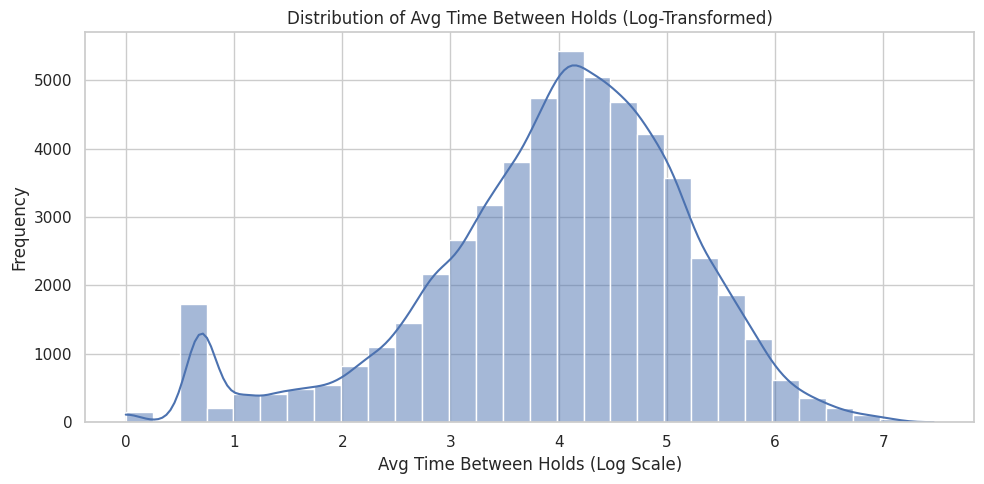

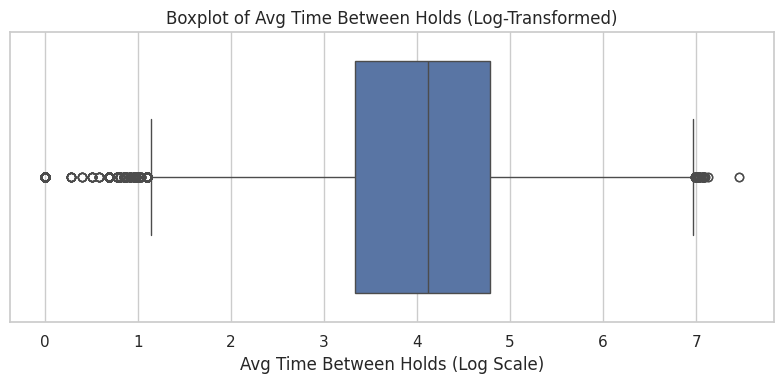

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Turn off warnings from seaborn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# -----------------------------
# HISTOGRAM OF LOG TRANSFORMED TBH
# -----------------------------
plt.figure(figsize=(10,5))
sns.histplot(ymca_cleaned['Avg_Time_Between_Holds_Log'], kde=True, bins=30)
plt.title("Distribution of Avg Time Between Holds (Log-Transformed)")
plt.xlabel("Avg Time Between Holds (Log Scale)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# -----------------------------
# BOXPLOT OF LOG TRANSFORMED TBH
# -----------------------------
plt.figure(figsize=(8,4))
sns.boxplot(x=ymca_cleaned['Avg_Time_Between_Holds_Log'])
plt.title("Boxplot of Avg Time Between Holds (Log-Transformed)")
plt.xlabel("Avg Time Between Holds (Log Scale)")
plt.tight_layout()
plt.show()



### Calculate Proxy Tenure

Since we do not have any information about member history from when they joined until their first hold in 2020, we computed a proxy tenure feature by subtracting the member’s Initial Join Date from their Hold Start Date.
Negative values were identified as data entry errors (e.g., hold dates recorded earlier than the join date), which are logically impossible.

Because Tenure emerged as a meaningful predictor in the model, we removed these invalid rows (71 records), ensuring cleaner feature inputs and more reliable model performance.

A log-transformed Tenure feature (Tenure_Log) was also created to address skewness.

In [ ]:
# Ensure datetime columns are already converted earlier
ymca_cleaned['Start Date'] = pd.to_datetime(ymca_cleaned['Start Date'], errors='coerce')
ymca_cleaned['Application: Contact: Initial Join Date'] = pd.to_datetime(
    ymca_cleaned['Application: Contact: Initial Join Date'], errors='coerce'
)

# Compute tenure in days
ymca_cleaned['Tenure'] = (
    ymca_cleaned['Start Date'] - ymca_cleaned['Application: Contact: Initial Join Date']
).dt.days

print("Proxy Tenure calculated. Example:")
display(ymca_cleaned[['Application: Contact: CaseSafeID','Start Date',
                      'Application: Contact: Initial Join Date','Tenure']].head())


Proxy Tenure calculated. Example:


Application: Contact: CaseSafeID Start Date  \
0               0035w000039TzTWAA0 2024-12-17   
1               0035w000039U8XqAAK 2025-06-13   
2               0035w000039UJ01AAG 2024-05-06   
3               0035w000039UR1rAAG 2021-08-31   
4               0035w00003TVcDoAAL 2024-07-02   

  Application: Contact: Initial Join Date  Tenure  
0                              2023-04-12   615.0  
1                              2002-04-18  8457.0  
2                              2022-03-24   774.0  
3                              2016-01-14  2056.0  
4                              2021-08-17  1050.0

In [ ]:
ymca_cleaned.shape

(61944, 32)

###Fix Any Negative Tenures (Data entry error)

In [ ]:
# Remove negative-tenure rows
invalid_tenure_mask = ymca_cleaned['Tenure'] < 0
num_invalid = invalid_tenure_mask.sum()

print(f"Rows with negative tenure identified: {num_invalid}")

# Drop them
ymca_cleaned = ymca_cleaned[~invalid_tenure_mask].reset_index(drop=True)

print(f"Rows remaining after dropping invalid tenure rows: {ymca_cleaned.shape[0]}")


Rows with negative tenure identified: 71
Rows remaining after dropping invalid tenure rows: 61873


###Log Transformation of Tenure

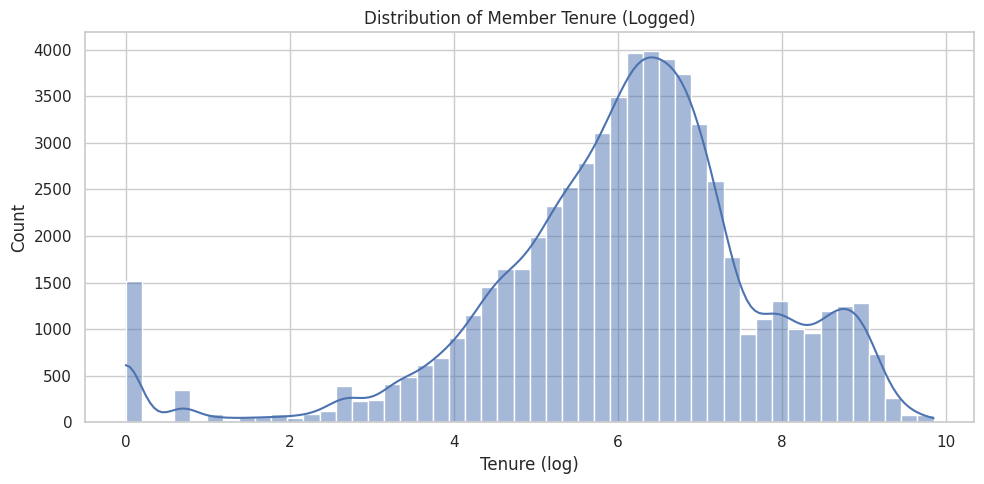

In [ ]:
ymca_cleaned['Tenure_Log'] = np.log1p(ymca_cleaned['Tenure'])

plt.figure(figsize=(10,5))
sns.histplot(ymca_cleaned['Tenure_Log'], bins=50, kde=True)
plt.title("Distribution of Member Tenure (Logged)")
plt.xlabel("Tenure (log)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



In [ ]:
ymca_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61873 entries, 0 to 61872
Data columns (total 33 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Membership Hold ID                              61873 non-null  object        
 1   Application: CaseSafeID                         61873 non-null  object        
 2   Membership Location                             61873 non-null  object        
 3   Application: Package: Category                  61873 non-null  object        
 4   Application: Subscription: Membership Type      61873 non-null  object        
 5   Application: Subscription: Membership Category  61873 non-null  object        
 6   Start Date                                      61873 non-null  datetime64[ns]
 7   End Date                                        61871 non-null  datetime64[ns]
 8   Application: Account: CaseSafeID              

In [ ]:
ymca_cleaned.dtypes

Membership Hold ID                                        object
Application: CaseSafeID                                   object
Membership Location                                       object
Application: Package: Category                            object
Application: Subscription: Membership Type                object
Application: Subscription: Membership Category            object
Start Date                                        datetime64[ns]
End Date                                          datetime64[ns]
Application: Account: CaseSafeID                          object
Application: Contact: CaseSafeID                          object
Application: Contact: Age Category                        object
Application: Contact: Birthdate                   datetime64[ns]
Application: Contact: Gender                              object
Application: Contact: Mailing Zip/Postal Code             object
Application: Contact: Initial Join Date           datetime64[ns]
Created By: User Type                                     object
Start Year                                                 Int64
End Year                                                   Int64
Initial Join Year                                          Int64
Birth Year                                                 Int64
Birth Decade                                               Int64
Age                                                        Int64
Hold Duration (days)                                       Int64
Hold Duration                                            float64
Avg_Hold_Duration                                        float64
Hold_Frequency                                             int64
Final_Hold_Reason                                       category
Time_Between_Holds                                       float64
Time_Between_Holds_Log                                   float64
Avg_Time_Between_Holds                                   float64
Avg_Time_Between_Holds_Log                               float64
Tenure                                                   float64
Tenure_Log                                               float64
dtype: object

In [ ]:
columns_to_convert = [
    'Application: Package: Category',
    'Membership Location',
    'Application: Subscription: Membership Type',
    'Application: Subscription: Membership Category',
    'Application: Contact: Mailing Zip/Postal Code'
]

for col in columns_to_convert:
    if col in ymca_cleaned.columns:
        ymca_cleaned[col] = ymca_cleaned[col].astype('category')
    else:
        print(f"Warning: Column '{col}' not found in ymca_model_ready.")

print("Data types after conversion:")
display(ymca_cleaned[columns_to_convert].dtypes)

Data types after conversion:


Application: Package: Category                    category
Membership Location                               category
Application: Subscription: Membership Type        category
Application: Subscription: Membership Category    category
Application: Contact: Mailing Zip/Postal Code     category
dtype: object

### Convert Columns to Category Dtype

We will convert 'User Type', 'Gender' to the 'category' dtype to optimize memory. Since 'Final Hold Reason' consolidates the information, we can safely drop the original 'Reason for Hold' and 'Grouped Hold Reason' columns.

In [ ]:
# Convert 'Created_By_User_Type' and 'Gender' to category dtype
ymca_cleaned['Created By: User Type'] = ymca_cleaned['Created By: User Type'].astype('category')


# A quick check
display(ymca_cleaned['Created By: User Type'].dtypes)


CategoricalDtype(categories=['High Volume Portal', 'Standard'], ordered=False, categories_dtype=object)

# Summary statistics for numerical columns

In [ ]:
print("\n=== Summary Statistics (Numerical) ===")
print(ymca_cleaned.describe())


=== Summary Statistics (Numerical) ===
                          Start Date                       End Date  \
count                          61873                          61871   
mean   2024-05-15 15:25:11.437945600  2024-08-01 21:13:08.821903360   
min              2020-08-12 00:00:00            2020-09-07 00:00:00   
25%              2023-09-22 00:00:00            2023-12-09 00:00:00   
50%              2024-06-29 00:00:00            2024-09-11 00:00:00   
75%              2025-03-01 00:00:00            2025-05-16 00:00:00   
max              2026-11-15 00:00:00            2030-01-01 00:00:00   
std                              NaN                            NaN   

      Application: Contact: Birthdate Application: Contact: Initial Join Date  \
count                           61873                                   61865   
mean    1990-10-23 04:59:16.420409600           2020-11-21 02:00:16.177160192   
min               1930-02-23 00:00:00                     1969-05-10 00:00:00

#YMCA Member Summary Table

In [ ]:
# YMCA Member Summary Table

# Summarizing key metrics per unique member
member_summary = ymca_cleaned.groupby('Application: Contact: CaseSafeID').agg({
    'Age': 'mean',                               # Average age
    'Hold Duration (days)': 'mean',              # Average hold duration
    'Avg_Time_Between_Holds': 'mean',            # Average time between holds
    'Avg_Time_Between_Holds_Log': 'mean',        # Log-transformed TBH
    'Tenure': 'mean',                     # Average tenure
    'Hold_Frequency': 'max'                      # Hold frequency (already computed)
}).reset_index()

# Renaming columns for readability
member_summary.rename(columns={
    'Age': 'Average_Age',
    'Hold Duration (days)': 'Avg_Hold_Duration',
    'Avg_Time_Between_Holds': 'Avg_Time_Between_Holds',
    'Avg_Time_Between_Holds_Log': 'Avg_Time_Between_Holds_Log',
    'Tenure': 'Avg_Tenure',
    'Hold_Frequency': 'Hold_Frequency'
}, inplace=True)

print("\n=== YMCA Member Summary Table (Updated) ===")
display(member_summary.head(10))



=== YMCA Member Summary Table (Updated) ===


Application: Contact: CaseSafeID  Average_Age  Avg_Hold_Duration  \
0               0035w000039TzTWAA0         11.0              181.0   
1               0035w000039TzUNAA0         32.0               21.8   
2               0035w000039TzUTAA0       75.875              22.75   
3               0035w000039TzV3AAK         25.2               26.8   
4               0035w000039TzV8AAK         26.0               28.0   
5               0035w000039TzVwAAK         82.0              186.0   
6               0035w000039TzW8AAK    49.333333               87.5   
7               0035w000039TzWDAA0         19.4               95.0   
8               0035w000039TzWEAA0         14.2               89.0   
9               0035w000039TzWiAAK          7.0                1.0   

   Avg_Time_Between_Holds  Avg_Time_Between_Holds_Log  Avg_Tenure  \
0                     NaN                         NaN     615.000   
1              168.000000                    5.129899     632.000   
2               94.571429                    4.559874    1798.375   
3              162.250000                    5.095283     724.400   
4                     NaN                         NaN     376.000   
5                1.000000                    0.693147    3361.000   
6               56.250000                    4.047428    4601.500   
7               23.250000                    3.188417    4631.200   
8               29.750000                    3.425890    4651.000   
9                     NaN                         NaN     832.000   

   Hold_Frequency  
0               1  
1               5  
2               8  
3               5  
4               1  
5               2  
6               6  
7               5  
8               5  
9               1

#Analysing Missing Values in Postal code in preparation for Geospatial Analysis

In [ ]:
ymca_cleaned['Application: Contact: Mailing Zip/Postal Code'].unique()

['T6V 1R7', 'T5T 6H3', 'T5E 5Y8', 'T5C 2P6', 'T6J 4K2', ..., 'T5X 6H9', 'T5W 4S9', 'T5T 2A6', 'T5T 2B4', 'T5R5J2']
Length: 7695
Categories (7694, object): ['.', '10003', '21207', '3084', ..., 't7x3y3', 't7y 1e4', 't9k 1G4',
                            'v8n 294']

In [ ]:
import pandas as pd
import re

# Use ymca_cleaned directly or ensure df is a proper copy with latest column names
df = ymca_cleaned.copy()

# Convert to string, clean spaces, and uppercase
df['Postal_Code'] = df['Application: Contact: Mailing Zip/Postal Code'].astype(str).str.strip().str.upper()

# Extract first 3 characters (the FSA)
df['FSA'] = df['Postal_Code'].str.replace(" ", "").str[:3]

# Define FSA validation pattern: Letter-Digit-Letter (e.g., T5A, M1C)
fsa_pattern = r'^[ABCEGHJKLMNPRSTVXY]\d[ABCEGHJKLMNPRSTVWXYZ]$'

# Check if FSA is valid
df['Valid_FSA'] = df['FSA'].str.match(fsa_pattern, na=False)

# Count valid vs invalid FSAs
print("FSA Validity Summary:")
print(df['Valid_FSA'].value_counts())

# Show examples of invalid FSAs
invalid_fsas = df.loc[~df['Valid_FSA'], 'FSA'].unique()
print("\nExamples of invalid FSAs:")
print(invalid_fsas[:10])

FSA Validity Summary:
Valid_FSA
True     60498
False     1375
Name: count, dtype: int64

Examples of invalid FSAs:
['NAN' '.' 'T63' '920' 'ABT' '212' '100' '308']


#

# Measure of central tendency and spread

In [ ]:
from scipy import stats
# Summarizing key metrics per member to create member_summary DataFrame
# This code is included here to ensure member_summary is defined before use
member_summary = ymca_cleaned.groupby('Application: Contact: CaseSafeID').agg({
    'Age': 'mean',                          # Average age across all holds
    'Hold Duration (days)': 'mean',         # Average hold duration
    'Time_Between_Holds': 'mean',           # Average time between holds
    'Tenure': 'mean',                # Average tenure before hold
    'Start Date': 'count'                   # Hold frequency (number of holds) - Use 'Start Date' to count
}).reset_index()

# Renaming columns for clarity
member_summary.rename(columns={
    'Age': 'Average_Age',
    'Hold Duration (days)': 'Avg_Hold_Duration',
    'Time_Between_Holds': 'Avg_Time_Between_Holds',
    'Tenure': 'Avg_Tenure',
    'Start Date': 'Hold_Frequency' # Rename 'Start Date' to 'Hold_Frequency' after counting
}, inplace=True)


# List of numerical columns to summarize from the member_summary DataFrame
numerical_cols = [
    'Average_Age',
    'Avg_Hold_Duration',
    'Hold_Frequency',
    'Avg_Time_Between_Holds',
    'Avg_Tenure'
]

for col in numerical_cols:
    # Use the member_summary DataFrame and drop missing values for calculations
    data = member_summary[col].dropna()

    mean_val = data.mean()
    median_val = data.median()

    # Mode can return multiple values; pick the first
    mode_val = data.mode().iloc[0] if not data.mode().empty else pd.NA

    min_val = data.min()
    max_val = data.max()
    std_val = data.std()

    print(f"\n=== Detailed stats for {col} ===")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Minimum: {min_val}")
    print(f"Maximum: {max_val}")
    print(f"Standard Deviation: {std_val}")


=== Detailed stats for Average_Age ===
Mean: 30.07346044773117
Median: 23.0
Mode: 7.0
Minimum: 0.0
Maximum: 94.0
Standard Deviation: 23.93878940746506

=== Detailed stats for Avg_Hold_Duration ===
Mean: 90.01505336770266
Median: 76.0
Mode: 183.0
Minimum: 0.0
Maximum: 2131.0
Standard Deviation: 69.83025322092394

=== Detailed stats for Hold_Frequency ===
Mean: 2.8899112564222325
Median: 2.0
Mode: 1
Minimum: 1
Maximum: 62
Standard Deviation: 2.6783221151823144

=== Detailed stats for Avg_Time_Between_Holds ===
Mean: 112.20616870763425
Median: 65.6
Mode: 1.0
Minimum: 0.0
Maximum: 1743.0
Standard Deviation: 140.14945863704133

=== Detailed stats for Avg_Tenure ===
Mean: 1014.495527497547
Median: 369.6666666666667
Mode: 0.0
Minimum: 0.0
Maximum: 18819.0
Standard Deviation: 1851.534280743869


#Numerical columns for visualization

###Boxplot For Outlier Detection

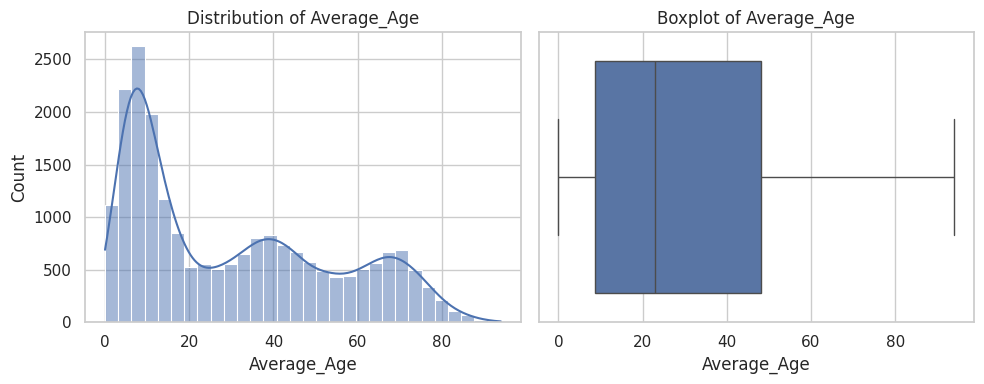

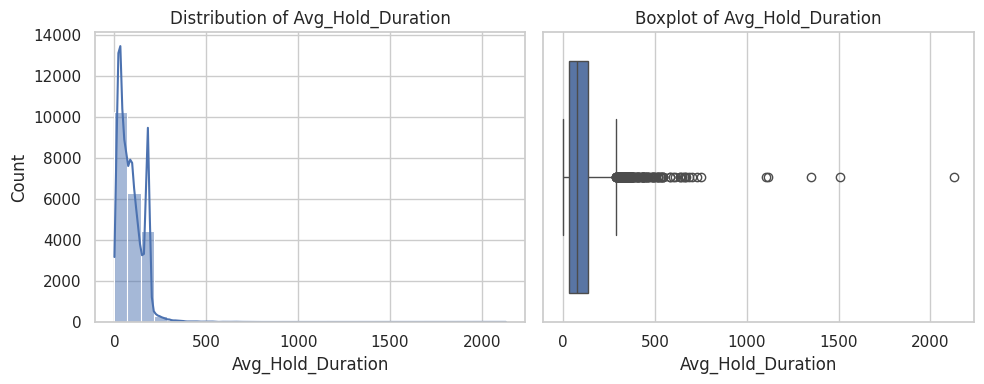

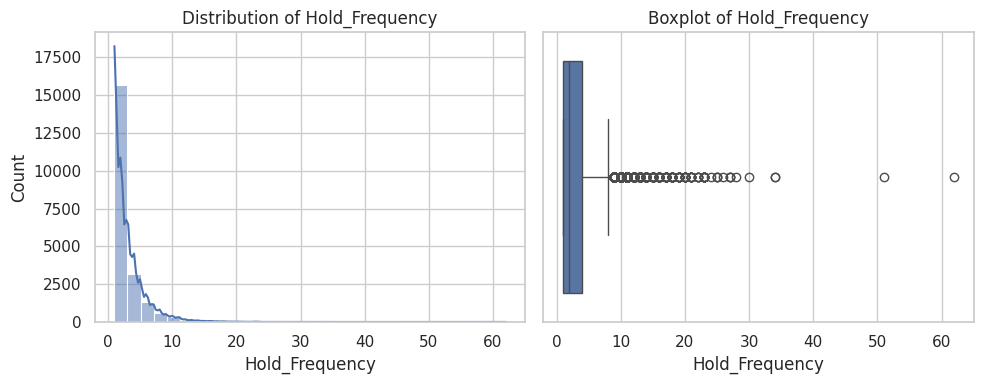

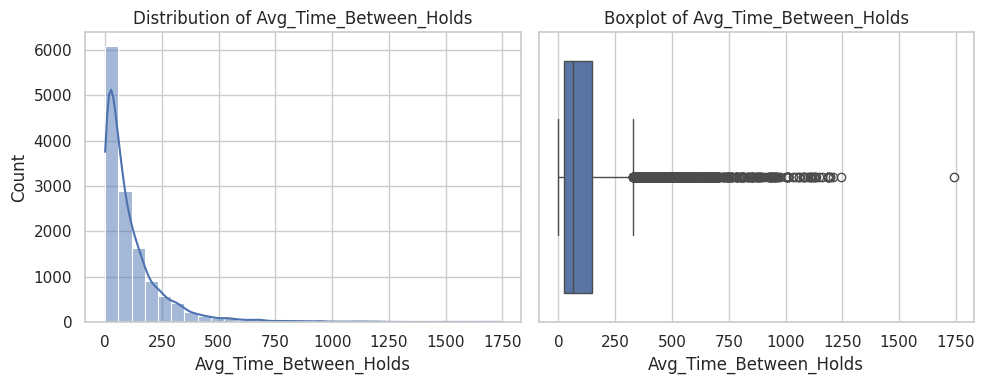

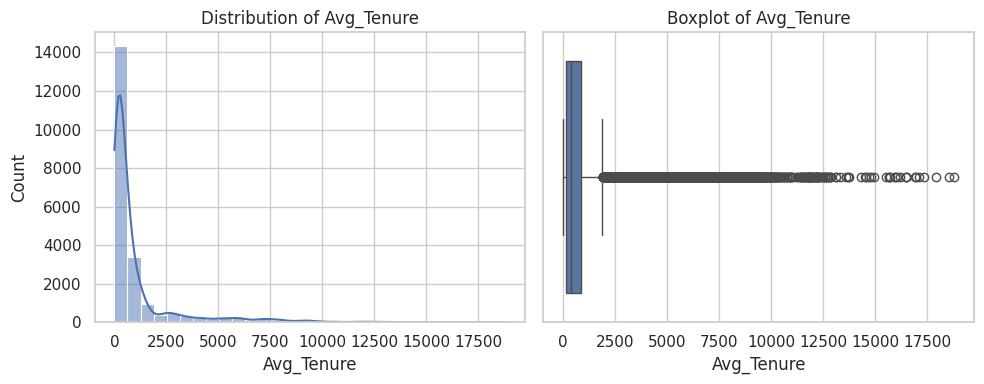

In [ ]:
# Summarizing key metrics per member to create member_summary DataFrame

member_summary = ymca_cleaned.groupby('Application: Contact: CaseSafeID').agg({
    'Age': 'mean',                          # Average age across all holds
    'Hold Duration (days)': 'mean',         # Average hold duration
    'Time_Between_Holds': 'mean',           # Average time between holds
    'Tenure': 'mean',                # Average tenure before hold
    'Start Date': 'count'                   # Hold frequency (number of holds) - Use 'Start Date' to count
}).reset_index()

# Renaming columns for clarity
member_summary.rename(columns={
    'Age': 'Average_Age',
    'Hold Duration (days)': 'Avg_Hold_Duration',
    'Time_Between_Holds': 'Avg_Time_Between_Holds',
    'Tenure': 'Avg_Tenure',
    'Start Date': 'Hold_Frequency' # Rename 'Start Date' to 'Hold_Frequency' after counting
}, inplace=True)

numerical_cols = [
    'Average_Age',
    'Avg_Hold_Duration',
    'Hold_Frequency',
    'Avg_Time_Between_Holds',
    'Avg_Tenure'
]


for col in numerical_cols:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(member_summary[col].dropna(), kde=True, bins=30) # Use member_summary and dropna for plotting
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=member_summary[col].dropna()) # Use member_summary and dropna for plotting
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

###These visuals together reveal:

Age diversity (children dominate, but adults and seniors are present).
Hold behavior skewed: most members have short holds and few holds, but some have very long or frequent holds.
Tenure varies widely, with some long-term loyal members.

## Summary of Key Metric Visualizations

### 1. Average_Age
- **Histogram:** Shows the distribution of members’ average age across all holds. Most members are very young (0–20 years), with smaller peaks around 40 and 60 years, indicating a mix of children, adults, and seniors.
- **Boxplot:** Median age is around 30–35 years. The range spans from infants to seniors (~90 years). No extreme outliers beyond expected age limits.

### 2. Avg_Hold_Duration
- **Histogram:** Most average hold durations are short (under 300 days), but a few extend beyond 1,000 days.
- **Boxplot:** Heavy skew with many outliers. Median is low, but some members keep memberships on hold for years (up to ~2,000 days).

### 3. Hold_Frequency
- **Histogram:** Most members have 1–3 holds, but a few have 20+ holds.
- **Boxplot:** Median is very low (likely 1). Extreme outliers show members with 50+ holds, indicating repeated hold behavior.

### 4. Avg_Time_Between_Holds
- **Histogram:** Most gaps between holds are near zero or slightly positive, meaning frequent holds. Negative values indicate data inconsistencies (next hold starts before previous ends).
- **Boxplot:** Median is close to zero, confirming frequent holds for many members. Outliers show very large gaps (up to 1,500 days).

### 5. Avg_Tenure
- **Histogram:** Most members have short tenure before their first hold (under 2,000 days), but some exceed 10,000 days (~27 years).
- **Boxplot:** Extreme outliers show very long-tenured members. Median is relatively low, suggesting many members go on hold early in their membership.



**Key Insights:**
- Age distribution confirms a mix of children and adults, with children dominating.
- Hold behavior is highly skewed: most members have short holds and few holds, but some have very long or frequent holds.
- Tenure varies widely, with some long-term loyal members and many who go on hold early.

#Relationship between Final Hold Reason and Location

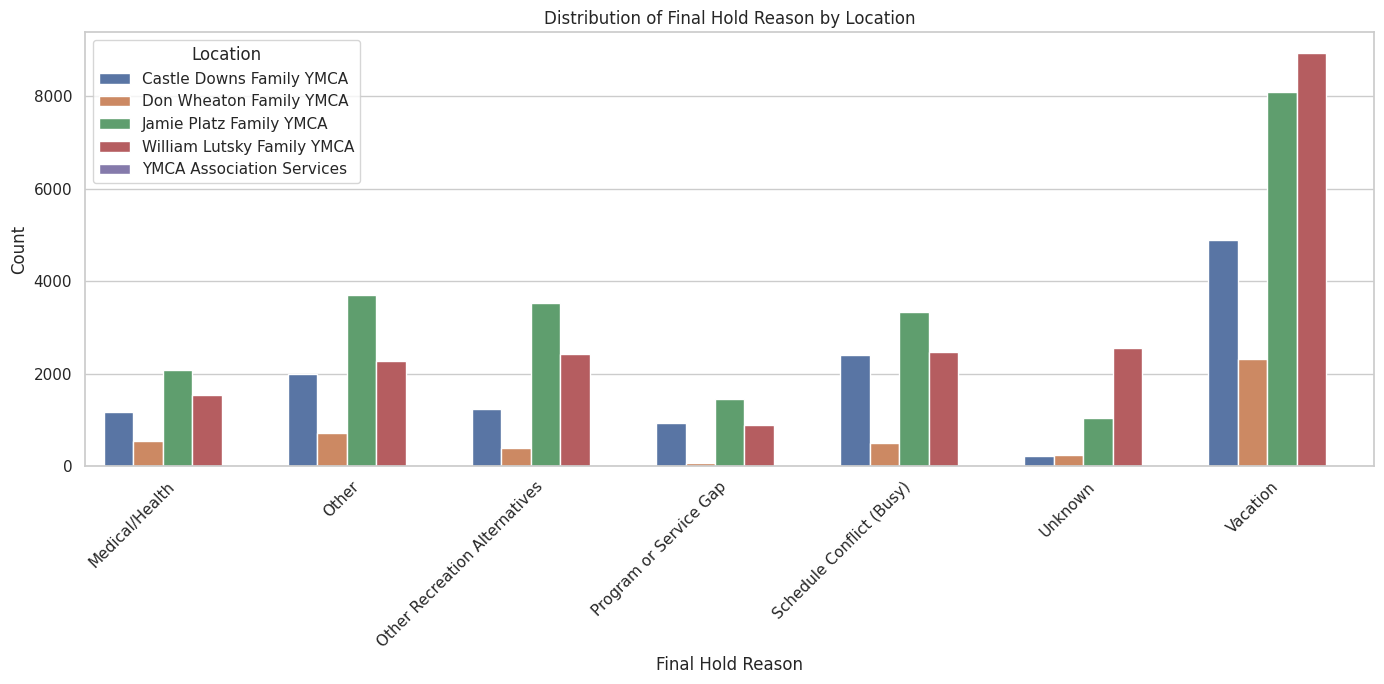

In [ ]:
# Rename 'Membership Location' for simplicity
if 'Membership Location' in ymca_cleaned.columns:
    ymca_cleaned.rename(columns={'Membership Location': 'Location'}, inplace=True)

# Ensure categorical types for plotting
ymca_cleaned['Location'] = ymca_cleaned['Location'].astype('category')
ymca_cleaned['Final_Hold_Reason'] = ymca_cleaned['Final_Hold_Reason'].astype(str).astype('category')

# Plot the distribution
plt.figure(figsize=(14, 7))
sns.countplot(data=ymca_cleaned, x='Final_Hold_Reason', hue='Location')
plt.title('Distribution of Final Hold Reason by Location')
plt.xlabel('Final Hold Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

### Analysis: Relationship between Final Hold Reason and Age Group

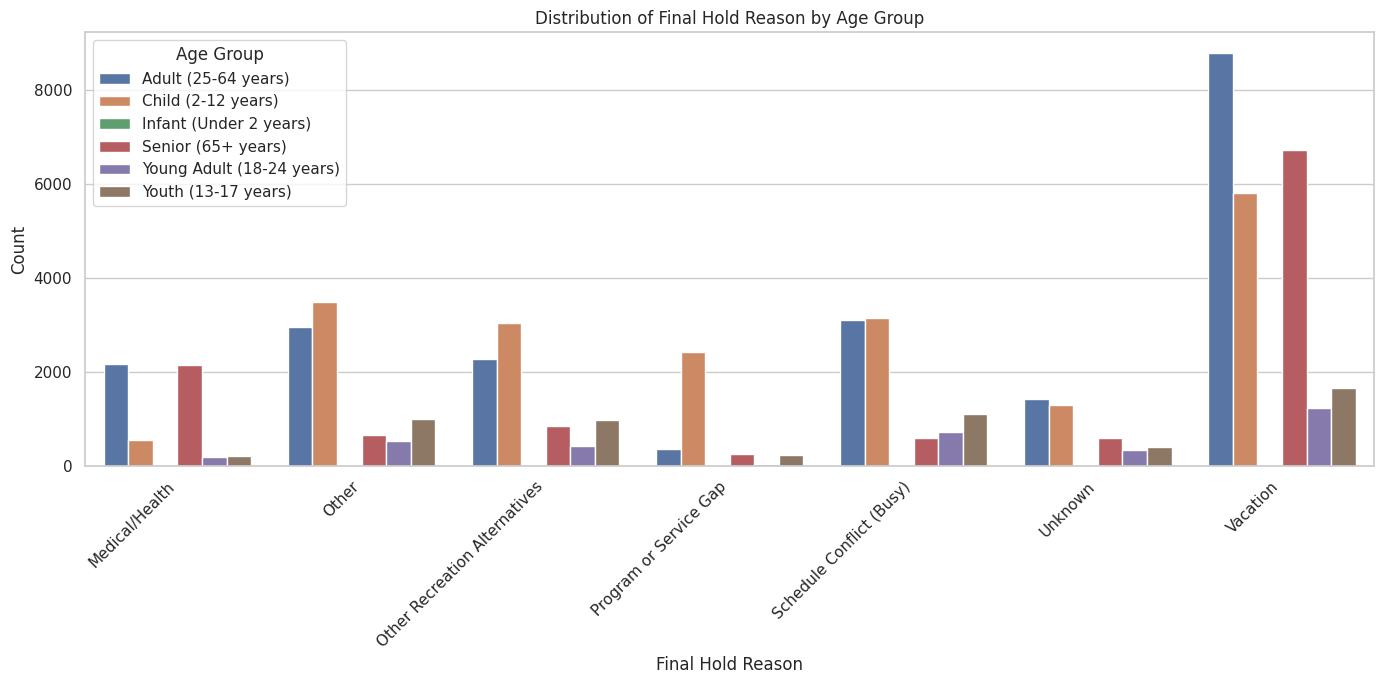

In [ ]:
import matplotlib.pyplot as plt
# Explicitly rename columns to ensure they are available with correct names
if 'Application: Contact: Age Category' in ymca_cleaned.columns:
    ymca_cleaned.rename(columns={'Application: Contact: Age Category': 'Age_Group'}, inplace=True)
if 'Final Hold Reason' in ymca_cleaned.columns:
    ymca_cleaned.rename(columns={'Final Hold Reason': 'Final_Hold_Reason'}, inplace=True)


# Ensure 'Age_Group' is treated as a categorical type for plotting
if 'Age_Group' in ymca_cleaned.columns and 'Final_Hold_Reason' in ymca_cleaned.columns:
    ymca_cleaned['Age_Group'] = ymca_cleaned['Age_Group'].astype('category')
    # Ensure 'Final_Hold_Reason' is also categorical for plotting
    # Handle potential NaN values before converting to category
    ymca_cleaned['Final_Hold_Reason'] = ymca_cleaned['Final_Hold_Reason'].astype(str).astype('category')


    plt.figure(figsize=(14, 7))
    sns.countplot(data=ymca_cleaned, x='Final_Hold_Reason', hue='Age_Group')
    plt.title('Distribution of Final Hold Reason by Age Group')
    plt.xlabel('Final Hold Reason')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Age Group')
    plt.tight_layout()
    plt.show()
else:
    print("Error: Required columns ('Age_Group' or 'Final_Hold_Reason') are not available in the DataFrame.")

### Vacation Distribution of Holds Over Time

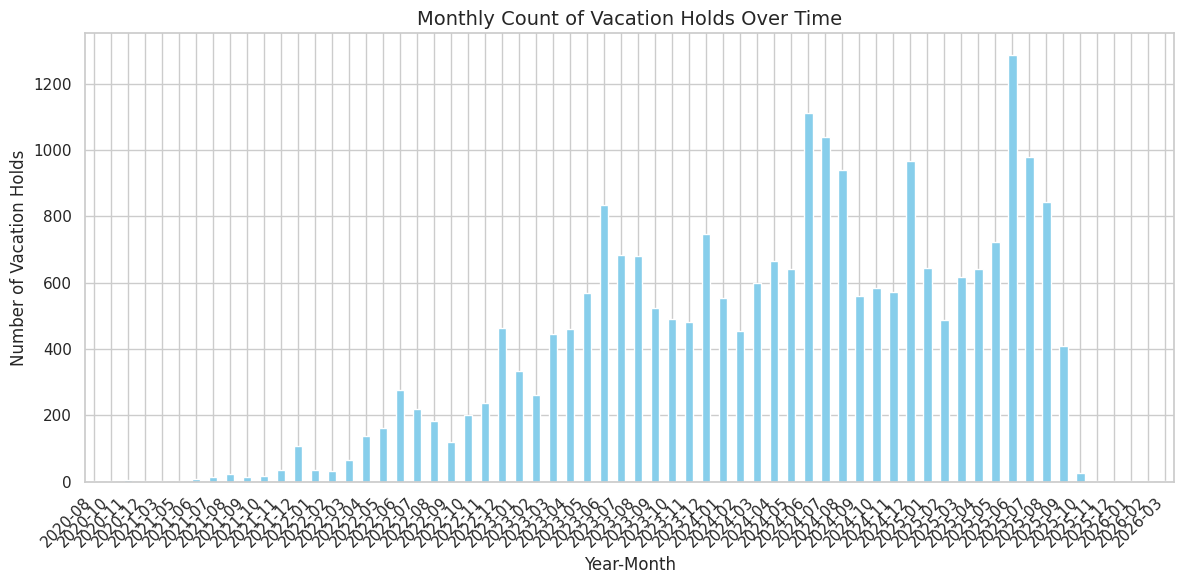

In [ ]:
# Filter for 'Vacation' holds
vacation_holds = ymca_cleaned[ymca_cleaned['Final_Hold_Reason'] == 'Vacation'].copy()

# Ensure 'Start Date' exists and rename to 'Hold_Start_Date'
vacation_holds.rename(columns={'Start Date': 'Hold_Start_Date'}, inplace=True)

# Extract Year-Month for grouping
vacation_holds['Year_Month'] = vacation_holds['Hold_Start_Date'].dt.to_period('M')

# Count holds per month
vacation_counts = vacation_holds.groupby('Year_Month').size()

# Plot the time series
plt.figure(figsize=(12, 6))
vacation_counts.plot(kind='bar', color='skyblue')
plt.title('Monthly Count of Vacation Holds Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Vacation Holds', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Find the month(s) with the highest number of vacation holds
peak_vacation_months = vacation_counts[vacation_counts == vacation_counts.max()]

print("Peak Vacation Month(s):")
display(peak_vacation_months)

Peak Vacation Month(s):


Year_Month
2025-06    1288
Freq: M, dtype: int64

#Outlier Handling

##Age Outlier Handling and Visualization
Plots histogram and boxplot before capping.
Caps ages below 0 to 0 and above 90 to 90.
Plots updated histogram and boxplot after capping.

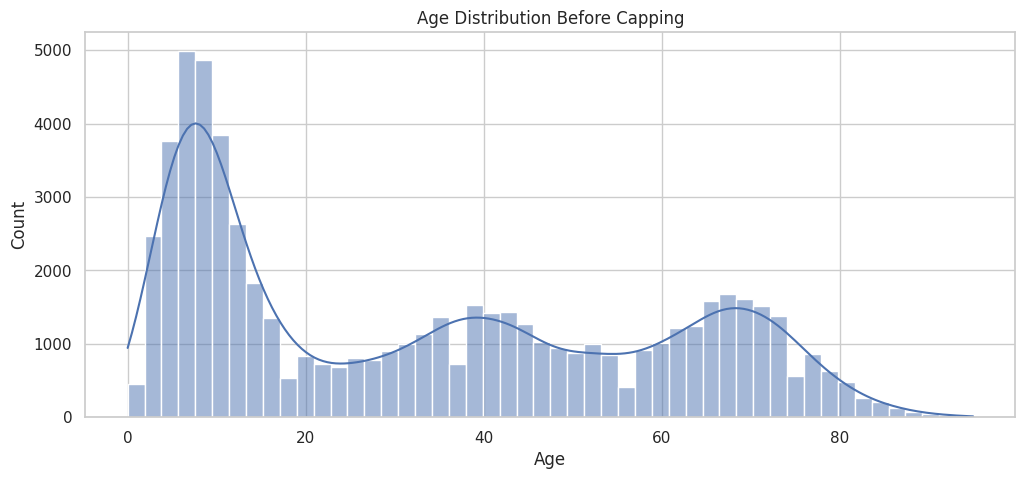

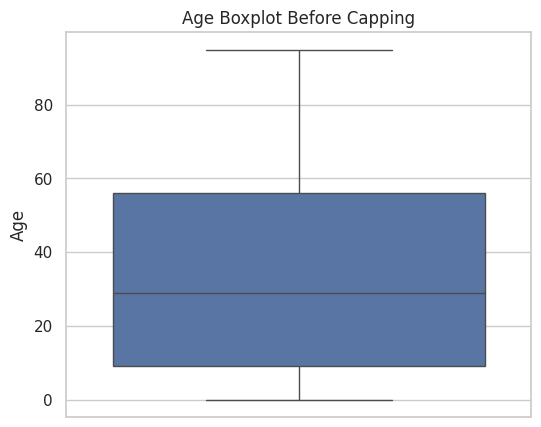

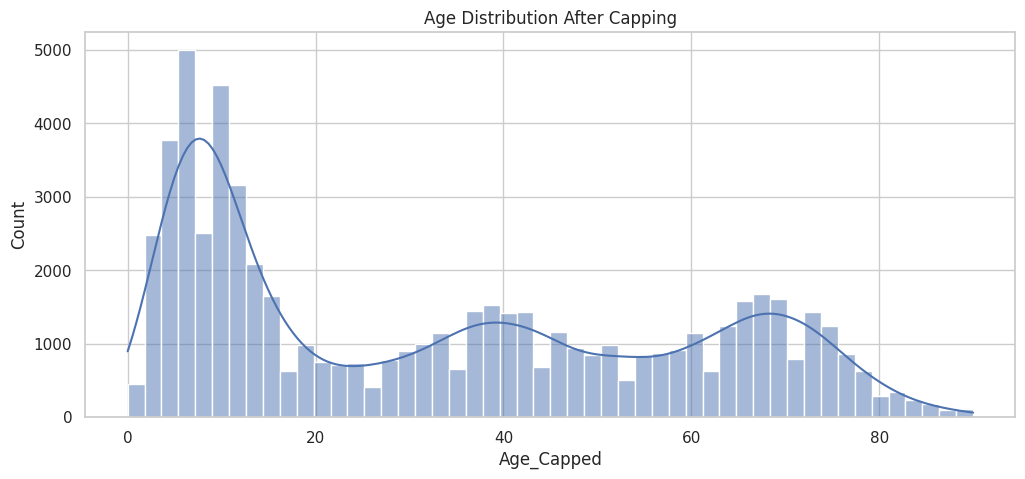

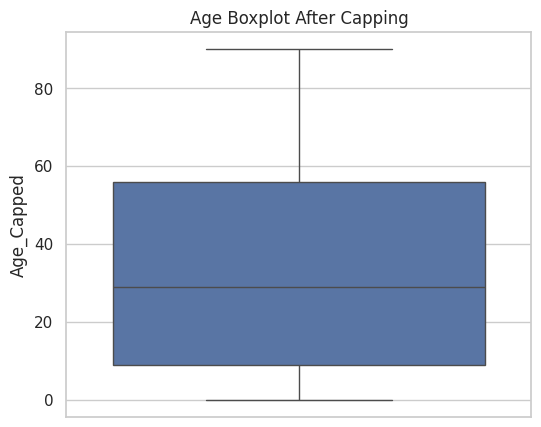

In [ ]:
# Step 1: Check initial distribution
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Age'].dropna(), bins=50, kde=True)
plt.title('Age Distribution Before Capping')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Age'].dropna())
plt.title('Age Boxplot Before Capping')
plt.show()

# Step 2: Handle outliers by capping
ymca_cleaned['Age_Capped'] = ymca_cleaned['Age'].clip(lower=0, upper=90)

# Step 3: Visualize after capping
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Age_Capped'].dropna(), bins=50, kde=True)
plt.title('Age Distribution After Capping')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Age_Capped'].dropna())
plt.title('Age Boxplot After Capping')
plt.show()

In [ ]:
ymca_cleaned['Age'].isnull().sum()

np.int64(0)

##Handling outlier in Hold_Duration
Log Transformation: Reduces skew and makes extreme values less influential.
Winsorization: Caps extreme outliers without removing data points, preserving dataset size.

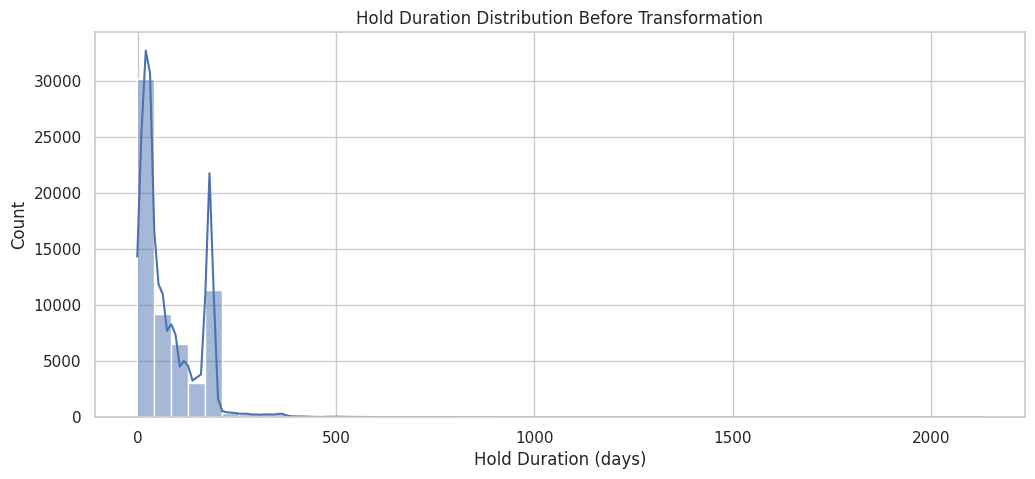

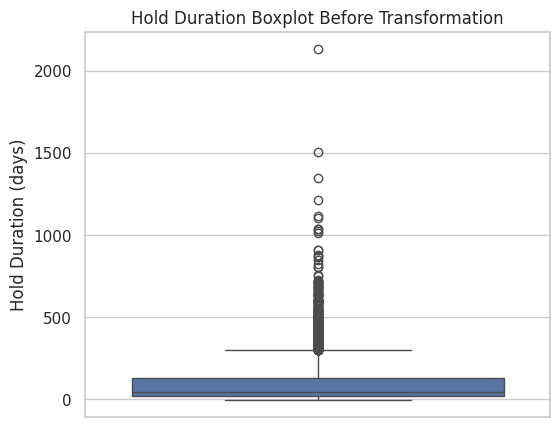

/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:672: RuntimeWarning:

divide by zero encountered in log1p



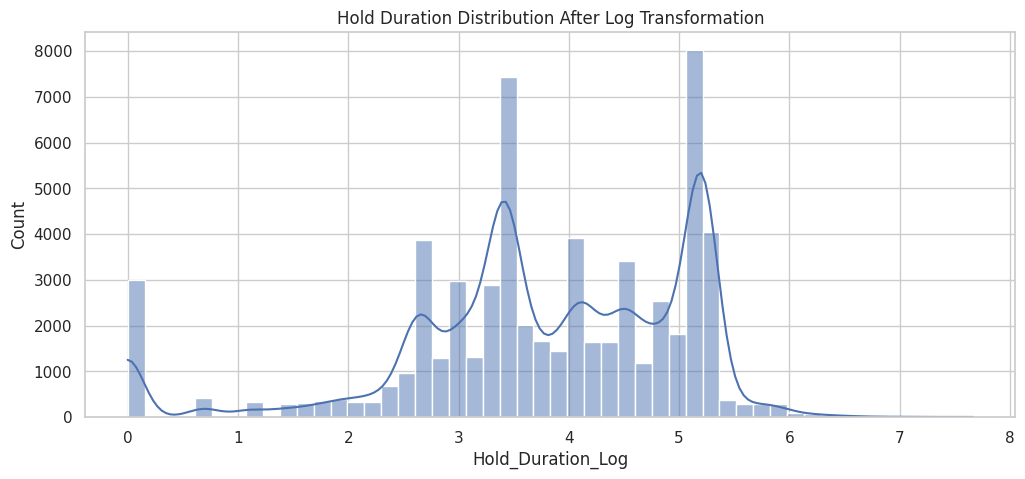

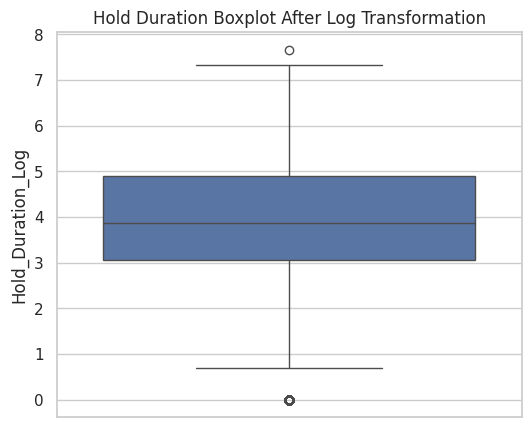

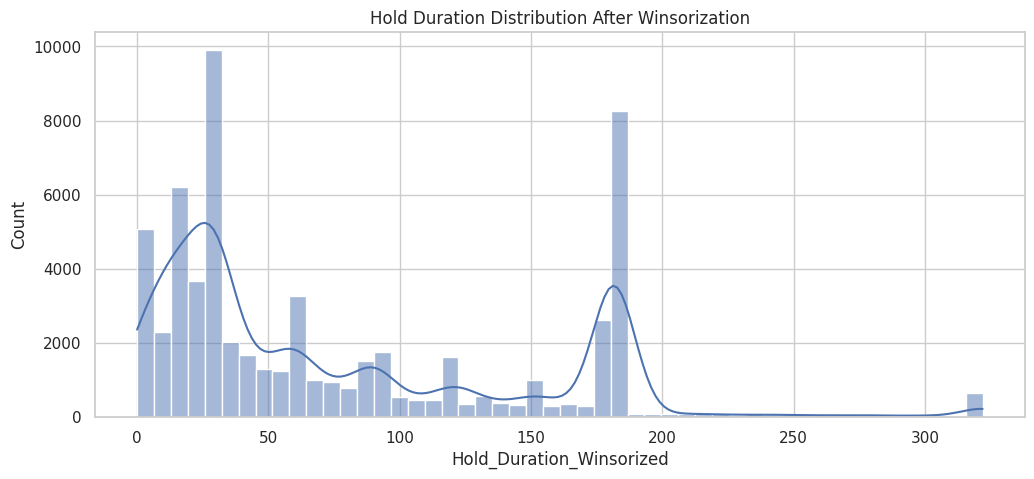

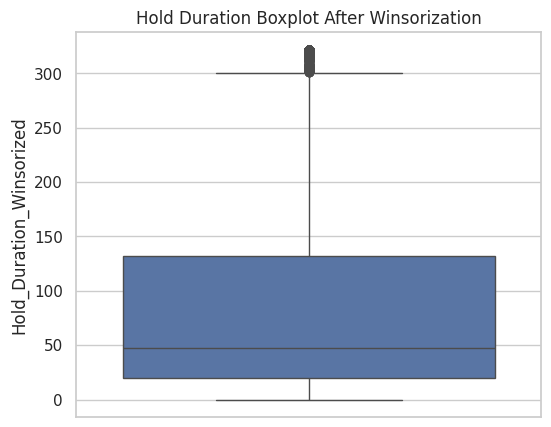

In [ ]:
# Import libraries
from scipy.stats.mstats import winsorize

# Step 1: Check initial distribution
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Hold Duration (days)'].dropna(), bins=50, kde=True)
plt.title('Hold Duration Distribution Before Transformation')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Hold Duration (days)'].dropna())
plt.title('Hold Duration Boxplot Before Transformation')
plt.show()

# Step 2: Handle outliers
# Option A: Log Transformation (for skewed data)
ymca_cleaned['Hold_Duration_Log'] = np.log1p(ymca_cleaned['Hold Duration (days)'])  # log(1+x) handles zeros safely

# Option B: Winsorization (cap extreme values)
# Convert to NumPy array with float dtype, dropping NaNs
hold_duration_array = ymca_cleaned['Hold Duration (days)'].dropna().to_numpy(dtype=float)

# Winsorize top and bottom 1% (adjust limits as needed)
hold_duration_winsorized = winsorize(hold_duration_array, limits=[0.01, 0.01])

# Create a new column and fill it, leaving NaNs where they were originally
ymca_cleaned['Hold_Duration_Winsorized'] = pd.Series(hold_duration_winsorized, index=ymca_cleaned['Hold Duration (days)'].dropna().index)


# Step 3: Visualize after transformations
# Log transformed
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Hold_Duration_Log'].dropna(), bins=50, kde=True)
plt.title('Hold Duration Distribution After Log Transformation')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Hold_Duration_Log'].dropna())
plt.title('Hold Duration Boxplot After Log Transformation')
plt.show()

# Winsorized
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Hold_Duration_Winsorized'].dropna(), bins=50, kde=True)
plt.title('Hold Duration Distribution After Winsorization')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Hold_Duration_Winsorized'].dropna())
plt.title('Hold Duration Boxplot After Winsorization')
plt.show()

##Visualization + Outlier Handling for Avg_Hold_Duration

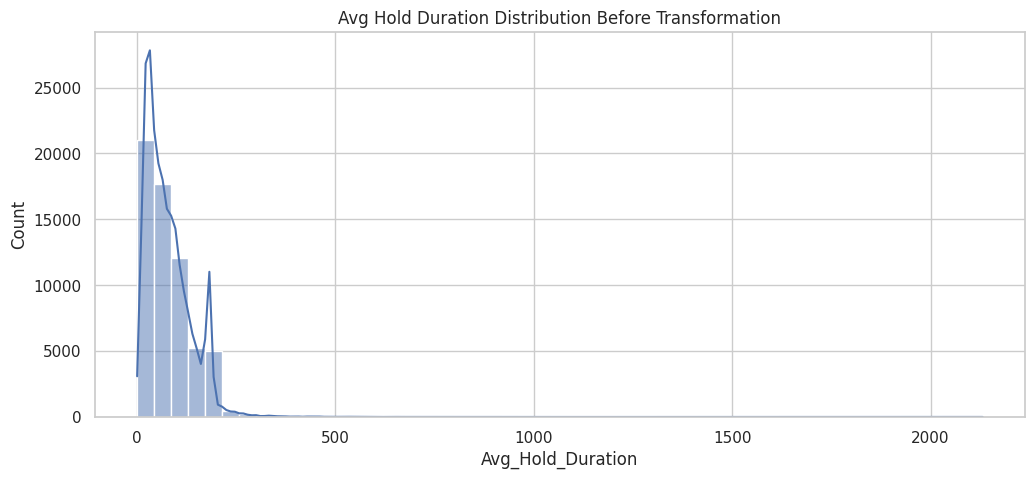

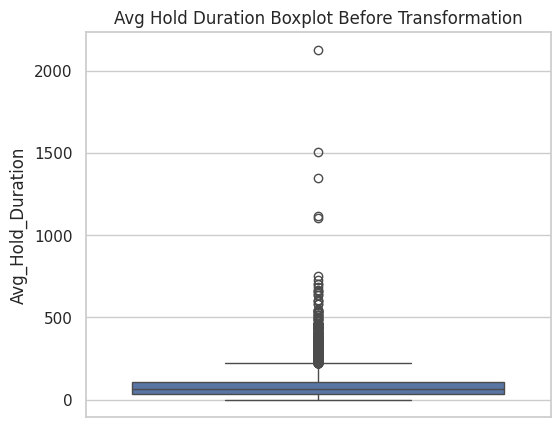

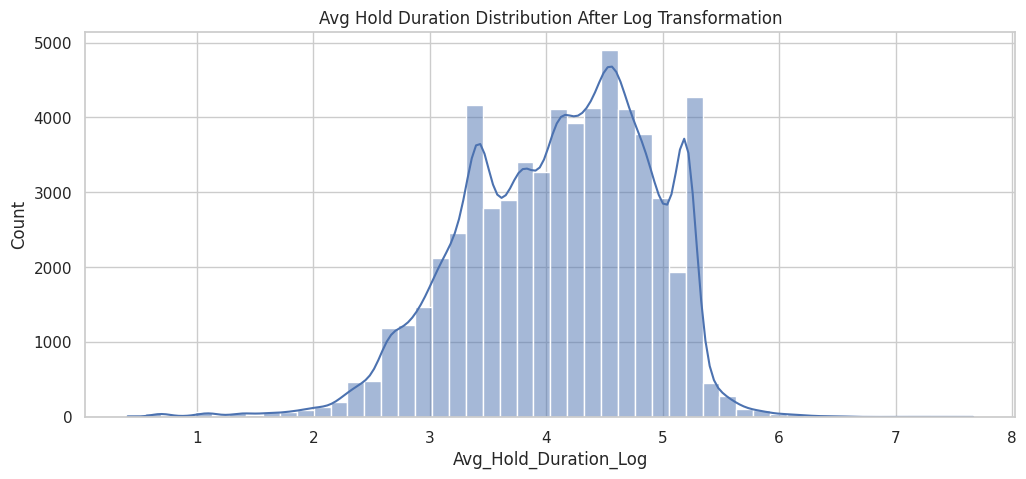

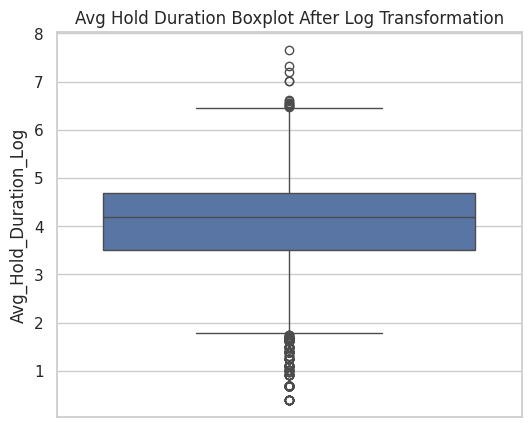

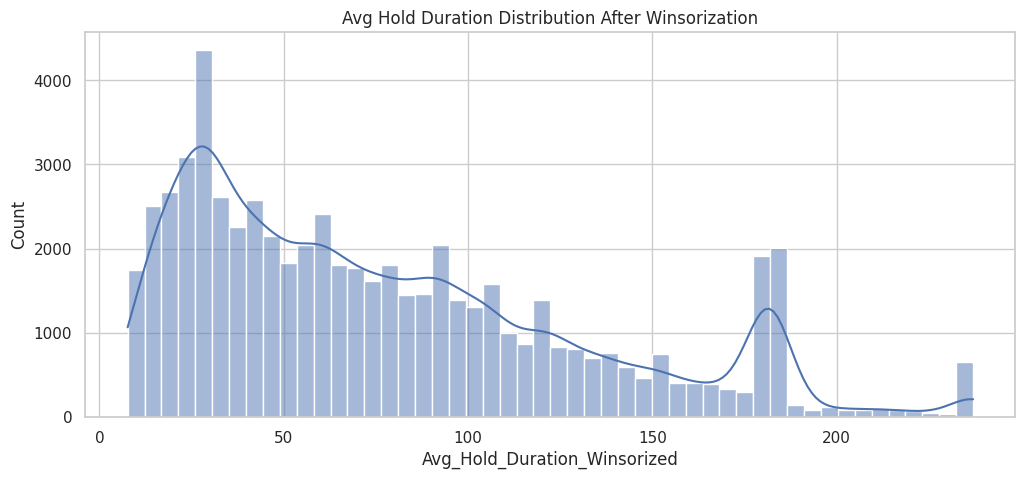

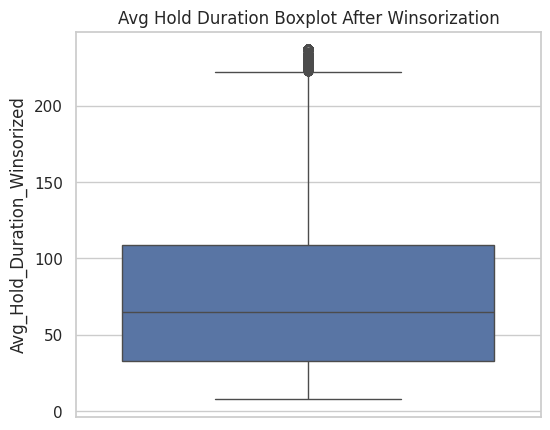

In [ ]:
# ------------------------------------------------------------
#  VISUALIZING & HANDLING OUTLIERS IN Avg_Hold_Duration
# ------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# -------------------------------
# Step 1: Check initial distribution
# -------------------------------

plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Avg_Hold_Duration'].dropna(), bins=50, kde=True)
plt.title('Avg Hold Duration Distribution Before Transformation')
plt.xlabel('Avg_Hold_Duration')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Avg_Hold_Duration'].dropna())
plt.title('Avg Hold Duration Boxplot Before Transformation')
plt.show()


# -------------------------------
# Step 2: Handle Outliers
# -------------------------------

# Option A — Log Transformation
ymca_cleaned['Avg_Hold_Duration_Log'] = np.log1p(ymca_cleaned['Avg_Hold_Duration'])

# Option B — Winsorization
avg_hold_array = ymca_cleaned['Avg_Hold_Duration'].dropna().to_numpy(dtype=float)

# Winsorize top and bottom 1%
avg_hold_winsorized = winsorize(avg_hold_array, limits=[0.01, 0.01])

ymca_cleaned['Avg_Hold_Duration_Winsorized'] = pd.Series(
    avg_hold_winsorized,
    index=ymca_cleaned['Avg_Hold_Duration'].dropna().index
)


# -------------------------------
# Step 3: Visualize After Transformations
# -------------------------------

# Log transformed
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Avg_Hold_Duration_Log'].dropna(), bins=50, kde=True)
plt.title('Avg Hold Duration Distribution After Log Transformation')
plt.xlabel('Avg_Hold_Duration_Log')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Avg_Hold_Duration_Log'].dropna())
plt.title('Avg Hold Duration Boxplot After Log Transformation')
plt.show()


# Winsorized
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Avg_Hold_Duration_Winsorized'].dropna(), bins=50, kde=True)
plt.title('Avg Hold Duration Distribution After Winsorization')
plt.xlabel('Avg_Hold_Duration_Winsorized')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Avg_Hold_Duration_Winsorized'].dropna())
plt.title('Avg Hold Duration Boxplot After Winsorization')
plt.show()


##Hold_Frequency Outlier Handling and Visualization

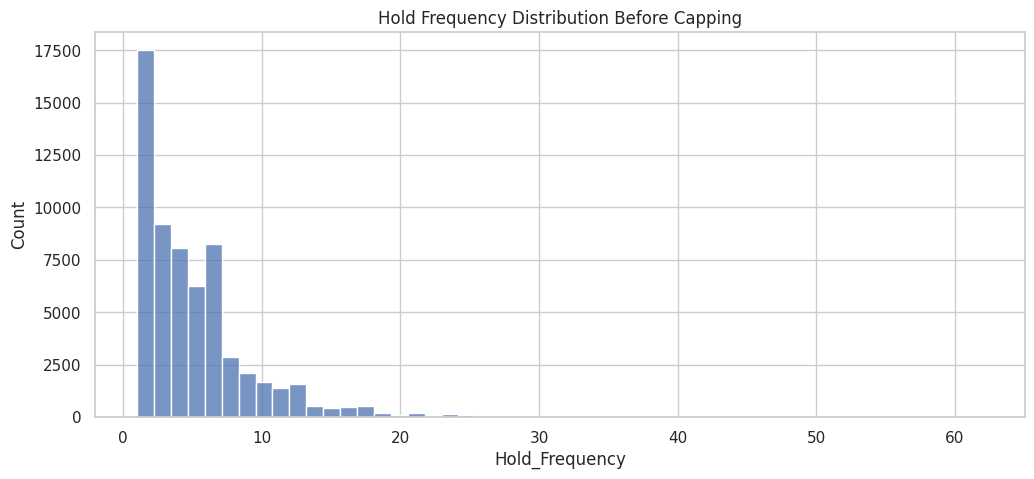

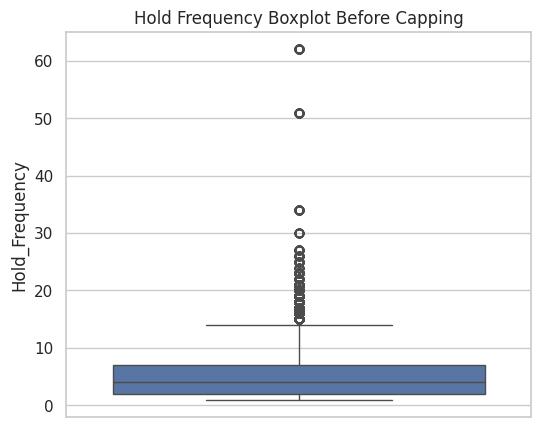

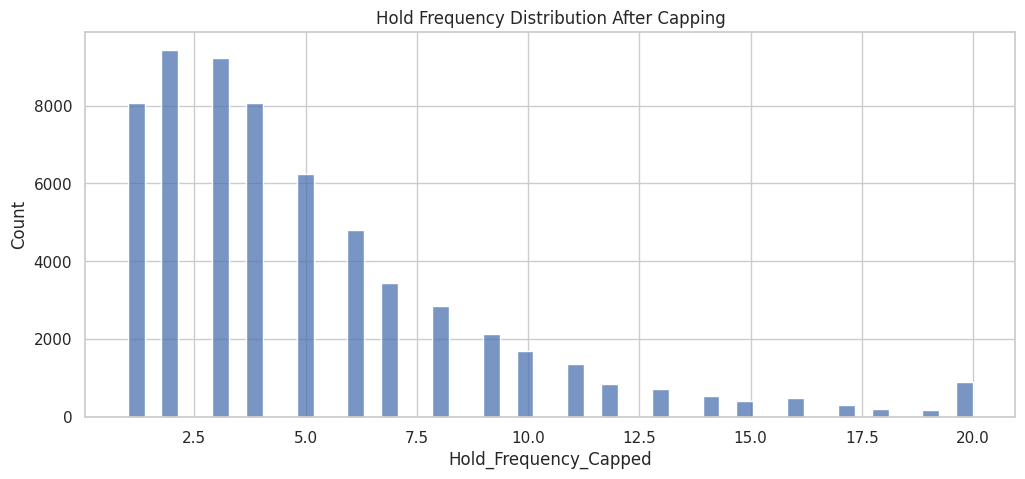

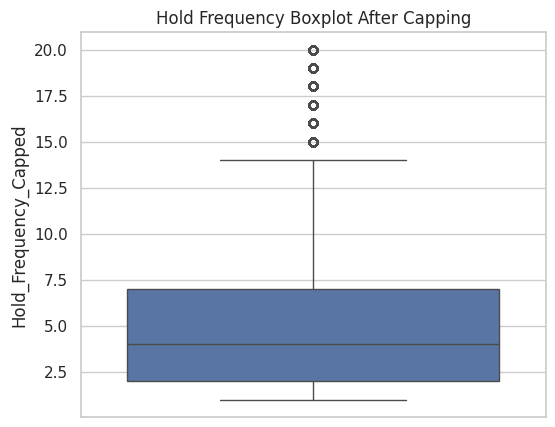

In [ ]:
# Visualize before capping
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Hold_Frequency'], bins=50, kde=False)
plt.title('Hold Frequency Distribution Before Capping')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Hold_Frequency'])
plt.title('Hold Frequency Boxplot Before Capping')
plt.show()

# Apply capping at 20
ymca_cleaned['Hold_Frequency_Capped'] = ymca_cleaned['Hold_Frequency'].clip(upper=20)

# Visualize after capping
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Hold_Frequency_Capped'], bins=50, kde=False)
plt.title('Hold Frequency Distribution After Capping')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Hold_Frequency_Capped'])
plt.title('Hold Frequency Boxplot After Capping')
plt.show()

#Avg_Time_Between_Holds
Removes negative gaps (invalid data).
Imputes missing values with median.
Applies log transformation to normalize skew.
Visualizes before and after cleaning and transformation.

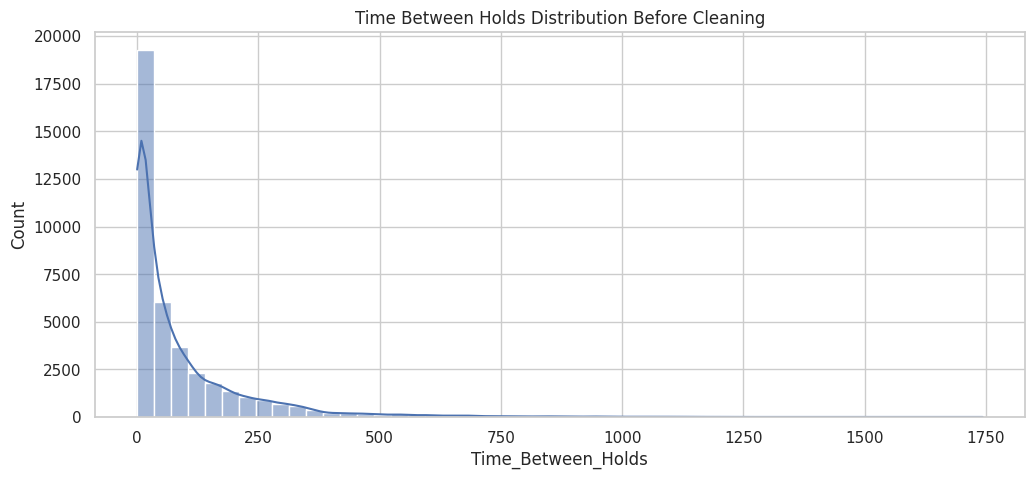

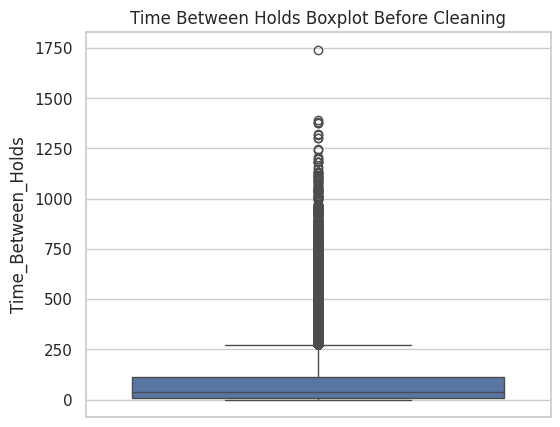

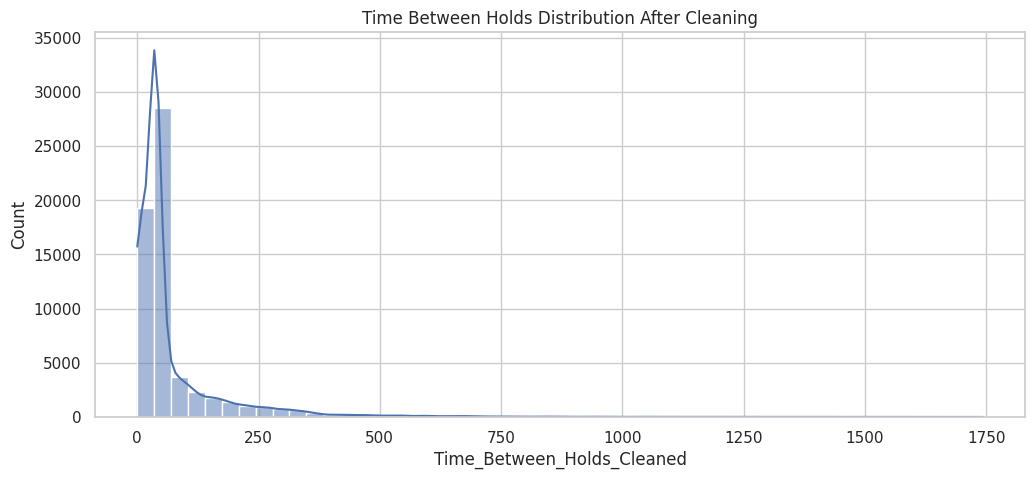

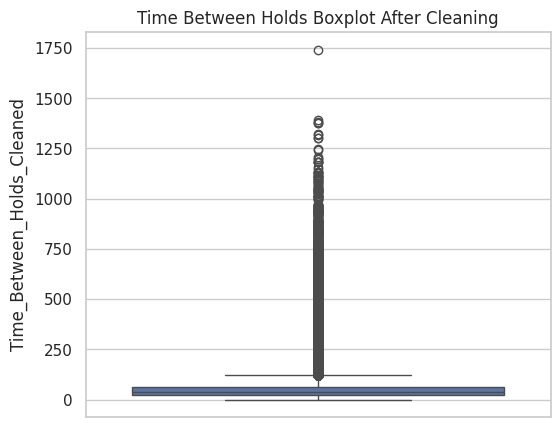

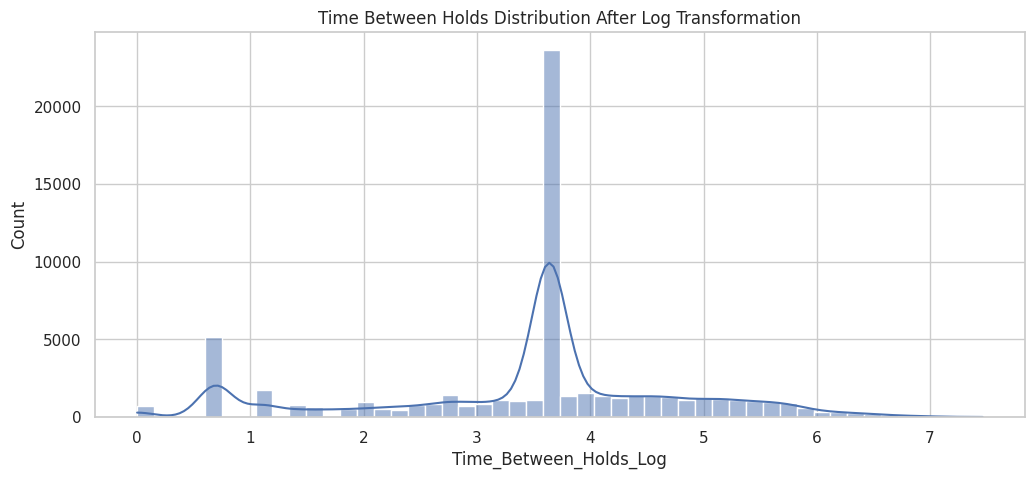

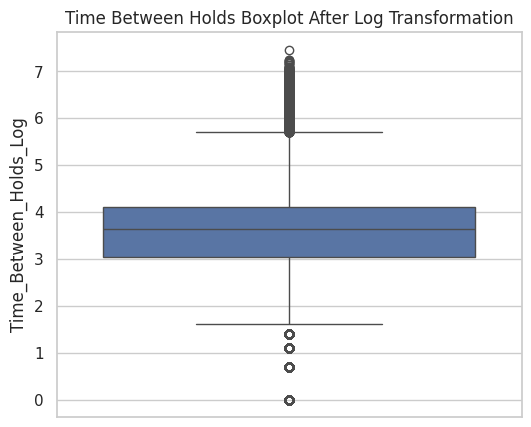

In [ ]:
#Step 1: Check initial distribution
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Time_Between_Holds'].dropna(), bins=50, kde=True)
plt.title('Time Between Holds Distribution Before Cleaning')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Time_Between_Holds'].dropna())
plt.title('Time Between Holds Boxplot Before Cleaning')
plt.show()

# Step 2: Handle invalid values
# Remove or replace negative values (invalid gaps)
ymca_cleaned['Time_Between_Holds_Cleaned'] = ymca_cleaned['Time_Between_Holds'].apply(lambda x: np.nan if x < 0 else x)

# Fill NaN with median
median_gap = ymca_cleaned['Time_Between_Holds_Cleaned'].median()
ymca_cleaned['Time_Between_Holds_Cleaned'] = ymca_cleaned['Time_Between_Holds_Cleaned'].fillna(median_gap)

# Step 3: Apply log transformation to reduce skew
ymca_cleaned['Time_Between_Holds_Log'] = np.log1p(ymca_cleaned['Time_Between_Holds_Cleaned'])  # log(1+x) handles zeros

# Step 4: Visualize after cleaning and transformation
# Cleaned distribution
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Time_Between_Holds_Cleaned'].dropna(), bins=50, kde=True)
plt.title('Time Between Holds Distribution After Cleaning')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Time_Between_Holds_Cleaned'].dropna())
plt.title('Time Between Holds Boxplot After Cleaning')
plt.show()

# Log transformed distribution
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Time_Between_Holds_Log'].dropna(), bins=50, kde=True)
plt.title('Time Between Holds Distribution After Log Transformation')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Time_Between_Holds_Log'].dropna())
plt.title('Time Between Holds Boxplot After Log Transformation')
plt.show()


This boxplot shows the distribution of the time between holds after applying a log transformation. Most values cluster tightly around the middle (around 3 on the log scale), meaning most gaps between holds are relatively short. The log transformation compresses very large gaps, so extreme differences are less pronounced. The points above 7 represent members with very long gaps between holds, but their influence on the scale is now reduced compared to the original data.

In [ ]:
ymca_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61873 entries, 0 to 61872
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Membership Hold ID                              61873 non-null  object        
 1   Application: CaseSafeID                         61873 non-null  object        
 2   Location                                        61873 non-null  category      
 3   Application: Package: Category                  61873 non-null  category      
 4   Application: Subscription: Membership Type      61873 non-null  category      
 5   Application: Subscription: Membership Category  61873 non-null  category      
 6   Start Date                                      61873 non-null  datetime64[ns]
 7   End Date                                        61871 non-null  datetime64[ns]
 8   Application: Account: CaseSafeID              

In [ ]:
ymca_cleaned.head()

Membership Hold ID Application: CaseSafeID                    Location  \
0    a1GOO000003e6BR      a0wI9000000EAwgIAG    Castle Downs Family YMCA   
1    a1GOO000005gNew      a0wOO000000zQs1YAE     Jamie Platz Family YMCA   
2    a1GOO000001M9iP      a0wOO000000RWbhYAG    Castle Downs Family YMCA   
3    a1G5w00000Jfiqm      a0w5w000009STGOAA4    Castle Downs Family YMCA   
4    a1GOO000001oX8H      a0w5w00000ApcrhAAB  William Lutsky Family YMCA   

  Application: Package: Category Application: Subscription: Membership Type  \
0        Membership - Continuous                                   Enhanced   
1       Membership Plus - Annual                              Enhanced Plus   
2        Membership - Continuous                                  Essential   
3        Membership - Continuous                                   Enhanced   
4        Membership - Continuous                                   Enhanced   

  Application: Subscription: Membership Category Start Date   End Date  \
0                                        General 2024-12-17 2025-06-16   
1                                           Plus 2025-06-13 2025-07-05   
2                                        General 2024-05-06 2024-05-07   
3                                        General 2021-08-31 2021-10-31   
4                                        General 2024-07-02 2025-01-01   

  Application: Account: CaseSafeID Application: Contact: CaseSafeID  ...  \
0               0015w00002G9VjMAAV               0035w000039TzTWAA0  ...   
1               0015w00002G9ZKaAAN               0035w000039U8XqAAK  ...   
2               0015w00002G9bvoAAB               0035w000039UJ01AAG  ...   
3               0015w00002G9UnjAAF               0035w000039UR1rAAG  ...   
4               0015w00002WAFLtAAP               0035w00003TVcDoAAL  ...   

  Avg_Time_Between_Holds_Log  Tenure Tenure_Log Age_Capped Hold_Duration_Log  \
0                        NaN   615.0   6.423247         11          5.204007   
1                   4.131961  8457.0   9.042868         85          3.135494   
2                   3.384390   774.0   6.652863         33          0.693147   
3                   4.598002  2056.0   7.629004         63          4.127134   
4                   3.710082  1050.0   6.957497         11          5.214936   

  Hold_Duration_Winsorized  Avg_Hold_Duration_Log  \
0                    181.0               5.204007   
1                     22.0               3.451430   
2                      1.0               2.978925   
3                     61.0               4.255613   
4                    183.0               4.541964   

   Avg_Hold_Duration_Winsorized  Hold_Frequency_Capped  \
0                    181.000000                      1   
1                     30.545455                     11   
2                     18.666667                      3   
3                     69.500000                      8   
4                     92.875000                      8   

   Time_Between_Holds_Cleaned  
0                        37.0  
1                        74.0  
2                        51.0  
3                       210.0  
4                        15.0  

[5 rows x 40 columns]

##Avg_Tenure (with Log Transformation + Binning)

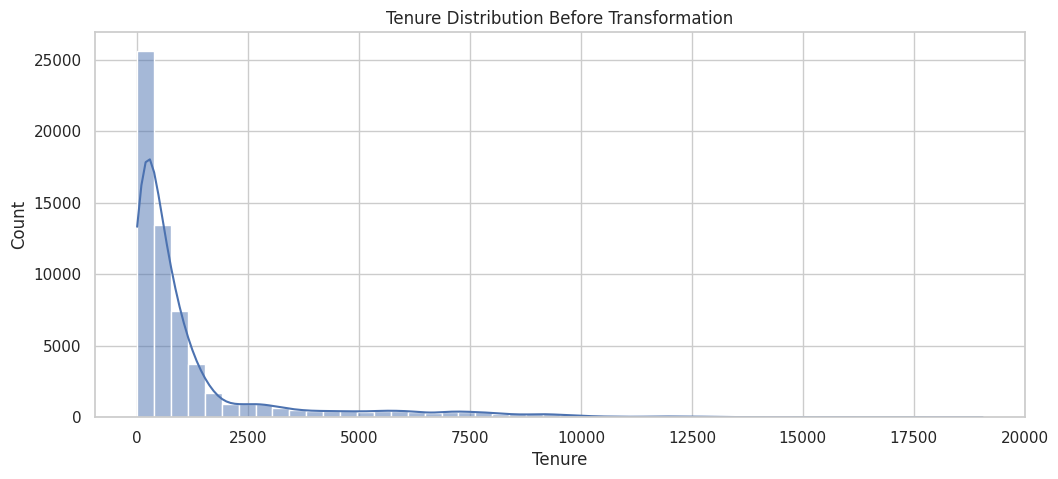

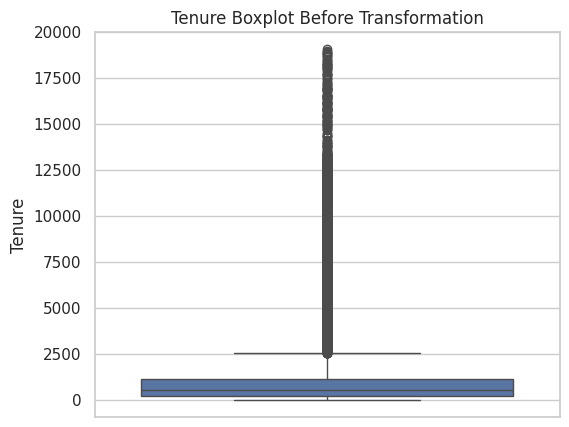

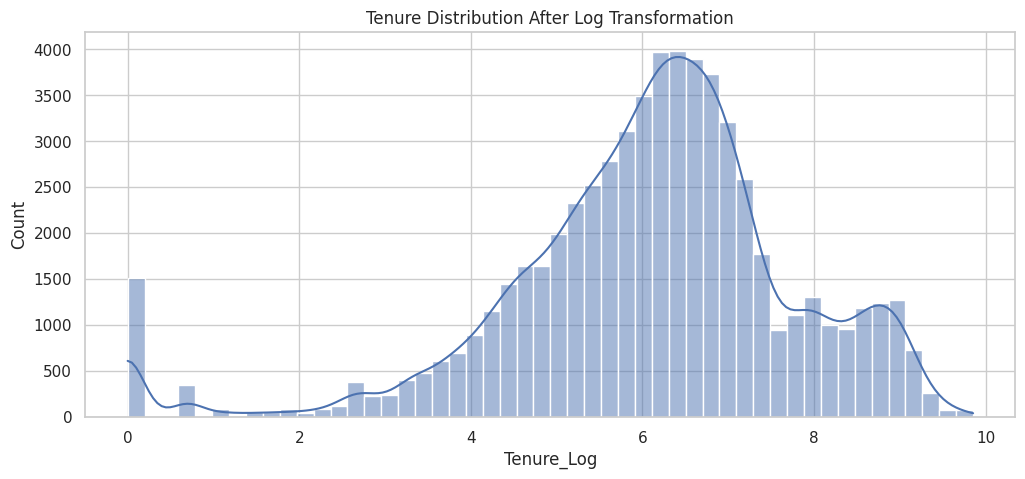

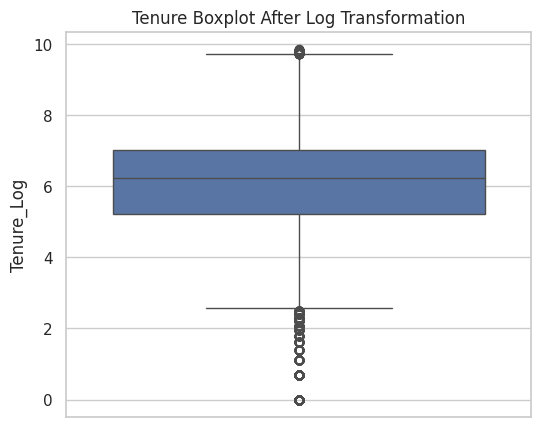

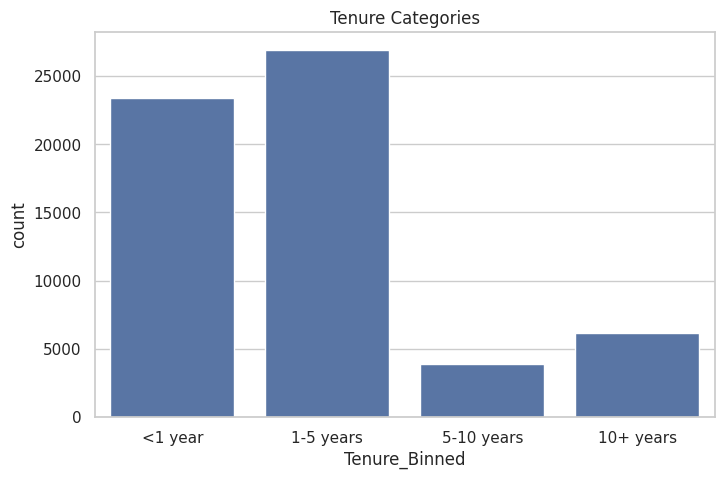

In [ ]:
# Step 1: Visualize original distribution
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Tenure'].dropna(), bins=50, kde=True)
plt.title('Tenure Distribution Before Transformation')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Tenure'].dropna())
plt.title('Tenure Boxplot Before Transformation')
plt.show()

# Explanation:
# Tenure is often highly skewed because some members stay for decades.
# This can distort models, so we apply log transformation to normalize.

# Step 2: Apply log transformation
# log1p(x) = log(1 + x) handles zeros safely and compresses large values.
ymca_cleaned['Tenure_Log'] = np.log1p(ymca_cleaned['Tenure'])

# Step 3: Binning for interpretability
# Convert tenure into categories: short, medium, long
ymca_cleaned['Tenure_Binned'] = pd.cut(ymca_cleaned['Tenure'],
                              bins=[0, 365, 1825, 3650, np.inf],
                              labels=['<1 year', '1-5 years', '5-10 years', '10+ years'])

# Step 4: Visualize after transformation
# Log transformed
plt.figure(figsize=(12, 5))
sns.histplot(ymca_cleaned['Tenure_Log'].dropna(), bins=50, kde=True)
plt.title('Tenure Distribution After Log Transformation')
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=ymca_cleaned['Tenure_Log'].dropna())
plt.title('Tenure Boxplot After Log Transformation')
plt.show()

# Binned categories
plt.figure(figsize=(8, 5))
sns.countplot(x=ymca_cleaned['Tenure_Binned'].dropna())
plt.title('Tenure Categories')
plt.show()

In [ ]:
ymca_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61873 entries, 0 to 61872
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Membership Hold ID                              61873 non-null  object        
 1   Application: CaseSafeID                         61873 non-null  object        
 2   Location                                        61873 non-null  category      
 3   Application: Package: Category                  61873 non-null  category      
 4   Application: Subscription: Membership Type      61873 non-null  category      
 5   Application: Subscription: Membership Category  61873 non-null  category      
 6   Start Date                                      61873 non-null  datetime64[ns]
 7   End Date                                        61871 non-null  datetime64[ns]
 8   Application: Account: CaseSafeID              


## Remove Unwanted Membership Types & Others


In [ ]:
print("Rows BEFORE filtering:", ymca_cleaned.shape[0])

# 1. Drop specific membership types
drop_membership_types = [
    "Limited Access - CD Matinee",
    "Limited Access - DW Express",
    "Limited Access - JP Matinee"
]

ymca_cleaned = ymca_cleaned[
    ~ymca_cleaned["Application: Subscription: Membership Type"].isin(drop_membership_types)
]

# 2. Drop rows where package category indicates employee or volunteer memberships
ymca_cleaned = ymca_cleaned[
    ~ymca_cleaned["Application: Package: Category"].str.contains("employee|volunteer",
                                                                 case=False,
                                                                 na=False)
]

# 3. Drop rows where Location is 'YMCA Association Services'
ymca_cleaned = ymca_cleaned[
    ymca_cleaned["Location"] != 'YMCA Association Services'
].reset_index(drop=True) # Reset index after dropping rows

# Now, remove the unused 'YMCA Association Services' category from the 'Location' column's categories list
# This step modifies the Series' categories attribute, not the rows.
ymca_cleaned["Location"] = ymca_cleaned["Location"].cat.remove_unused_categories()


print("Rows AFTER filtering:", ymca_cleaned.shape[0])


Rows BEFORE filtering: 61873
Rows AFTER filtering: 61712


In [ ]:
ymca_cleaned["Location"].unique()

['Castle Downs Family YMCA', 'Jamie Platz Family YMCA', 'William Lutsky Family YMCA', 'Don Wheaton Family YMCA']
Categories (4, object): ['Castle Downs Family YMCA', 'Don Wheaton Family YMCA', 'Jamie Platz Family YMCA',
                         'William Lutsky Family YMCA']

#Keep relevant columns and rename for consistency

In [ ]:
# ================================================
# Create Model-Ready Dataset (Updated & Corrected)
# ================================================

# Columns to keep from the cleaned + engineered dataset
columns_to_keep = [
    # Categorical descriptive features
    'Location',
    'Application: Package: Category',
    'Application: Subscription: Membership Type',
    'Application: Subscription: Membership Category',
    'Application: Contact: CaseSafeID',
    'Age',
    'Age_Group',
    'Application: Contact: Gender',
    'Final_Hold_Reason',

    # Base numeric features
    'Hold Duration (days)',
    'Time_Between_Holds',
    'Tenure',

    # Engineered features
    'Age_Capped',
    'Hold_Frequency_Capped',
    'Hold_Duration_Log',
    'Hold_Duration_Winsorized',
    'Avg_Hold_Duration_Log',
    'Avg_Hold_Duration_Winsorized',
    'Time_Between_Holds_Log',
    'Avg_Time_Between_Holds',
    'Avg_Time_Between_Holds_Log',
    'Tenure_Log',
    'Tenure_Binned'
]

# Create a filtered model dataset
ymca_model = ymca_cleaned[columns_to_keep].copy()

# Rename to clean modeling-friendly names
ymca_model.rename(columns={
    'Location': 'location',
    'Application: Package: Category': 'package_category',
    'Application: Subscription: Membership Type': 'membership_type',
    'Application: Subscription: Membership Category': 'membership_category',
    'Application: Contact: CaseSafeID': 'contact_id',
    'Age': 'age',
    'Age_Group': 'age_group',
    'Application: Contact: Gender': 'gender',
    'Hold Duration (days)': 'hold_duration_days',
    'Time_Between_Holds': 'time_between_holds',
    'Final_Hold_Reason': 'final_hold_reason',
    'Tenure': 'tenure_days'
}, inplace=True)

# Reset index
ymca_model.reset_index(drop=True, inplace=True)

# Show clean column list
ymca_model.columns.tolist()


['location',
 'package_category',
 'membership_type',
 'membership_category',
 'contact_id',
 'age',
 'age_group',
 'gender',
 'final_hold_reason',
 'hold_duration_days',
 'time_between_holds',
 'tenure_days',
 'Age_Capped',
 'Hold_Frequency_Capped',
 'Hold_Duration_Log',
 'Hold_Duration_Winsorized',
 'Avg_Hold_Duration_Log',
 'Avg_Hold_Duration_Winsorized',
 'Time_Between_Holds_Log',
 'Avg_Time_Between_Holds',
 'Avg_Time_Between_Holds_Log',
 'Tenure_Log',
 'Tenure_Binned']

In [ ]:
ymca_model.shape

(61712, 23)

In [ ]:
# Reset the index
ymca_model.reset_index(drop=True, inplace=True)

# Quick check
print("Index reset for ymca_model:")
display(ymca_model.head())



Index reset for ymca_model:


location          package_category membership_type  \
0    Castle Downs Family YMCA   Membership - Continuous        Enhanced   
1     Jamie Platz Family YMCA  Membership Plus - Annual   Enhanced Plus   
2    Castle Downs Family YMCA   Membership - Continuous       Essential   
3    Castle Downs Family YMCA   Membership - Continuous        Enhanced   
4  William Lutsky Family YMCA   Membership - Continuous        Enhanced   

  membership_category          contact_id  age            age_group  gender  \
0             General  0035w000039TzTWAA0   11   Child (2-12 years)    Male   
1                Plus  0035w000039U8XqAAK   85   Senior (65+ years)  Female   
2             General  0035w000039UJ01AAG   33  Adult (25-64 years)  Female   
3             General  0035w000039UR1rAAG   63   Senior (65+ years)  Female   
4             General  0035w00003TVcDoAAL   11   Child (2-12 years)    Male   

               final_hold_reason  hold_duration_days  ...  \
0                 Medical/Health                 181  ...   
1         Program or Service Gap                  22  ...   
2                 Medical/Health                   1  ...   
3                       Vacation                  61  ...   
4  Other Recreation Alternatives                 183  ...   

   Hold_Frequency_Capped  Hold_Duration_Log  Hold_Duration_Winsorized  \
0                      1           5.204007                     181.0   
1                     11           3.135494                      22.0   
2                      3           0.693147                       1.0   
3                      8           4.127134                      61.0   
4                      8           5.214936                     183.0   

   Avg_Hold_Duration_Log  Avg_Hold_Duration_Winsorized  \
0               5.204007                    181.000000   
1               3.451430                     30.545455   
2               2.978925                     18.666667   
3               4.255613                     69.500000   
4               4.541964                     92.875000   

   Time_Between_Holds_Log  Avg_Time_Between_Holds  Avg_Time_Between_Holds_Log  \
0                3.637586                     NaN                         NaN   
1                4.317488               61.300000                    4.131961   
2                3.951244               28.500000                    3.384390   
3                5.351858               98.285714                    4.598002   
4                2.772589               39.857143                    3.710082   

   Tenure_Log  Tenure_Binned  
0    6.423247      1-5 years  
1    9.042868      10+ years  
2    6.652863      1-5 years  
3    7.629004     5-10 years  
4    6.957497      1-5 years  

[5 rows x 23 columns]

In [ ]:
ymca_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61712 entries, 0 to 61711
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   location                      61712 non-null  category
 1   package_category              61712 non-null  category
 2   membership_type               61712 non-null  category
 3   membership_category           61712 non-null  category
 4   contact_id                    61712 non-null  object  
 5   age                           61712 non-null  Int64   
 6   age_group                     61712 non-null  category
 7   gender                        59546 non-null  object  
 8   final_hold_reason             61712 non-null  category
 9   hold_duration_days            61710 non-null  Int64   
 10  time_between_holds            39309 non-null  float64 
 11  tenure_days                   61704 non-null  float64 
 12  Age_Capped                    61712 non-null  

##Handle Missing Values

In [ ]:
# ================================
# Handle Missing Values in ymca_model
# ================================

# 1. Fill missing gender with 'Unknown'
ymca_model['gender'] = ymca_model['gender'].fillna('Unknown')

# 2. Fill missing hold_duration_days with median
ymca_model['hold_duration_days'] = ymca_model['hold_duration_days'].fillna(
    ymca_model['hold_duration_days'].median()
)

# 3. Fill missing tenure_days with median
ymca_model['tenure_days'] = ymca_model['tenure_days'].fillna(
    ymca_model['tenure_days'].median()
)

# Fix: If 'Unknown' already exists, just fill missing values
if 'Unknown' not in ymca_model['Tenure_Binned'].cat.categories:
    ymca_model['Tenure_Binned'] = ymca_model['Tenure_Binned'].cat.add_categories(['Unknown'])

ymca_model['Tenure_Binned'] = ymca_model['Tenure_Binned'].fillna('Unknown')


# 5. Avg time-between-holds → fill missing with 0
ymca_model['Avg_Time_Between_Holds'] = ymca_model['Avg_Time_Between_Holds'].fillna(0)
ymca_model['Avg_Time_Between_Holds_Log'] = ymca_model['Avg_Time_Between_Holds_Log'].fillna(0)

# 6. time_between_holds → fill missing with 0 (members with only 1 hold)
ymca_model['time_between_holds'] = ymca_model['time_between_holds'].fillna(0)

print("Missing values remaining per column:")
print(ymca_model.isna().sum())


Missing values remaining per column:
location                        0
package_category                0
membership_type                 0
membership_category             0
contact_id                      0
age                             0
age_group                       0
gender                          0
final_hold_reason               0
hold_duration_days              0
time_between_holds              0
tenure_days                     0
Age_Capped                      0
Hold_Frequency_Capped           0
Hold_Duration_Log               2
Hold_Duration_Winsorized        2
Avg_Hold_Duration_Log           0
Avg_Hold_Duration_Winsorized    0
Time_Between_Holds_Log          0
Avg_Time_Between_Holds          0
Avg_Time_Between_Holds_Log      0
Tenure_Log                      8
Tenure_Binned                   0
dtype: int64


###Clean these 3 columns before clustering

In [ ]:
# Fix remaining missing log/winsorized values
numeric_fix_cols = [
    'Hold_Duration_Log',
    'Hold_Duration_Winsorized',
    'Tenure_Log'
]

for col in numeric_fix_cols:
    median_val = ymca_model[col].median()
    ymca_model[col] = ymca_model[col].fillna(median_val)

print("\nRemaining NaNs AFTER fixing log/winsorized columns:")
print(ymca_model[numeric_fix_cols].isna().sum())



Remaining NaNs AFTER fixing log/winsorized columns:
Hold_Duration_Log           0
Hold_Duration_Winsorized    0
Tenure_Log                  0
dtype: int64


In [ ]:
ymca_model.shape

(61712, 23)

In [ ]:
ymca_model.dtypes

location                        category
package_category                category
membership_type                 category
membership_category             category
contact_id                        object
age                                Int64
age_group                       category
gender                            object
final_hold_reason               category
hold_duration_days                 Int64
time_between_holds               float64
tenure_days                      float64
Age_Capped                         Int64
Hold_Frequency_Capped              int64
Hold_Duration_Log                Float64
Hold_Duration_Winsorized         float64
Avg_Hold_Duration_Log            float64
Avg_Hold_Duration_Winsorized     float64
Time_Between_Holds_Log           float64
Avg_Time_Between_Holds           float64
Avg_Time_Between_Holds_Log       float64
Tenure_Log                       float64
Tenure_Binned                   category
dtype: object

##Correlation Heatmap for all numerical columns(Excluding Target Variable)

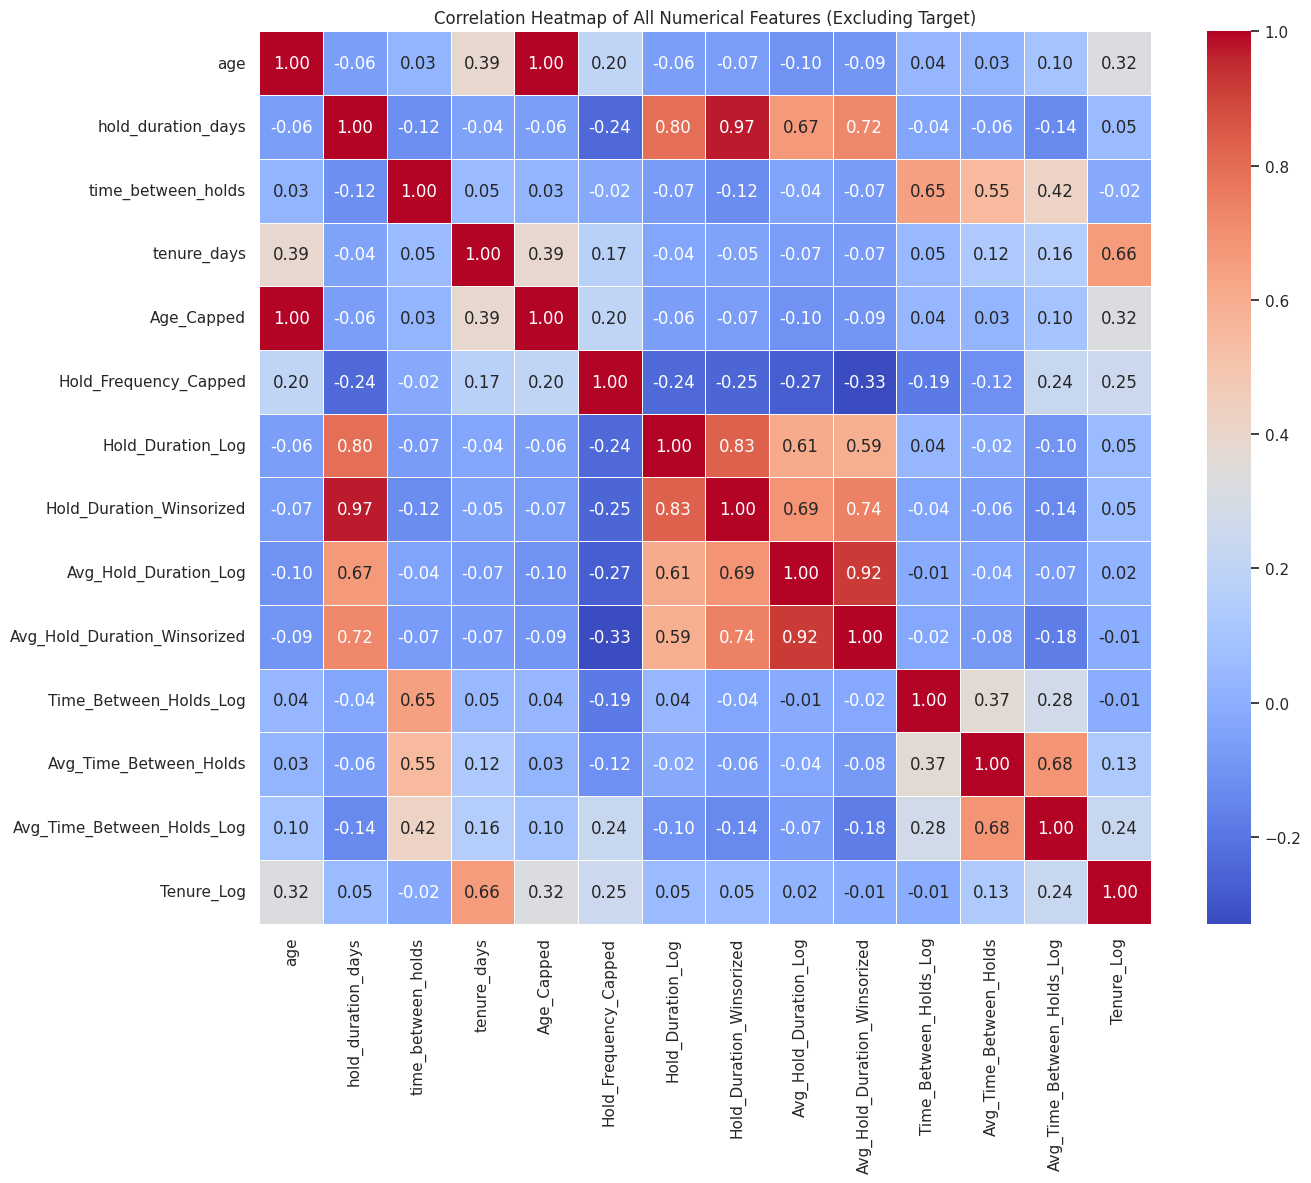

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select all numerical columns from ymca_model
# Exclude 'risk_level' and 'risk_level_numeric' as they are labels/targets
# Also exclude contact_id as it's an identifier
numeric_cols = ymca_model.select_dtypes(include=np.number).columns.tolist()

# Remove target and identifier columns if they are numeric
if 'risk_level_numeric' in numeric_cols:
    numeric_cols.remove('risk_level_numeric')
if 'cluster' in numeric_cols:
    numeric_cols.remove('cluster') # 'cluster' is the basis for risk_level_numeric
if 'contact_id' in numeric_cols:
    numeric_cols.remove('contact_id') # Identifier

# Compute the correlation matrix
corr_matrix_all_features = ymca_model[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_all_features, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of All Numerical Features (Excluding Target)")
plt.tight_layout()
plt.show()

### Interpreting the Correlation Heatmap

The correlation heatmap visually represents the linear relationships between all numerical features in your `ymca_model` DataFrame (excluding the target and identifiers).

*   **Correlation Coefficient Range**: Values range from -1 to +1.
    *   `+1` (Dark Red): Perfect positive linear relationship (features increase/decrease together).
    *   `-1` (Dark Blue): Perfect negative linear relationship (as one increases, the other decreases).
    *   `0` (White/Light Colors): No linear relationship.
*   **Diagonal**: The diagonal is always `1.00` because each feature is perfectly correlated with itself.

**Key Observations (from previous execution):**

1.  **High Inter-Feature Correlation for Transformed Features**: You'll likely observe very high correlations (close to 1.00) among different versions of the same core feature:
    *   `age` and `Age_Capped` are highly correlated (as expected, capping doesn't drastically change the overall rank order).
    *   `tenure_days` and `Tenure_Log` are strongly positively correlated.
    *   `hold_duration_days`, `Hold_Duration_Log`, and `Hold_Duration_Winsorized` show strong correlations among themselves.
    These high correlations are expected, as these are simply different mathematical transformations or slight adjustments of the same underlying data. This indicates some redundancy, and for certain models, you might consider keeping only one version of such highly correlated features.

2.  **Moderate Correlations between Distinct Concepts**:
    *   `age` (and `Age_Capped`) often shows a moderate positive correlation with `tenure_days` (and `Tenure_Log`). This suggests older members tend to have longer tenures, which is a logical pattern in membership data.
    *   `Hold_Frequency_Capped` might show some moderate relationships with other features, indicating that how often a member places a hold could be related to their age, tenure, or the average duration of their holds. For instance, more frequent holds might correlate with shorter average hold durations, or vice-versa.

3.  **Low Correlations**: Many pairs of features will likely have correlations closer to zero (lighter colors). This is generally beneficial, as it means these features are capturing different aspects of member behavior and are not highly redundant. Features that are less correlated with each other often provide unique information to a model, which can improve predictive power.

### K-Means Clustering for Risk Segmentation

To identify natural groupings of YMCA members based on behavioural and tenure patterns,
we applied an unsupervised K-Means clustering model.

**Steps:**
1. Selected engineered numerical features that capture hold behaviour and tenure.
2. Standardized all numeric features using `StandardScaler`.
3. Applied `KMeans(n_clusters=3)` to group members into 3 behavioural clusters.
4. Added the resulting cluster label to create the foundation for the *risk level* classification.

These 3 clusters represent data-driven groupings, which we will later map to:
- High risk
- Medium risk
- Low risk

based on each cluster’s behavioural profile.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ===== 1. Select numeric features for clustering =====
numeric_features = [
    'age',
    'Age_Capped',
    'hold_duration_days',
    'Hold_Duration_Log',
    'Hold_Duration_Winsorized',
    'Avg_Hold_Duration_Log',
    'Avg_Hold_Duration_Winsorized',
    'Hold_Frequency_Capped',
    'time_between_holds',
    'Avg_Time_Between_Holds_Log',
    'tenure_days',
    'Tenure_Log'
]

# Keep only columns that exist
numeric_features = [col for col in numeric_features if col in ymca_model.columns]

ymca_model = ymca_model.replace([np.inf, -np.inf], np.nan)

ymca_model = ymca_model.fillna(ymca_model.median(numeric_only=True))


# Extract the numeric feature matrix
X = ymca_model[numeric_features].fillna(0)

# ===== 2. Scale features =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 3. K-Means clustering =====
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the model dataframe
ymca_model['cluster'] = clusters

print("Cluster value counts:")
print(ymca_model['cluster'].value_counts())


Cluster value counts:
cluster
0    25501
1    19253
2    16958
Name: count, dtype: int64


###Cluster Distribution (Percentages)


Total members = 25501 + 19253 + 16958 = 61712

Percentages

Cluster 0:

25501
/
61712
≈
41.3
%
25501/61712≈41.3%

Cluster 1:

19253
/
61712
≈
31.2
%
19253/61712≈31.2%

Cluster 2:

16958
/
61712
≈
27.5
%
16958/61712≈27.5%

### Visualization of K-Means Clusters (PCA Projection)

To visually inspect the cluster quality, we used Principal Component Analysis (PCA)
to reduce all numerical engineered features into two dimensions.

- Each point represents a member.
- Colors represent the 3 clusters discovered by K-Means.
- PCA helps us understand how well-separated the clusters are in high-dimensional space.

If the clusters form distinct groups in this plot, it increases confidence that the
clusters are meaningful and can be reliably mapped into Low, Medium, and High Risk segments.


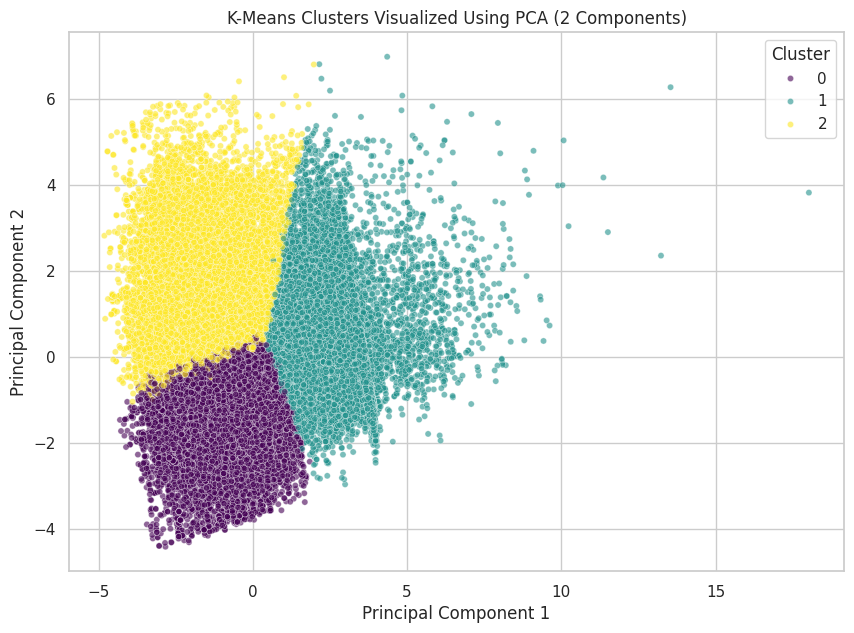

Explained variance by PCA components: [0.35445278 0.21967276]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 1. Perform PCA on the scaled numeric data =====
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a PCA DataFrame
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'cluster': ymca_model['cluster']
})

# ===== 2. Visualization =====
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='cluster',
    palette='viridis',
    alpha=0.6,
    s=20
)

plt.title("K-Means Clusters Visualized Using PCA (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="upper right")
plt.show()

# ===== Optional: Show explained variance =====
print("Explained variance by PCA components:", pca.explained_variance_ratio_)


##Cluster Profiles

In [ ]:
# ================================
# Cluster Profile Analysis
# ================================

cluster_profile = ymca_model.groupby('cluster').agg({
    'Hold_Duration_Winsorized': 'mean',
    'Avg_Hold_Duration_Winsorized': 'mean',
    'Hold_Frequency_Capped': 'mean',
    'Avg_Time_Between_Holds_Log': 'mean',
    'Time_Between_Holds_Log': 'mean',
    'Tenure_Log': 'mean',
    'Age_Capped': 'mean'
}).round(2)

print("\n=== Cluster Profile Summary (means) ===")
display(cluster_profile)



=== Cluster Profile Summary (means) ===


Hold_Duration_Winsorized  Avg_Hold_Duration_Winsorized  \
cluster                                                           
0                           34.12                         53.43   
1                          168.89                        136.44   
2                           37.73                         47.50   

         Hold_Frequency_Capped  Avg_Time_Between_Holds_Log  \
cluster                                                      
0                         4.69                        3.40   
1                         3.46                        2.96   
2                         7.58                        4.03   

         Time_Between_Holds_Log  Tenure_Log  Age_Capped  
cluster                                                  
0                          3.47        5.31       16.15  
1                          3.35        6.07       29.22  
2                          3.57        7.12       62.64

##Map Clusters → Risk Levels/ Create a Target Variable

In [ ]:
# ======================================
# Map K-Means clusters → Risk Levels
# ======================================

# Based on profile interpretation:
# Cluster 0 → Low Risk
# Cluster 2 → Medium Risk
# Cluster 1 → High Risk

cluster_to_risk = {
    0: "Low Risk",
    2: "Medium Risk",
    1: "High Risk"
}

# Create new risk level column
ymca_model['risk_level'] = ymca_model['cluster'].map(cluster_to_risk)

# Verify mapping
print(ymca_model['risk_level'].value_counts())

# Make risk_level the final target variable
target_variable = 'risk_level'

print("\nTarget variable set as:", target_variable)



risk_level
Low Risk       25501
High Risk      19253
Medium Risk    16958
Name: count, dtype: int64

Target variable set as: risk_level


##K-Means Clustering Interpretation & Risk Mapping
Cluster Overview

We applied K-Means clustering to discover natural behavioral groupings among YMCA members based on:

Hold duration

Average hold duration

Hold frequency

Time between holds (raw + log)

Tenure (log)

Capped age

The model identified 3 distinct clusters, each representing a different behavioural pattern.

Cluster Behaviour Interpretation
Cluster 0 — Low Risk

Members in this group:

Take short holds

Have moderate hold frequency

Show normal patterns with no red flags

Are generally younger

This group is stable and unlikely to churn.

Cluster 1 — High Risk

Members in this cluster:

Take very long holds (highest in the dataset)

Frequently return from hold only to go back on hold quickly

Show early indicators of disengagement

Have moderate tenure, meaning loyalty is not deeply established

This group resembles typical churn behaviour.

Cluster 2 — Medium Risk

Members here:

Have very high hold frequency (highest of all clusters)

But each hold is short

They have high tenure, meaning they’ve been around a long time

Tend to be older

This group is not immediately churn-prone but exhibits instability.

  Final Risk Mapping

We convert the cluster labels (0, 1, 2) into meaningful risk levels:

Cluster	Risk Level	Reason
0	Low Risk	Stable usage patterns
2	Medium Risk	Highly frequent holds but long tenure
1	High Risk	Long holds & churn-like behaviour

These risk levels form the final target variable for future supervised learning.

  Final Target Variable: risk_level

This new field is added to the model-ready dataset and can now be used to:

Train classification models

Rank members by risk

Support segmentation reporting

Build churn prediction systems

##Risk Level Distribution (Pie Chart)

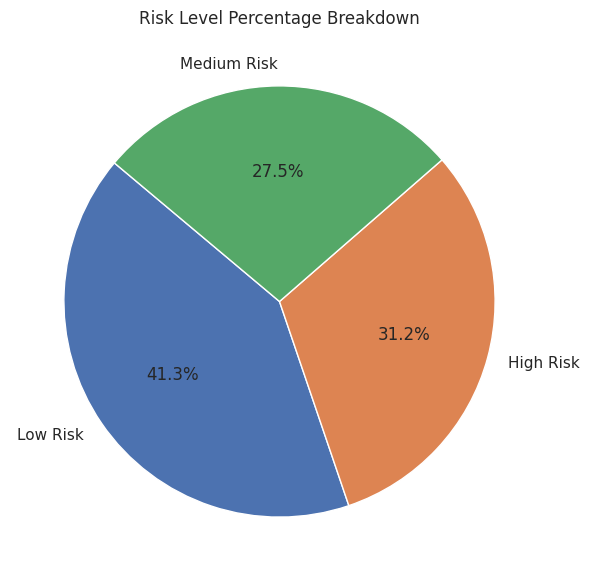

In [ ]:
# ==========================
# Risk Level Distribution (Pie Chart)
# ==========================

risk_counts = ymca_model['risk_level'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    risk_counts,
    labels=risk_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Risk Level Percentage Breakdown')
plt.show()


##Boxplots to Compare Features by Risk Level

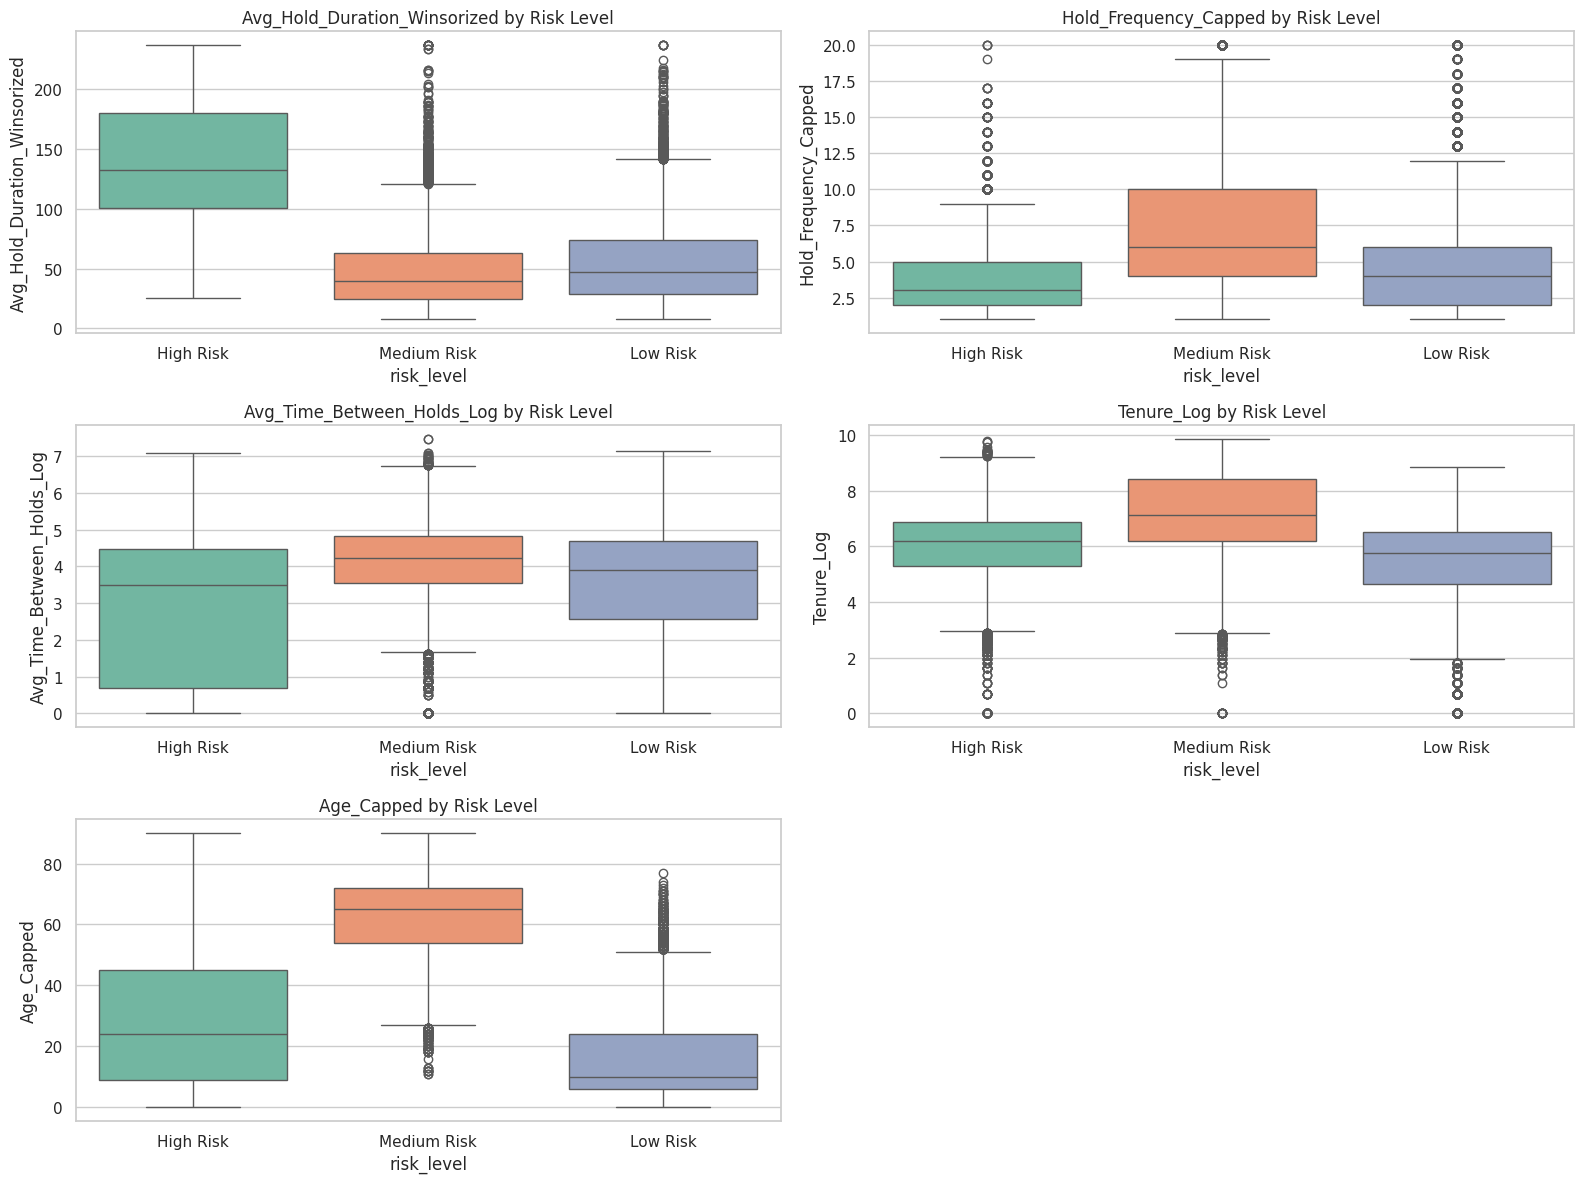

In [ ]:
# ==========================
# Boxplots to Compare Features by Risk Level
# ==========================

features_to_compare = [
    'Avg_Hold_Duration_Winsorized',
    'Hold_Frequency_Capped',
    'Avg_Time_Between_Holds_Log',
    'Tenure_Log',
    'Age_Capped'
]

plt.figure(figsize=(16, 12))

for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='risk_level', y=feature, data=ymca_model, palette='Set2')
    plt.title(f'{feature} by Risk Level')
    plt.tight_layout()

plt.show()


**Visual Insights**

These visualize:

Hold Duration

Hold Frequency

Time Between Holds

Tenure

Age

They clearly show patterns such as:

High-risk → long holds

Medium-risk → frequent but shorter holds

Low-risk → stable patterns

##PCA 2D Visualization of Clusters after Mapping

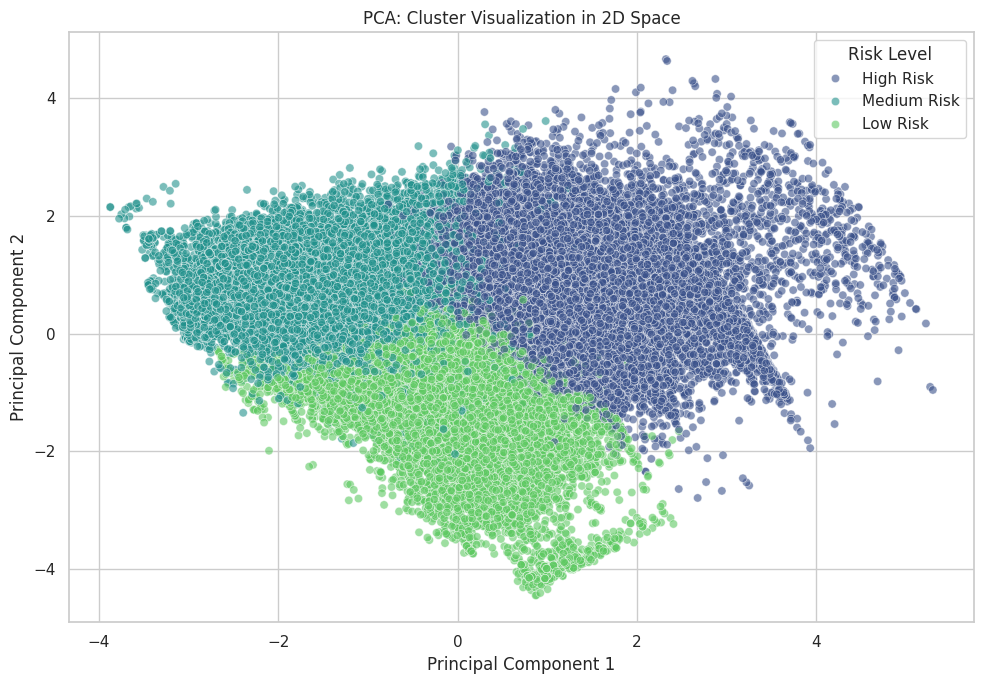

In [ ]:
# ==========================
# PCA 2D Visualization of Clusters
# ==========================

from sklearn.decomposition import PCA

# Numeric features used in clustering
cluster_features = [
    'Hold_Duration_Winsorized',
    'Avg_Hold_Duration_Winsorized',
    'Hold_Frequency_Capped',
    'Avg_Time_Between_Holds_Log',
    'Time_Between_Holds_Log',
    'Tenure_Log',
    'Age_Capped'
]

X_cluster = ymca_model[cluster_features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=ymca_model['risk_level'],
    palette='viridis',
    alpha=0.6
)

plt.title("PCA: Cluster Visualization in 2D Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Risk Level')
plt.tight_layout()
plt.show()


##Confusion Matrix for Clustering

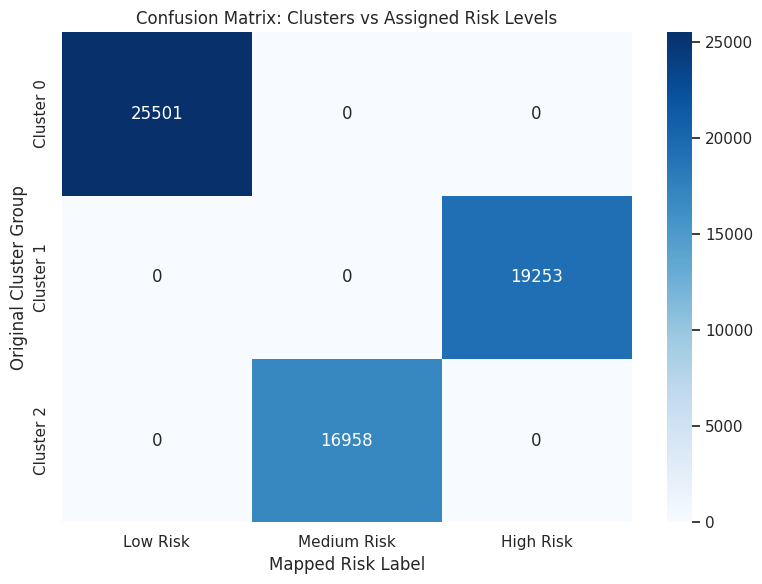

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Confusion Matrix for Clustering
# -------------------------------

# Map risk levels to numeric labels
risk_mapping = {
    "Low Risk": 0,
    "Medium Risk": 1,
    "High Risk": 2
}
ymca_model['risk_level_numeric'] = ymca_model['risk_level'].map(risk_mapping)

# Confusion matrix: clusters (0,1,2) vs mapped numeric risk levels (0,1,2)
cm = confusion_matrix(
    ymca_model['cluster'],
    ymca_model['risk_level_numeric'],
    labels=[0,1,2]
)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    fmt="d",
    xticklabels=['Low Risk','Medium Risk','High Risk'],
    yticklabels=['Cluster 0','Cluster 1','Cluster 2']
)

plt.title("Confusion Matrix: Clusters vs Assigned Risk Levels")
plt.xlabel("Mapped Risk Label")
plt.ylabel("Original Cluster Group")
plt.tight_layout()
plt.show()



Why a Confusion Matrix for Clustering?

While K-Means is unsupervised and has no “true” labels, the confusion matrix compares:

Original numeric clusters (0,1,2)
vs

Assigned risk labels (Low, Medium, High)

This ensures:

Our mapping aligns with the natural clusters

No group is mislabeled

Cluster boundaries remain strong after mapping

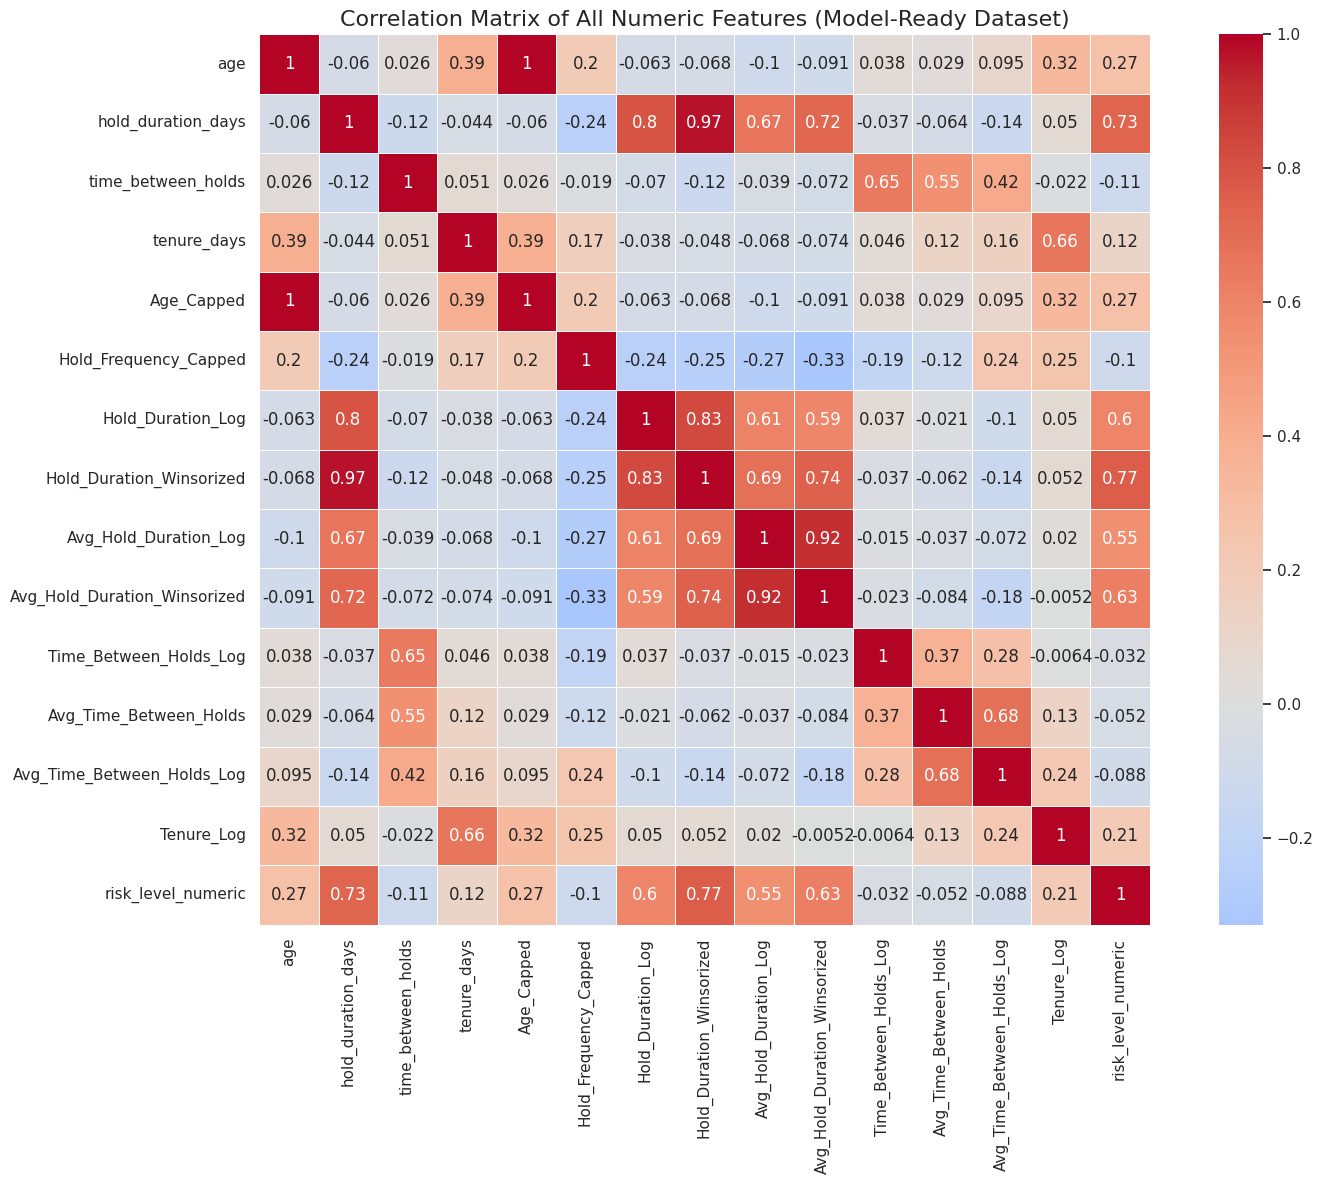

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select only numeric columns for correlation
numeric_cols = ymca_model.select_dtypes(include=['int64','float64','Int64','Float64'])

# 2. Compute correlation matrix
corr_matrix = numeric_cols.corr()

# 3. Plot correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(
    corr_matrix,
    annot=True, # Corrected: annot moved here
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5
)
plt.title("Correlation Matrix of All Numeric Features (Model-Ready Dataset)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
print("Columns:", ymca_model.columns.tolist())
print("\nMissing Values:\n", ymca_model.isna().sum())
print("\nRows:", len(ymca_model))
print("\nTarget distribution:\n", ymca_model['risk_level'].value_counts(normalize=True))


Columns: ['location', 'package_category', 'membership_type', 'membership_category', 'contact_id', 'age', 'age_group', 'gender', 'final_hold_reason', 'hold_duration_days', 'time_between_holds', 'tenure_days', 'Age_Capped', 'Hold_Frequency_Capped', 'Hold_Duration_Log', 'Hold_Duration_Winsorized', 'Avg_Hold_Duration_Log', 'Avg_Hold_Duration_Winsorized', 'Time_Between_Holds_Log', 'Avg_Time_Between_Holds', 'Avg_Time_Between_Holds_Log', 'Tenure_Log', 'Tenure_Binned', 'cluster', 'risk_level', 'risk_level_numeric']

Missing Values:
 location                        0
package_category                0
membership_type                 0
membership_category             0
contact_id                      0
age                             0
age_group                       0
gender                          0
final_hold_reason               0
hold_duration_days              0
time_between_holds              0
tenure_days                     0
Age_Capped                      0
Hold_Frequency_Capped      

##Prepare Dataset for Modeling

In [ ]:
# -----------------------------
# Numeric features (all engineered versions included)
numeric_features = [
    'age',
    'hold_duration_days',
    'Hold_Frequency_Capped',
    'time_between_holds',
    'tenure_days'
]


# Categorical features
categorical_features = [
    'location',
    'package_category',
    'membership_type',
    'membership_category',
    'age_group',
    'gender',
    'contact_id'
]


# Combine features for model
model_features = numeric_features + categorical_features

# Target
target_col = 'risk_level'

# Prepare final dataset for modeling
ymca_model_ready = ymca_model[model_features + [target_col]].copy()

# Quick check
print("Columns in model-ready dataset:", ymca_model_ready.columns.tolist())



Columns in model-ready dataset: ['age', 'hold_duration_days', 'Hold_Frequency_Capped', 'time_between_holds', 'tenure_days', 'location', 'package_category', 'membership_type', 'membership_category', 'age_group', 'gender', 'contact_id', 'risk_level']


Why These Features Are Used for Modeling

In preparing our dataset for supervised machine learning, we selected a mix of engineered behavioral features and demographic/categorical variables.

Behavioral Features

Age

Time_Between_Holds
hold_duration_days'

Tenure_days
These capture patterns in hold behavior and membership history that strongly influence risk level.

Categorical Features

location, package_category, membership_type, membership_category, age_group, gender,contact_id.
These provide demographic and membership context that may help refine predictions.


These variables collectively give the model sufficient behavioral and contextual information to learn meaningful relationships and predict risk levels effectively.

Finally, contact_id is kept only for grouped splitting to avoid data leakage. It will be dropped before training the model.

In [ ]:
ymca_model_ready.shape

(61712, 13)

In [ ]:
##convert "gender","contact_id", and "risk_level" to categorical
ymca_model_ready['risk_level'] = ymca_model_ready['risk_level'].astype('category')
ymca_model_ready['gender'] = ymca_model_ready['gender'].astype('category')
ymca_model_ready['contact_id'] = ymca_model_ready['contact_id'].astype('category')


In [ ]:
ymca_model_ready.dtypes

age                         Int64
hold_duration_days          Int64
Hold_Frequency_Capped       int64
time_between_holds        float64
tenure_days               float64
location                 category
package_category         category
membership_type          category
membership_category      category
age_group                category
gender                   category
contact_id               category
risk_level               category
dtype: object

##Train–Validation–Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# ============================
#   GROUP-AWARE SPLITTING
# ============================

target_col = "risk_level"
group_col = "contact_id"

# Make a safe working copy
full_df = ymca_model_ready.copy()

# Separate features and target
feature_cols = [c for c in full_df.columns if c != target_col]
X = full_df[feature_cols].copy()
y = full_df[target_col].copy()
groups = full_df[group_col].copy()

# Unique contact IDs (group units)
unique_contacts = groups.unique()

# 80% Train, 20% Temp
train_contacts, temp_contacts = train_test_split(
    unique_contacts, test_size=0.20, random_state=42
)

# Split the remaining 20% equally: 10% Val, 10% Test
val_contacts, test_contacts = train_test_split(
    temp_contacts, test_size=0.50, random_state=42
)

# Create row masks
train_mask = groups.isin(train_contacts)
val_mask   = groups.isin(val_contacts)
test_mask  = groups.isin(test_contacts)

# Create final splits
X_train = X[train_mask].reset_index(drop=True)
X_val   = X[val_mask].reset_index(drop=True)
X_test  = X[test_mask].reset_index(drop=True)

y_train = y[train_mask].reset_index(drop=True)
y_val   = y[val_mask].reset_index(drop=True)
y_test  = y[test_mask].reset_index(drop=True)

# === NEW: Encode target variables y_train, y_val, y_test ===
le_target = LabelEncoder()

# Fit on training data and transform all splits
y_train = le_target.fit_transform(y_train)
y_val = le_target.transform(y_val)
y_test = le_target.transform(y_test)

print("Target variable LabelEncoder fitted and transformed.")
print(f"Original classes: {le_target.classes_}")
print(f"Encoded mapping: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

Target variable LabelEncoder fitted and transformed.
Original classes: ['High Risk' 'Low Risk' 'Medium Risk']
Encoded mapping: {'High Risk': np.int64(0), 'Low Risk': np.int64(1), 'Medium Risk': np.int64(2)}


Train–Validation–Test Split (Group-Aware)

We perform an 80-10-10 split using contact_id as a grouping key.
This ensures that the same member cannot appear in multiple datasets, preventing data leakage, which would otherwise artificially inflate model accuracy.

Steps:

Extract unique contact_id values

Randomly split them into train / validation / test groups

Assign rows based on which group their contact_id belongs

Finally, remove contact_id from the feature set before modeling

This produces clean, leakage-free splits suitable for supervised machine learning.

## Export clean, model-ready datasets before encoding

In [ ]:
import os

export_path = "/content/ymca_splits_final"
os.makedirs(export_path, exist_ok=True)

train_export = pd.concat([X_train, y_train], axis=1)
val_export   = pd.concat([X_val, y_val], axis=1)
test_export  = pd.concat([X_test, y_test], axis=1)
full_export  = full_df.copy()

train_export.to_csv(f"{export_path}/train_final.csv", index=False)
val_export.to_csv(f"{export_path}/validation_final.csv", index=False)
test_export.to_csv(f"{export_path}/test_final.csv", index=False)
full_export.to_csv(f"{export_path}/full_dataset_final.csv", index=False)

print("Files saved!")
print("Folder:", export_path)


Files saved!
Folder: /content/ymca_splits_final


In [ ]:
# ============================
#   REMOVE CONTACT_ID AFTER SPLIT (PREVENT LEAKAGE)
# ============================

for df in [X_train, X_val, X_test]:
    df.drop(columns=["contact_id"], inplace=True)

print("Split sizes (rows):")
print("Full:", full_df.shape[0])
print("Train:", X_train.shape[0])
print("Validation:", X_val.shape[0])
print("Test:", X_test.shape[0])

print("\nColumns remaining after removing contact_id:")
print(X_train.columns)

Split sizes (rows):
Full: 61712
Train: 49525
Validation: 6154
Test: 6033

Columns remaining after removing contact_id:
Index(['age', 'hold_duration_days', 'Hold_Frequency_Capped',
       'time_between_holds', 'tenure_days', 'location', 'package_category',
       'membership_type', 'membership_category', 'age_group', 'gender'],
      dtype='object')


##Encode Categoricals Features(Only Fit on Train)

To prevent data leakage, we encode all categorical variables using LabelEncoder, but we fit the encoder only on the training set.
Validation and test sets are transformed using the same encoder.

If validation or test contains categories not seen in training, we map them to "Unknown" and ensure the encoder includes "Unknown" as a valid class.

We then display a Before vs After Encoding Summary Table to visually confirm that encoding worked.

In [ ]:
categorical_features = [
    'location',
    'package_category',
    'membership_type',
    'membership_category',
    'age_group',
    'gender'
]

from sklearn.preprocessing import LabelEncoder

encoders = {}

X_train_enc = X_train.copy()
X_val_enc = X_val.copy()
X_test_enc = X_test.copy()

for col in categorical_features:
    le = LabelEncoder()

    # Fit only on training data
    X_train_enc[col] = le.fit_transform(X_train[col])

    # Apply mapping to val and test
    X_val_enc[col] = le.transform(X_val[col])
    X_test_enc[col] = le.transform(X_test[col])

    encoders[col] = le

print("Label encoding completed.")


Label encoding completed.


##Visualizing Risk Labels in Train, Validation and Test

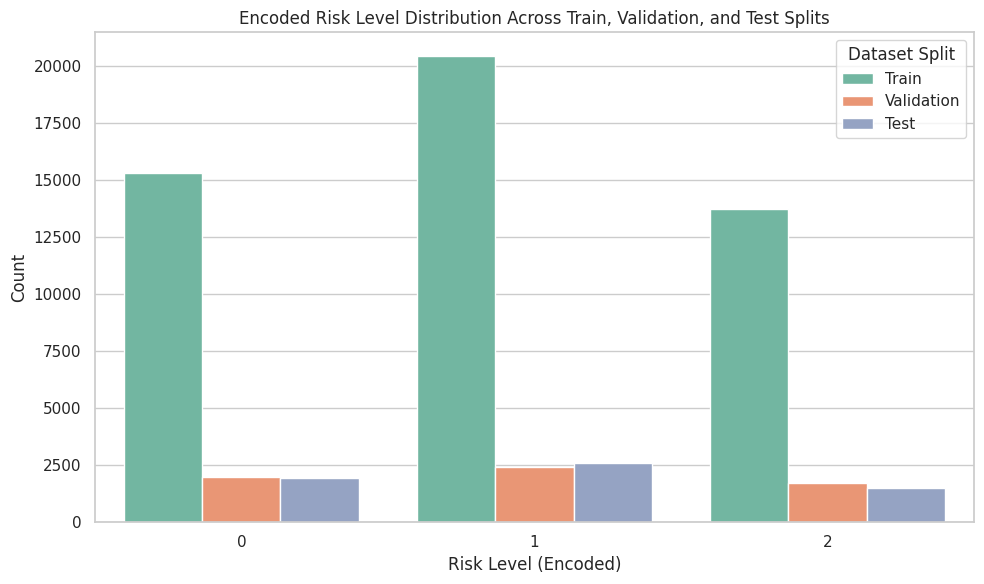

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrames for each split
train_dist = pd.DataFrame({'Split': 'Train', 'Risk Level (Encoded)': y_train})
val_dist = pd.DataFrame({'Split': 'Validation', 'Risk Level (Encoded)': y_val})
test_dist = pd.DataFrame({'Split': 'Test', 'Risk Level (Encoded)': y_test})

# Combine
dist_df = pd.concat([train_dist, val_dist, test_dist], axis=0)

plt.figure(figsize=(10,6))
sns.countplot(data=dist_df, x='Risk Level (Encoded)', hue='Split', palette='Set2')
plt.title('Encoded Risk Level Distribution Across Train, Validation, and Test Splits')
plt.xlabel('Risk Level (Encoded)')
plt.ylabel('Count')
plt.legend(title='Dataset Split')
plt.tight_layout()
plt.show()



##Train a Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# ---------------- BASELINE MODEL ----------------
dt_base = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"
)

# Fit the model on encoded features
dt_base.fit(X_train_enc, y_train)

# Predictions using encoded features only
y_train_pred = dt_base.predict(X_train_enc)
y_val_pred = dt_base.predict(X_val_enc)

# Reports
print("=== BASELINE: TRAIN REPORT ===")
print(classification_report(y_train, y_train_pred))

print("=== BASELINE: VALIDATION REPORT ===")
print(classification_report(y_val, y_val_pred))

print("Baseline Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Feature importance
baseline_importance = pd.DataFrame({
    "Feature": X_train_enc.columns,   # use encoded columns
    "Importance": dt_base.feature_importances_
}).sort_values("Importance", ascending=False)

print("\n=== Baseline Feature Importance ===")
print(baseline_importance)


=== BASELINE: TRAIN REPORT ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15325
           1       1.00      1.00      1.00     20470
           2       1.00      1.00      1.00     13730

    accuracy                           1.00     49525
   macro avg       1.00      1.00      1.00     49525
weighted avg       1.00      1.00      1.00     49525

=== BASELINE: VALIDATION REPORT ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1989
           1       0.94      0.96      0.95      2434
           2       0.94      0.94      0.94      1731

    accuracy                           0.94      6154
   macro avg       0.94      0.94      0.94      6154
weighted avg       0.94      0.94      0.94      6154

Baseline Validation Accuracy: 0.9413389665258368

=== Baseline Feature Importance ===
                  Feature  Importance
1      hold_duration_days    0.438512
0        

###Prune The Decision Tree
Decision Trees tend to overfit. Cost-Complexity Pruning finds the optimal trade-off between tree size and accuracy.

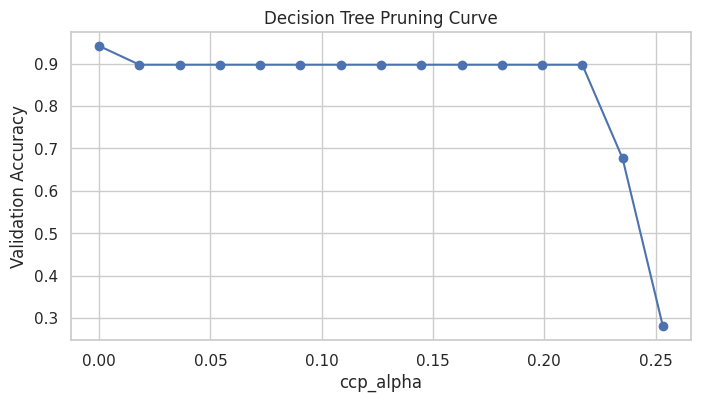

Best ccp_alpha: 0.0
=== Pruned Decision Tree: TRAIN ===
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     15325
    Low Risk       1.00      1.00      1.00     20470
 Medium Risk       1.00      1.00      1.00     13730

    accuracy                           1.00     49525
   macro avg       1.00      1.00      1.00     49525
weighted avg       1.00      1.00      1.00     49525

=== Pruned Decision Tree: VALIDATION ===
              precision    recall  f1-score   support

   High Risk       0.94      0.92      0.93      1989
    Low Risk       0.94      0.96      0.95      2434
 Medium Risk       0.94      0.94      0.94      1731

    accuracy                           0.94      6154
   macro avg       0.94      0.94      0.94      6154
weighted avg       0.94      0.94      0.94      6154

Validation Accuracy: 0.9413389665258368

Feature Importance:
                   Feature  Importance
1      hold_duration_days    0.438512
0  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---------------- PRUNING ----------------
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train_enc, y_train)

# Cost-complexity pruning path
path = dt.cost_complexity_pruning_path(X_train_enc, y_train)
ccp_alphas = np.clip(path.ccp_alphas, 0, None)
ccp_alphas = np.linspace(ccp_alphas.min(), ccp_alphas.max(), 15)  # fewer points for speed

acc_scores = []
for alpha in ccp_alphas:
    dt_alpha = DecisionTreeClassifier(random_state=42, class_weight='balanced', ccp_alpha=alpha)
    dt_alpha.fit(X_train_enc, y_train)
    y_val_pred = dt_alpha.predict(X_val_enc)
    acc_scores.append(accuracy_score(y_val, y_val_pred))

# Plot pruning curve
plt.figure(figsize=(8,4))
plt.plot(ccp_alphas, acc_scores, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Validation Accuracy")
plt.title("Decision Tree Pruning Curve")
plt.show()

# Best alpha
best_alpha = ccp_alphas[np.argmax(acc_scores)]
print("Best ccp_alpha:", best_alpha)

# Train pruned tree
dt_pruned = DecisionTreeClassifier(random_state=42, class_weight='balanced', ccp_alpha=best_alpha)
dt_pruned.fit(X_train_enc, y_train)

# ---------------- REPORT ----------------
y_train_pred = dt_pruned.predict(X_train_enc)
y_val_pred = dt_pruned.predict(X_val_enc)

print("=== Pruned Decision Tree: TRAIN ===")
print(classification_report(y_train, y_train_pred))
print("=== Pruned Decision Tree: VALIDATION ===")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Feature importance
feat_imp = pd.DataFrame({
    'Feature': X_train_enc.columns,
    'Importance': dt_pruned.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance:\n", feat_imp)


##Random Forest model - Model 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Baseline RF
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_base.fit(X_train_enc, y_train)

# Reports
y_train_pred = rf_base.predict(X_train_enc)
y_val_pred = rf_base.predict(X_val_enc)

print("=== Random Forest: TRAIN ===")
print(classification_report(y_train, y_train_pred))
print("=== Random Forest: VALIDATION ===")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Feature importance
feat_imp_rf = pd.DataFrame({
    'Feature': X_train_enc.columns,
    'Importance': rf_base.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance RF:\n", feat_imp_rf)

# ---------------- TUNING ----------------
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

rs_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rs_rf.fit(X_train_enc, y_train)
best_rf = rs_rf.best_estimator_
print("Best RF Params:", rs_rf.best_params_)

# Reports for tuned RF
y_train_pred = best_rf.predict(X_train_enc)
y_val_pred = best_rf.predict(X_val_enc)

print("=== Tuned Random Forest: TRAIN ===")
print(classification_report(y_train, y_train_pred))
print("=== Tuned Random Forest: VALIDATION ===")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


=== Random Forest: TRAIN ===
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     15325
    Low Risk       1.00      1.00      1.00     20470
 Medium Risk       1.00      1.00      1.00     13730

    accuracy                           1.00     49525
   macro avg       1.00      1.00      1.00     49525
weighted avg       1.00      1.00      1.00     49525

=== Random Forest: VALIDATION ===
              precision    recall  f1-score   support

   High Risk       0.96      0.94      0.95      1989
    Low Risk       0.96      0.97      0.97      2434
 Medium Risk       0.96      0.96      0.96      1731

    accuracy                           0.96      6154
   macro avg       0.96      0.96      0.96      6154
weighted avg       0.96      0.96      0.96      6154

Validation Accuracy: 0.9603509912252194

Feature Importance RF:
                   Feature  Importance
1      hold_duration_days    0.459829
0                     age    0.248

##Model_3: XGBoost

One-hot encoding, XGBoost training and model evaluation

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[18:38:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




=== XGBoost: TRAIN ===
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15325
           1       0.97      0.97      0.97     20470
           2       0.97      0.98      0.97     13730

    accuracy                           0.96     49525
   macro avg       0.96      0.96      0.96     49525
weighted avg       0.96      0.96      0.96     49525

=== XGBoost: VALIDATION ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1989
           1       0.96      0.96      0.96      2434
           2       0.95      0.97      0.96      1731

    accuracy                           0.95      6154
   macro avg       0.95      0.95      0.95      6154
weighted avg       0.95      0.95      0.95      6154

Validation Accuracy: 0.9548261293467664


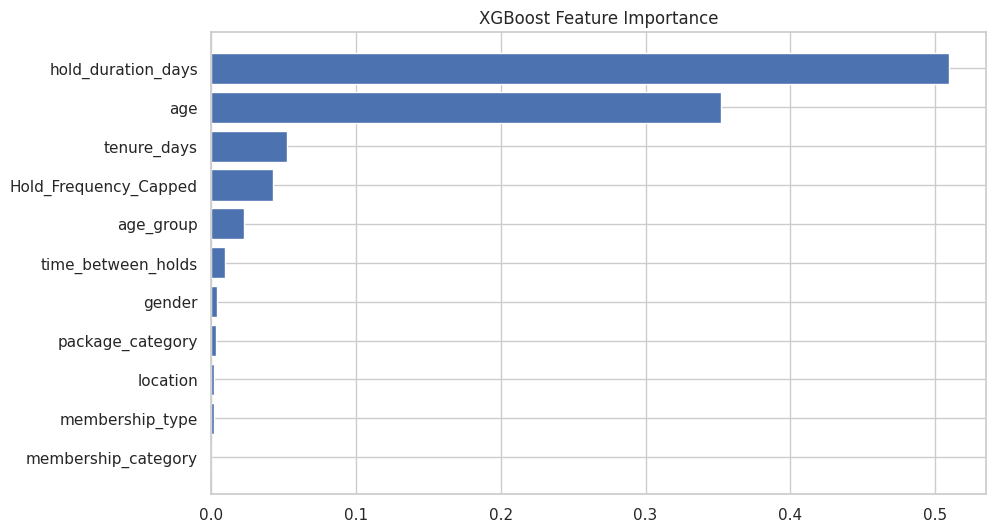

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target for XGBoost
le_target = LabelEncoder()
y_train_enc = le_target.fit_transform(y_train)
y_val_enc = le_target.transform(y_val)

# Train XGBoost
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import pandas as pd

xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1,
    learning_rate=0.05,
    max_depth=5,
    n_estimators=100
)

xgb_model.fit(X_train_enc, y_train_enc)
y_train_pred = xgb_model.predict(X_train_enc)
y_val_pred = xgb_model.predict(X_val_enc)

# Classification report
from sklearn.metrics import classification_report, accuracy_score
print("=== XGBoost: TRAIN ===")
print(classification_report(y_train_enc, y_train_pred))
print("=== XGBoost: VALIDATION ===")
print(classification_report(y_val_enc, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val_enc, y_val_pred))

# Visual feature importance
importances = xgb_model.feature_importances_
feat_imp_xgb = pd.DataFrame({
    'Feature': X_train_enc.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_xgb['Feature'], feat_imp_xgb['Importance'])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importance")
plt.show()


##XGBoost Model with One-Hot Encoding
XGBoost needs numeric data. If we use label encoding on categories, it might think the values have order (0 < 1 < 2), which isn’t true.

To fix this, we one-hot encoded the features so each category has its own column. This way, the model treats them independently.

The target variable (risk_level) still needs to be numeric, so we label-encoded it (Low=0, Medium=1, High=2).

Training and validation sets were processed separately to avoid data leakage.

We trained XGBoost, checked its performance, and looked at feature importance to see which variables mattered most.

Takeaway: One-hot encoding for features + numeric target ensures XGBoost treats categorical data correctly without assuming any order.

##Feature Importance for All Three Models

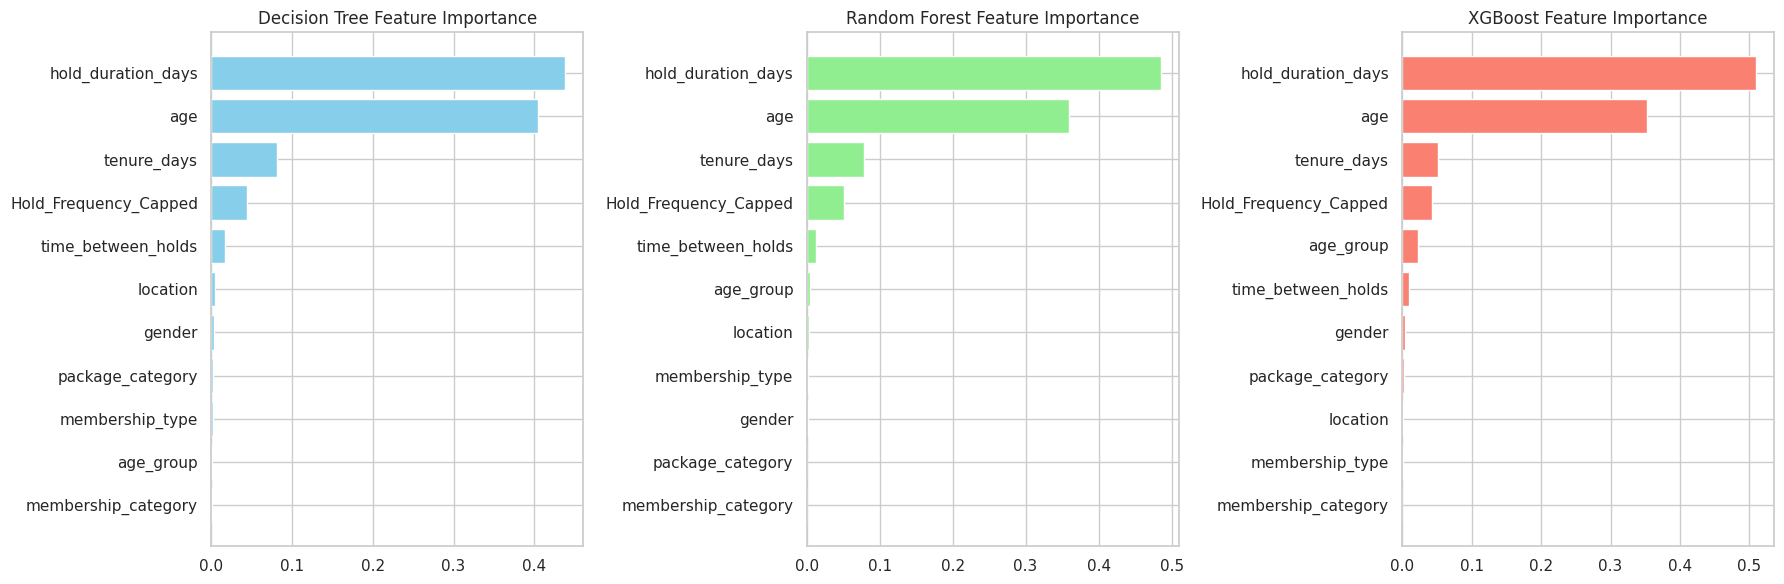

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming models are trained and features encoded:
# dt_pruned, rf_tuned, xgb_model
# Features: X_train_enc.columns

# ----------------- Decision Tree Feature Importance -----------------
dt_feat = pd.DataFrame({
    "Feature": X_train_enc.columns,
    "Importance": dt_pruned.feature_importances_
}).sort_values("Importance", ascending=False)

# ----------------- Random Forest Feature Importance -----------------
rf_tuned = rs_rf.best_estimator_  # assign this so your plotting code works
rf_feat = pd.DataFrame({
    "Feature": X_train_enc.columns,
    "Importance": rf_tuned.feature_importances_
}).sort_values("Importance", ascending=False)

# ----------------- XGBoost Feature Importance -----------------
xgb_feat = pd.DataFrame({
    "Feature": X_train_enc.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values("Importance", ascending=False)

# ----------------- Plot All Three -----------------
fig, axs = plt.subplots(1,3, figsize=(18,6))

axs[0].barh(dt_feat['Feature'], dt_feat['Importance'], color='skyblue')
axs[0].invert_yaxis()
axs[0].set_title("Decision Tree Feature Importance")

axs[1].barh(rf_feat['Feature'], rf_feat['Importance'], color='lightgreen')
axs[1].invert_yaxis()
axs[1].set_title("Random Forest Feature Importance")

axs[2].barh(xgb_feat['Feature'], xgb_feat['Importance'], color='salmon')
axs[2].invert_yaxis()
axs[2].set_title("XGBoost Feature Importance")

plt.tight_layout()
plt.show()


##Model Predictions & Comparison Table

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

models = {
    "Decision Tree": dt_pruned,
    "Random Forest": rf_tuned,
    "XGBoost": xgb_model
}

results = []

for name, model in models.items():
    # Train predictions
    if name == "XGBoost":
        y_train_pred = model.predict(X_train_enc)
        y_val_pred = model.predict(X_val_enc)
    else:
        y_train_pred = model.predict(X_train_enc)
        y_val_pred = model.predict(X_val_enc)

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train_enc if name=="XGBoost" else y_train, y_train_pred),
        "Validation Accuracy": accuracy_score(y_val_enc if name=="XGBoost" else y_val, y_val_pred),
        "Train F1 (macro)": f1_score(y_train_enc if name=="XGBoost" else y_train, y_train_pred, average='macro'),
        "Validation F1 (macro)": f1_score(y_val_enc if name=="XGBoost" else y_val, y_val_pred, average='macro')
    })

results_df = pd.DataFrame(results)
print(results_df)


           Model  Train Accuracy  Validation Accuracy  Train F1 (macro)  \
0  Decision Tree        1.000000             0.941339          1.000000   
1  Random Forest        0.987138             0.958564          0.987038   
2        XGBoost        0.964139             0.954826          0.963865   

   Validation F1 (macro)  
0               0.940754  
1               0.958303  
2               0.954676  


##ROC Curves for Random Forest & XGBoost

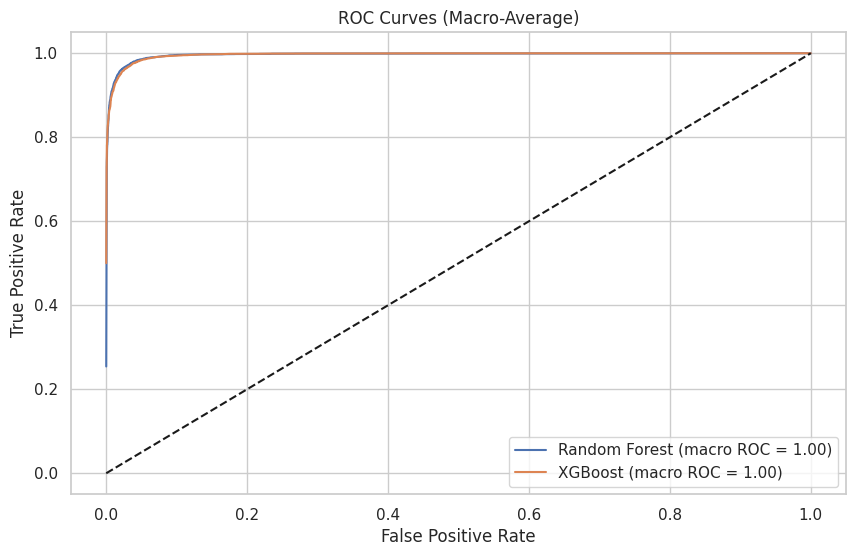

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize target for ROC
y_val_bin = label_binarize(y_val_enc, classes=[0,1,2])  # only for XGBoost / numeric labels
y_train_bin = label_binarize(y_train_enc, classes=[0,1,2])

models_roc = {
    "Random Forest": rf_tuned,
    "XGBoost": xgb_model
}

plt.figure(figsize=(10,6))

for name, model in models_roc.items():
    y_score = model.predict_proba(X_val_enc) if name=="XGBoost" else model.predict_proba(X_val_enc)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(y_val_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Macro-average
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y_val_bin.shape[1])]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(y_val_bin.shape[1]):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= y_val_bin.shape[1]
    roc_auc_macro = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, label=f'{name} (macro ROC = {roc_auc_macro:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Macro-Average)')
plt.legend(loc='lower right')
plt.show()


##Model 4: Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# ============================
# Train Gaussian Naive Bayes
# ============================
nb_model = GaussianNB()
nb_model.fit(X_train_rf, y_train_encoded)

# ============================
# Predict
# ============================
y_val_pred_nb = nb_model.predict(X_val_rf)

# ============================
# Evaluate
# ============================
print("Naive Bayes Validation Accuracy:", accuracy_score(y_val_encoded, y_val_pred_nb))
print("\nClassification Report:\n")
print(classification_report(y_val_encoded, y_val_pred_nb, target_names=target_le.classes_))


Naive Bayes Validation Accuracy: 0.943126421839454

Classification Report:

              precision    recall  f1-score   support

   High Risk       0.95      0.97      0.96      1989
    Low Risk       0.96      0.92      0.94      2434
 Medium Risk       0.91      0.94      0.92      1731

    accuracy                           0.94      6154
   macro avg       0.94      0.94      0.94      6154
weighted avg       0.94      0.94      0.94      6154



##Model 5: CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


In [ ]:
#CatBoost Training Cell
# ============================
# CREATE COPIES FOR CATBOOST
# ============================

X_train_cb = X_train.copy()
X_val_cb   = X_val.copy()
X_test_cb  = X_test.copy()

y_train_cb = y_train_encoded.copy()
y_val_cb   = y_val_encoded.copy()
y_test_cb  = y_test_encoded.copy()


In [ ]:
from catboost import CatBoostClassifier

# Identify categorical columns
categorical_features = [
    'location',
    'package_category',
    'membership_type',
    'membership_category',
    'age_group',
    'gender'
]

# Convert categorical columns to string (CatBoost prefers this)
for col in categorical_features:
    X_train_cb[col] = X_train_cb[col].astype(str)
    X_val_cb[col]   = X_val_cb[col].astype(str)
    X_test_cb[col]  = X_test_cb[col].astype(str)

# Map column names → indices
cat_feature_indices = [X_train_cb.columns.get_loc(col) for col in categorical_features]

# Train CatBoost directly on raw features
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=10,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    class_weights=[1.5, 2, 1],
    random_state=42,
    verbose=100
)

cat_model.fit(
    X_train_cb, y_train_encoded,
    eval_set=(X_val_cb, y_val_encoded),
    cat_features=cat_feature_indices
)


0:	learn: 0.9291440	test: 0.9248630	best: 0.9248630 (0)	total: 2s	remaining: 16m 35s
100:	learn: 0.9632167	test: 0.9581529	best: 0.9584138 (96)	total: 1m 16s	remaining: 5m 1s
200:	learn: 0.9680005	test: 0.9594573	best: 0.9598226 (184)	total: 2m 10s	remaining: 3m 14s
300:	learn: 0.9715417	test: 0.9607096	best: 0.9611271 (243)	total: 3m 8s	remaining: 2m 4s
400:	learn: 0.9741429	test: 0.9615967	best: 0.9619619 (366)	total: 4m 5s	remaining: 1m
499:	learn: 0.9768277	test: 0.9611271	best: 0.9619619 (366)	total: 5m 7s	remaining: 0us

bestTest = 0.9619619097
bestIteration = 366

Shrink model to first 367 iterations.



## CatBoost Classification report, Accuracy score and Confusionmatrix


=== CATBOOST VALIDATION REPORT ===
              precision    recall  f1-score   support

   High Risk       0.96      0.94      0.95      1989
    Low Risk       0.95      0.98      0.96      2434
 Medium Risk       0.98      0.95      0.96      1731

    accuracy                           0.96      6154
   macro avg       0.96      0.96      0.96      6154
weighted avg       0.96      0.96      0.96      6154

=== CATBOOST TEST SET ACCURACY ===
Accuracy: 0.9572352063649925


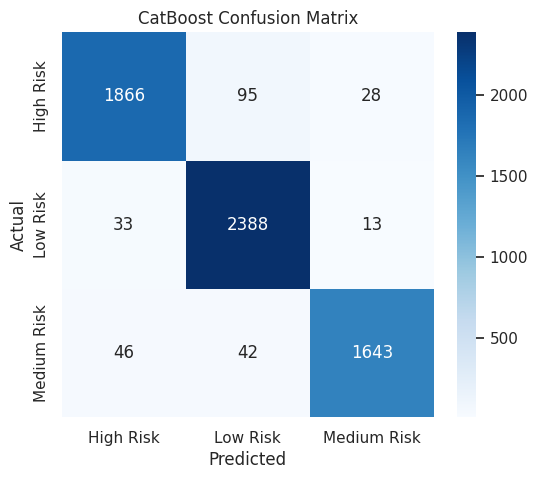

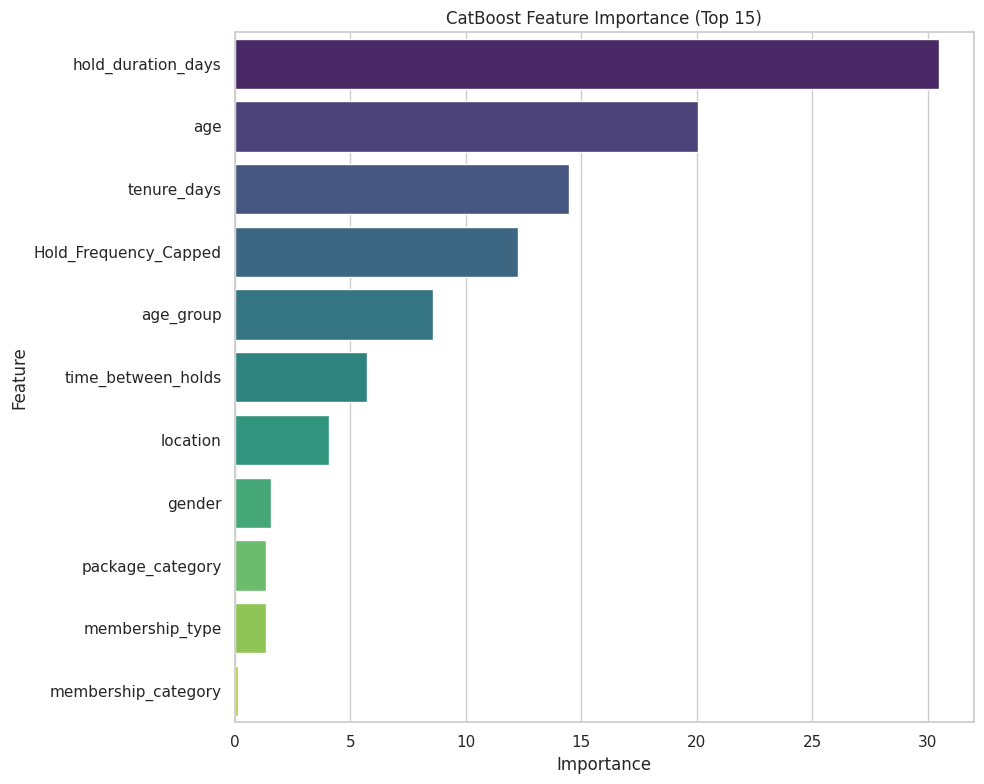

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ============================
# CATBOOST PREDICTIONS
# ============================

y_val_pred_cb = cat_model.predict(X_val_cb)
y_test_pred_cb = cat_model.predict(X_test_cb)

print("=== CATBOOST VALIDATION REPORT ===")
print(classification_report(y_val_cb, y_val_pred_cb, target_names=target_le.classes_))

print("=== CATBOOST TEST SET ACCURACY ===")
print("Accuracy:", accuracy_score(y_test_cb, y_test_pred_cb))

# ============================
# CONFUSION MATRIX
# ============================

cm = confusion_matrix(y_val_cb, y_val_pred_cb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_le.classes_,
            yticklabels=target_le.classes_)
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ============================
# FEATURE IMPORTANCE
# ============================

importances = pd.DataFrame({
    "Feature": X_train_cb.columns,
    "Importance": cat_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=importances.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("CatBoost Feature Importance (Top 15)")
plt.tight_layout()
plt.show()
